In [1]:
import librosa             # The librosa library
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
import scipy
import copy
import os

In [21]:
freq = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
f = np.matrix(np.zeros((13,13)))
for i in range(0, 13):
    f[i, i] = freq[i]

print(f)

    



[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.]]


In [23]:
decay = np.ones((13, 1000))

alll = f*decay/13

1


In [ ]:
ADSR_dict = {"G3": 180, "A3": 200, "B3": 100, "C4": 240, "D4": 270, "E4": 310, "F4": 330, "G4": 370}

def ADSR(y, filename, dd):
    y1 = copy.deepcopy(y)
    for i in range(len(y1)):
        if y1[i] < 0:
            y1[i] = 0
            
    neg_y = np.negative(y)
    y2 = copy.deepcopy(neg_y)
    
    for i in range(len(y2)):
        if y2[i] > 0:
            y2[i] = 0
    peaks1, _ = scipy.signal.find_peaks(y1, distance = dd)
    peaks2, _ = scipy.signal.find_peaks(y2, distance = dd)
    peak = np.hstack((peaks1, peaks2))
    peak = np.sort(peak)
    return peak



In [867]:
# y, sr = librosa.load('./G3_52.wav', sr = 44100)
y, sr = librosa.load('/Users/yutianqin/Downloads/SchoolWork/DURF/I/I_D6_06.wav', sr = 44100)
print('length of input is', len(y), 'sample rate = ', sr)

length of input is 110250 sample rate =  44100


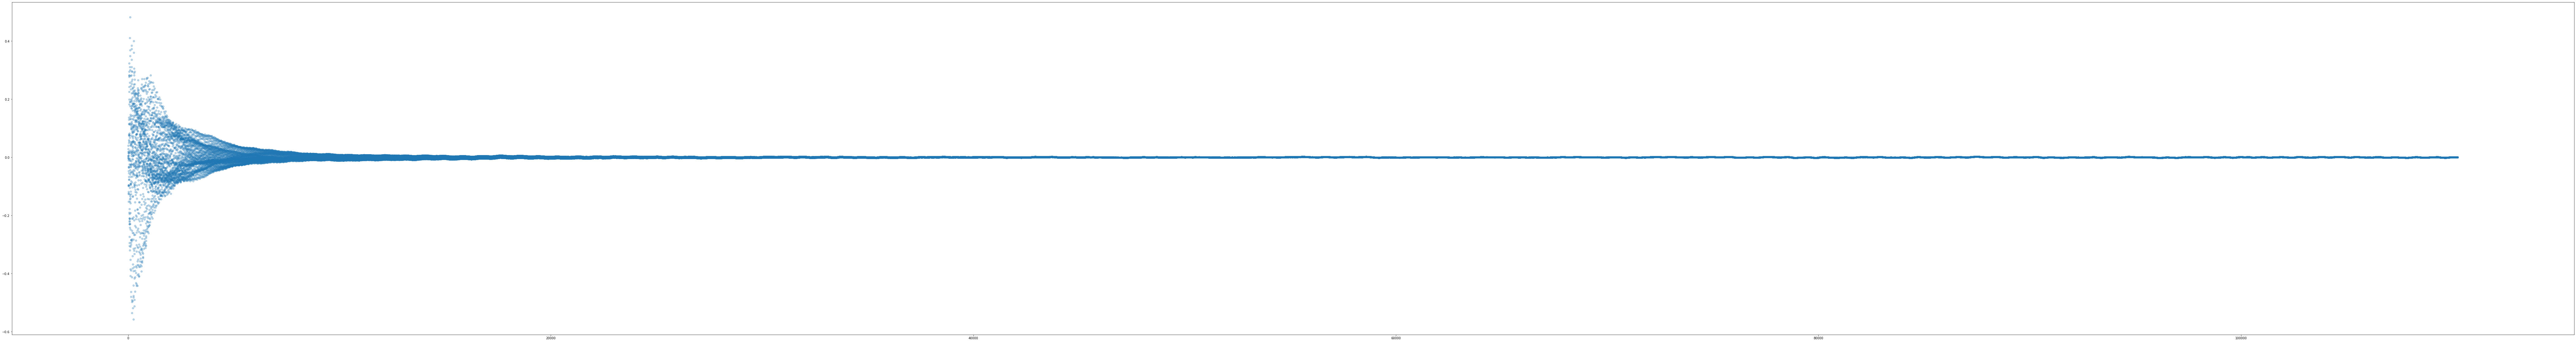

In [868]:
plt.figure(figsize=(150, 20))
# plt.scatter(y, alpha = 0.3)
x = np.linspace(0, len(y), len(y))
plt.scatter(x, y, alpha = 0.3)

    
plt.show()

In [869]:
# k = 0
# for i in range(600, 700):
#     if y[i] > y[i-1] and y[i] > y[i+1] and y[i] > .2:
#         k += 1
#         print (i, y[i],'    ', k )

In [870]:

# print(5864 - 5639)
# print(5639 - 5413)
# print(5413 - 5187)
# print(5187 - 4962)


plt.figure(figsize=(30, 10))
# plt.scatter(y, alpha = 0.3)
x = np.linspace(0, 10000, 10000)
plt.scatter(x, y[:10000], alpha = 0.5)


freq = 0
for i in range(0, 24):
    freq =  i * 200
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    #print(freq, i)
    
    
plt.show()

#### Divide into positive and negative part. 

POSITIVE🔽

In [871]:
y1 = copy.deepcopy(y)
for i in range(len(y1)):
    if y1[i] < 0:
        y1[i] = 0


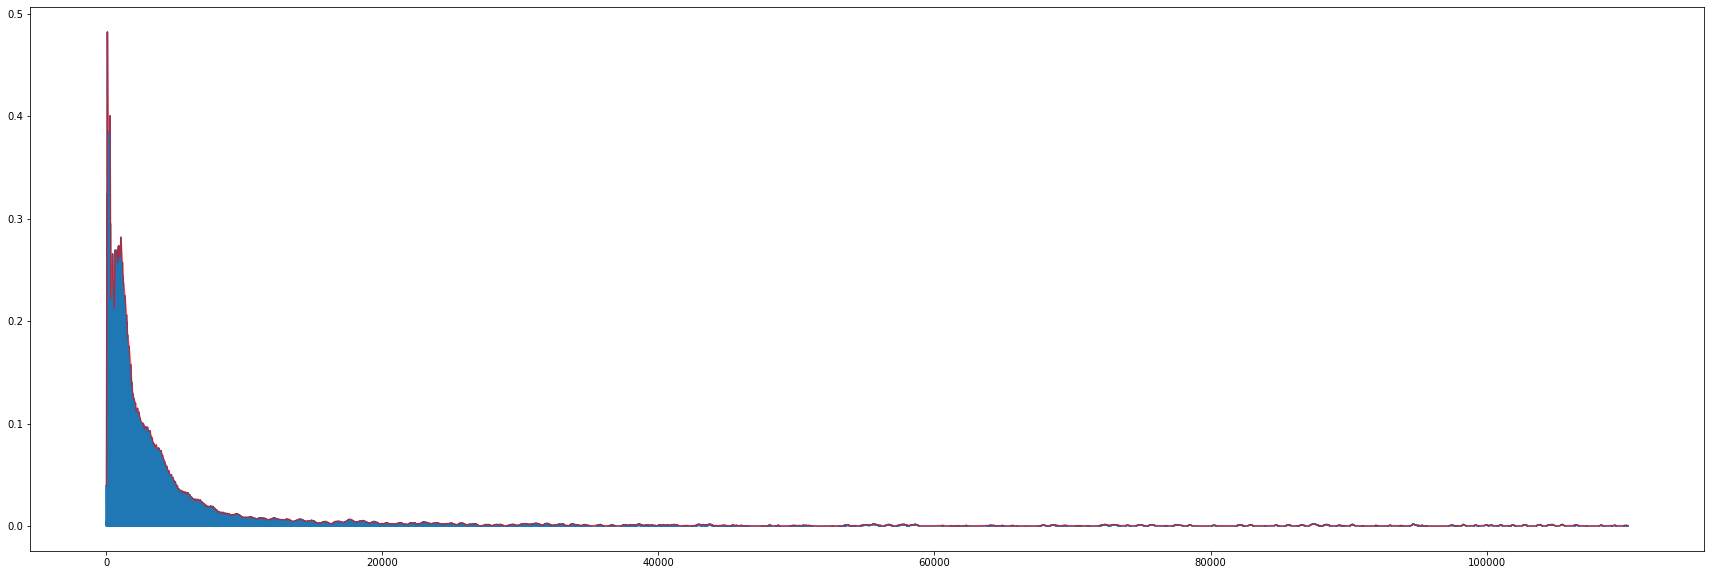

In [881]:
yy = y1
peaks1, _ = scipy.signal.find_peaks(yy, distance = 60)
# np.diff(peaks)

plt.figure(figsize=(30, 10))
plt.plot(yy)
# plt.scatter(x, y, alpha = 0.3)
# plt.plot(peaks, yy[peaks], "x")
plt.plot(peaks1, yy[peaks1], c = 'r', alpha = 0.6)
plt.show()

In [882]:
# print(peaks1)

# print(yy[peaks])

In [883]:

# peaks2, _ = scipy.signal.find_peaks(yy[peaks])

# plt.figure(figsize=(30, 10))
# plt.plot(yy[peaks])

# plt.plot( peaks2, yy[peaks2], "x")
# plt.show()

In [884]:
# print(peaks2)

In [885]:
# yy2 = y[110000:130000]
# peaks, _ = scipy.signal.find_peaks(yy2, distance = 220)
# np.diff(peaks)

# plt.figure(figsize=(30, 10))
# plt.plot(yy2)
# plt.plot(peaks, yy2[peaks], "x")
# plt.show()

In [886]:
# plt.figure(figsize=(30, 10))
# # plt.scatter(y, alpha = 0.3)
# x = np.linspace(0, 10000, 10000)
# plt.scatter(x, y[:10000], alpha = 0.25)
# plt.show()

In [887]:
neg_y = np.negative(y)


In [888]:
# plt.figure(figsize=(30, 10))
# plt.scatter(x, y, alpha = 0.3)
# # x = np.linspace(0, 200, 200)
# # plt.scatter(x, neg_y[:200], alpha = 0.25)
# plt.show()

In [889]:
y2 = copy.deepcopy(neg_y)
for i in range(len(y2)):
    if y2[i] < 0:
        y2[i] = 0


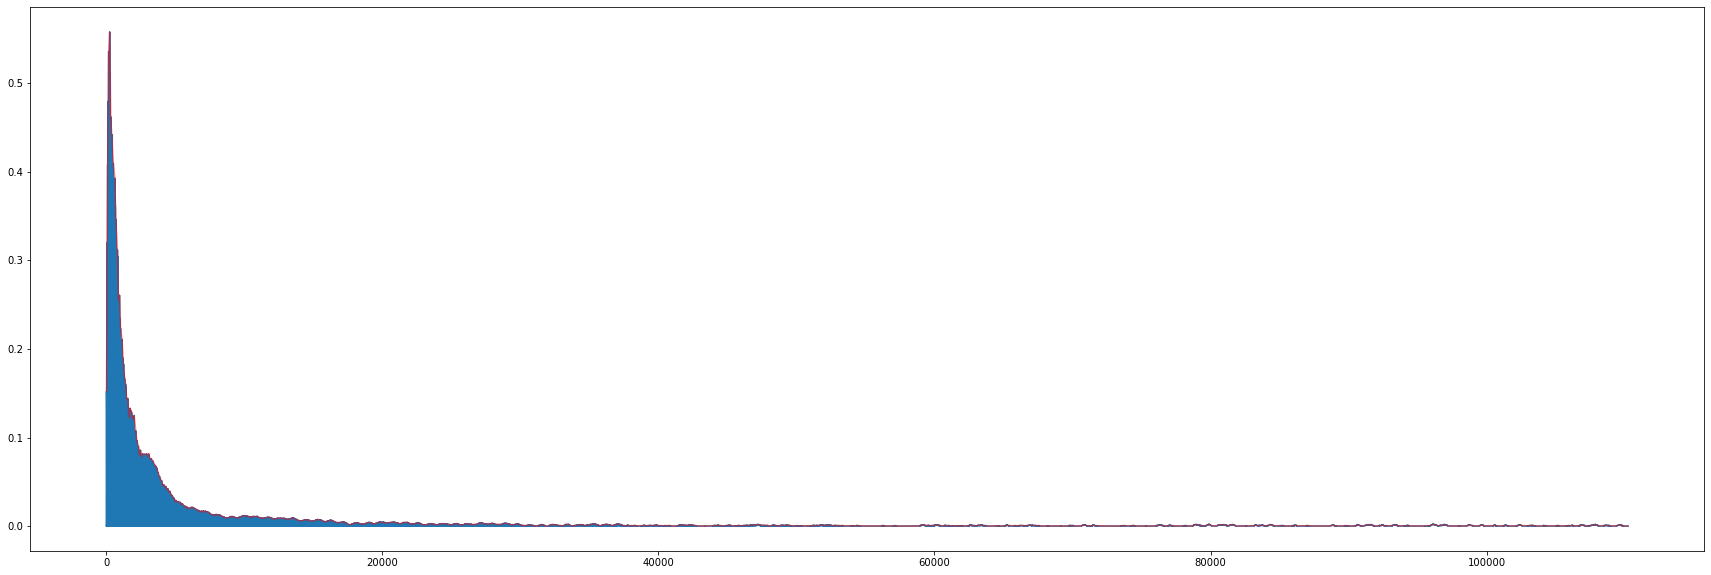

In [890]:
yyy = y2
peaks2, _ = scipy.signal.find_peaks(yyy, distance = 60)
# np.diff(peaks)

plt.figure(figsize=(30, 10))
plt.plot(yyy)
plt.plot(peaks2, yyy[peaks2], c = 'r', alpha = 0.5)
plt.show()

In [891]:
# peaks2
peaks11 = np.insert(peaks1, 0, 0)
peaks22 = np.insert(peaks2, 0, 0)
print(peaks11[0])
print(peaks22[0])

0
0


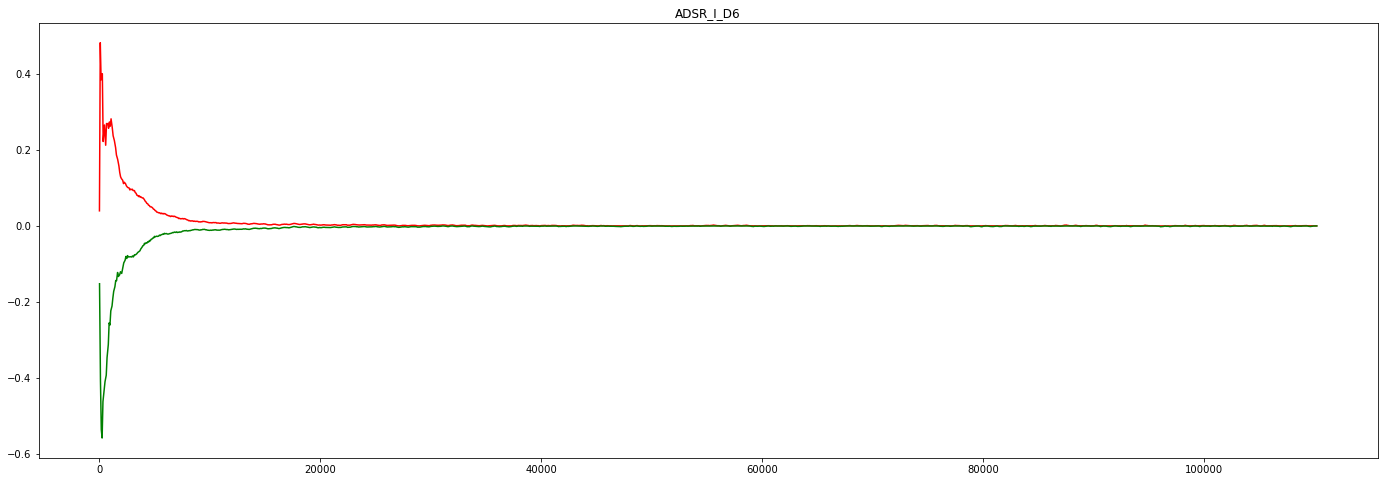

In [892]:
plt.figure(figsize=(24, 8))
# plt.scatter(x, y, alpha = 0.2)
plt.plot(peaks1, y[peaks1], c = 'r')
plt.plot(peaks2, y[peaks2], c = 'g')
plt.title( "ADSR_I_D6")
plt.savefig("./" + "ADSR_I_D6"+ ".png")
plt.show()

In [733]:
k = 20
pos_poly = np.polyfit(peaks1, y[peaks1], k)
pos_curve = 0
neg_curve = 0
for i in range(0, k+1):
    pos_curve += pos_poly[i] * x ** (k-i)
# pos_curve = pos_poly[0] * x ** 8 + pos_poly[1] * x ** 7 + pos_poly[2] * x ** 6 + pos_poly[3] * x ** 5 + 
#               pos_poly[4] * x ** 4 + pos_poly[5] * x ** 3 + pos_poly[6] * x ** 2 + pos_poly[7] * x ** 1 + pos_poly[8] * x ** 0 

neg_poly = np.polyfit(peaks2, y[peaks2], k)
for i in range(0, k+1):
    neg_curve += neg_poly[i] * x ** (k-i)
# neg_curve = neg_poly[0] * x ** 8 + neg_poly[1] * x ** 7 + neg_poly[2] * x ** 6 + neg_poly[3] * x ** 5 + 
#             neg_poly[4] * x ** 4 + neg_poly[5] * x ** 3 + neg_poly[6] * x ** 2 + + neg_poly[7] * x ** 1 + + neg_poly[8] * x ** 0

print(pos_poly, '\n', neg_poly)


[ 5.33346468e-96 -4.84800620e-90  1.81408828e-84 -3.35035824e-79
  2.24944256e-74  2.54410188e-69 -5.54980367e-64  6.96646764e-60
  7.71546660e-54 -9.12497150e-49  1.74502474e-44  5.93159648e-39
 -7.60859048e-34  4.92926821e-29 -2.02231911e-24  5.49545556e-20
 -9.78477779e-16  1.08130792e-11 -6.51328867e-08  1.36049976e-04
  3.32063988e-01] 
 [ 1.17617072e-95 -1.16929251e-89  4.91964791e-84 -1.08440416e-78
  1.11982596e-73  2.59791372e-69 -2.14249496e-63  1.89324437e-58
  1.52048625e-53 -5.55531744e-48  6.97286850e-43 -5.41093575e-38
  2.88863733e-33 -1.09387694e-28  2.93973712e-24 -5.49040814e-20
  6.79587601e-16 -5.04080548e-12  1.65704306e-08  2.86975260e-05
 -4.30539483e-01]


/Users/yutianqin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/yutianqin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


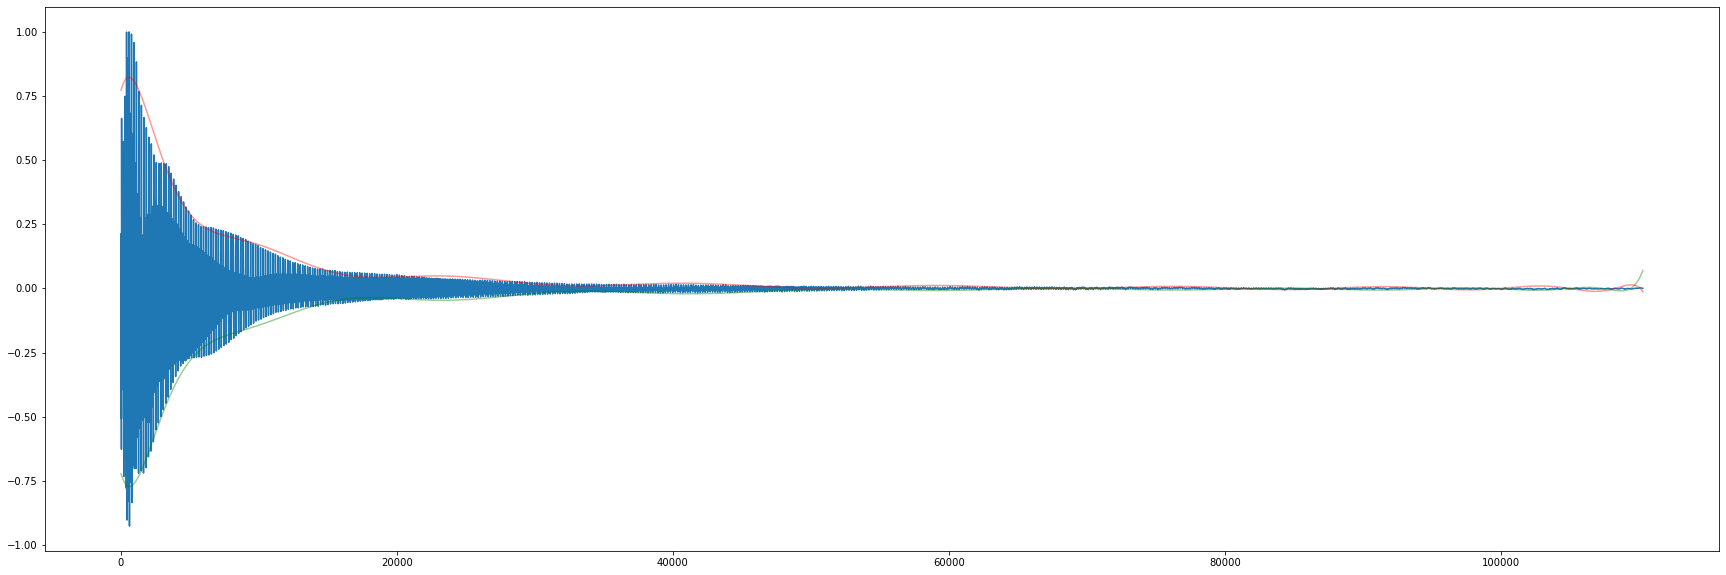

In [114]:
plt.figure(figsize=(30, 10))
x = np.linspace(0, len(y), len(y))
plt.plot(y)
# x = np.linspace(0, 10000, 10000)
# plt.scatter(peaks1, y[peaks1], c = 'b', alpha = 0.6)
# plt.scatter(peaks2, y[peaks2], c = 'b', alpha = 0.6)
plt.plot(x, pos_curve, c = 'r', alpha = 0.4)
plt.plot(x, neg_curve, c = 'g', alpha = 0.4)
plt.show()

length of input is 154350 sample rate =  44100


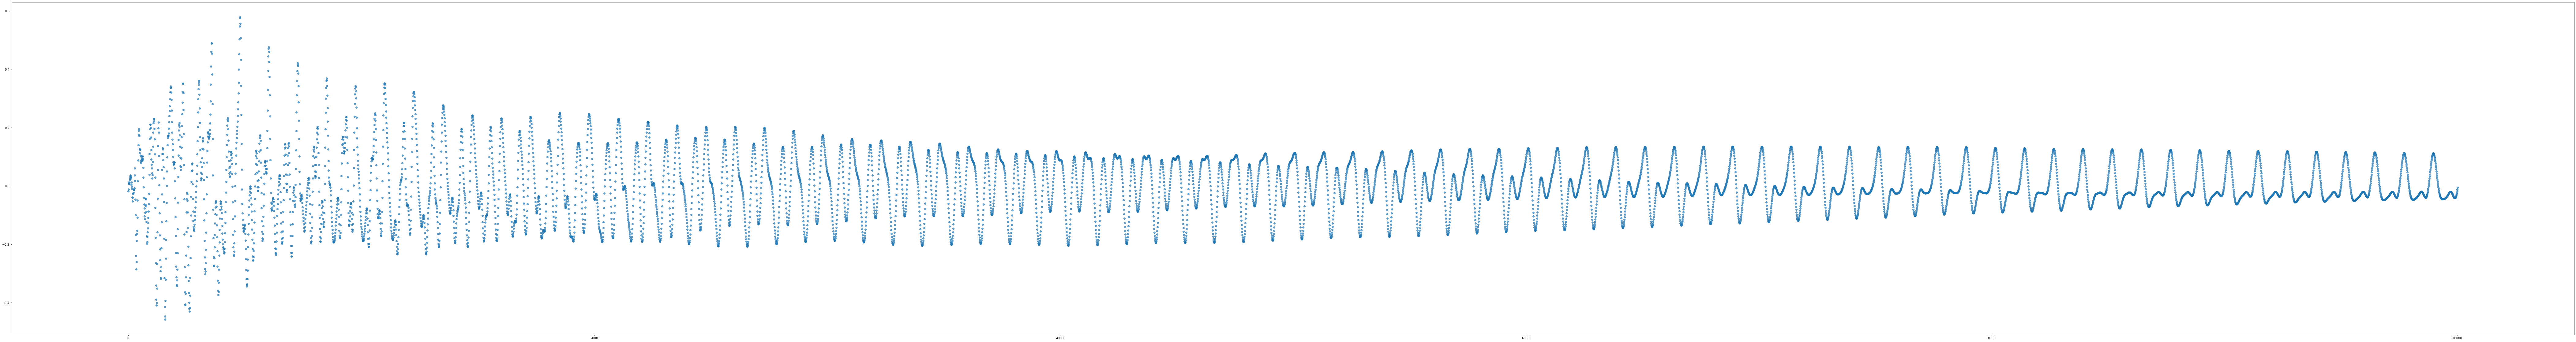

In [86]:
# peaks
y, sr = librosa.load('/Users/yutianqin/Downloads/SchoolWork/DURF/IV/IV_F4_03.wav', sr = 44100)
print('length of input is', len(y), 'sample rate = ', sr)

plt.figure(figsize=(150, 20))
# plt.scatter(y, alpha = 0.3)
# x = np.linspace(0, len(y), len(y))
x = np.linspace(0, 10000, 10000)
plt.scatter(x, y[:10000], alpha = 0.7)

    
plt.show()


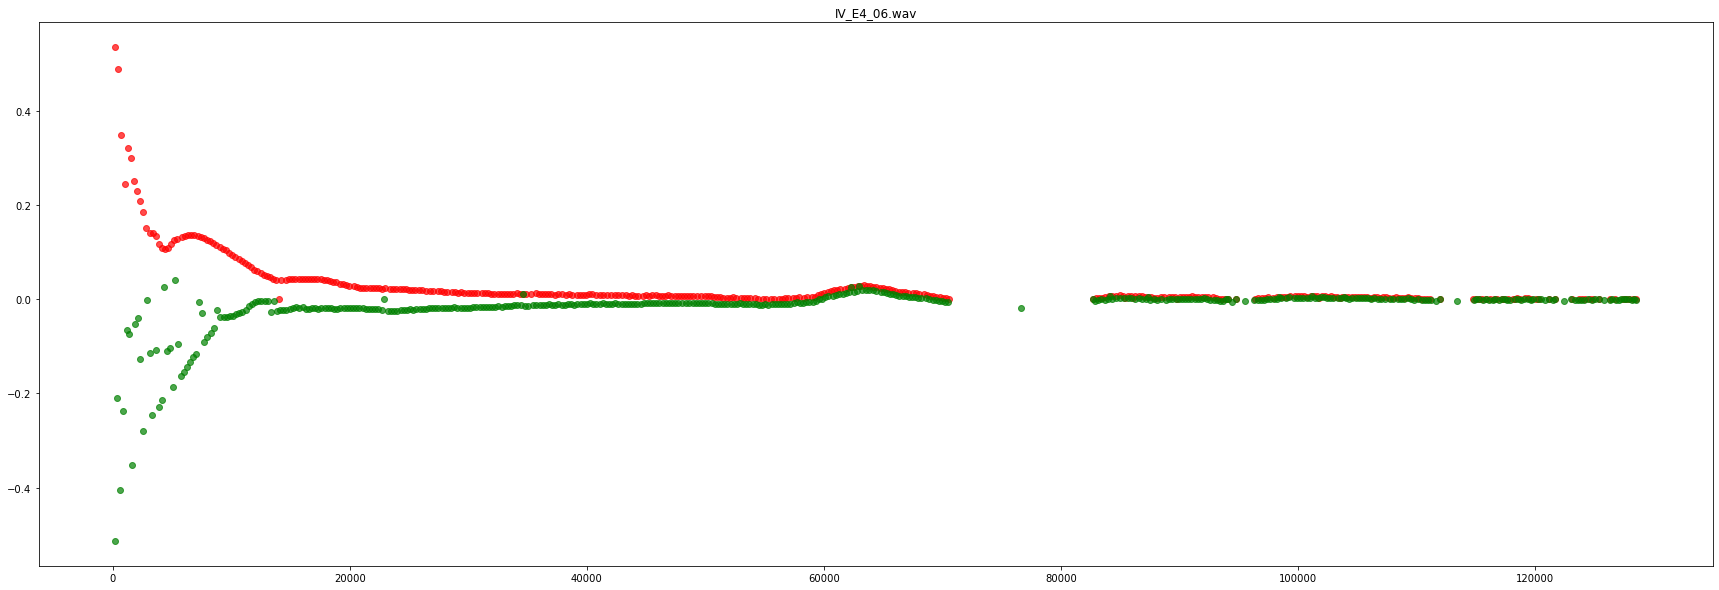

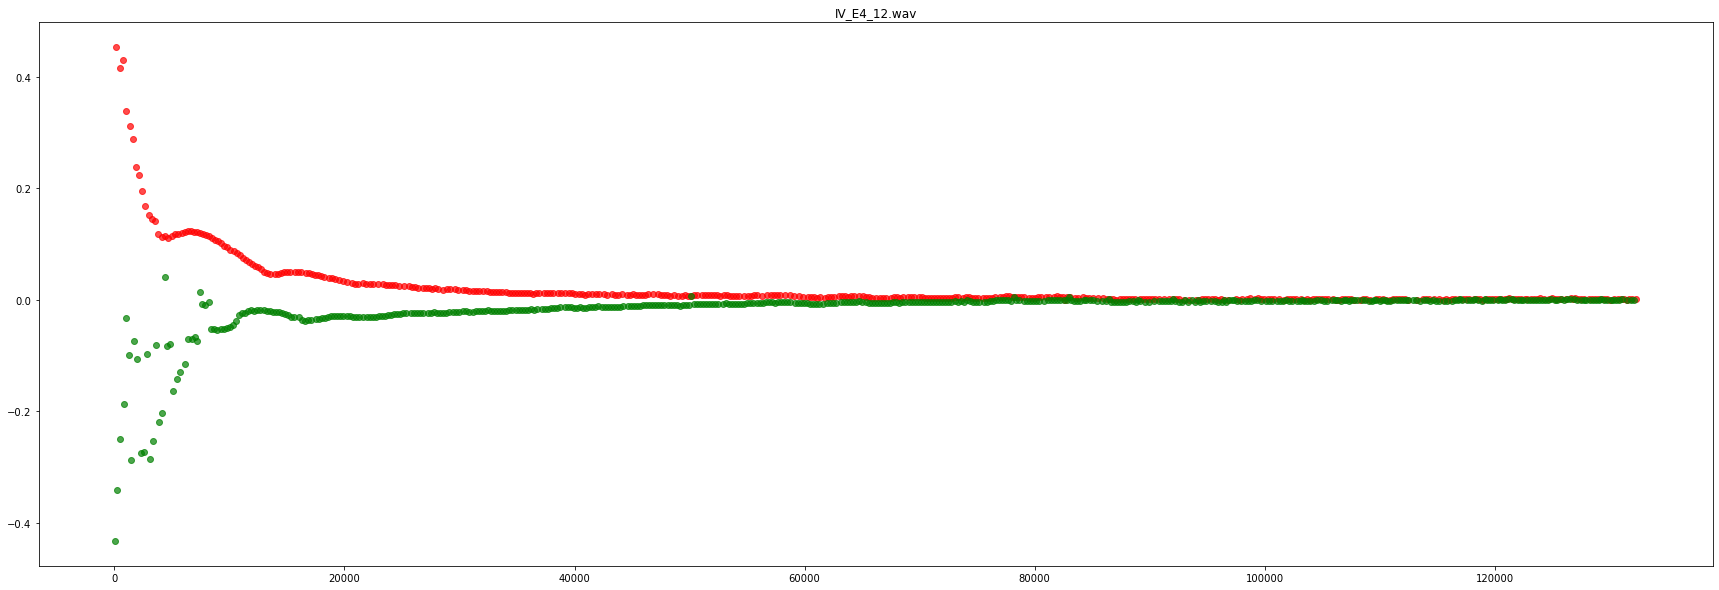

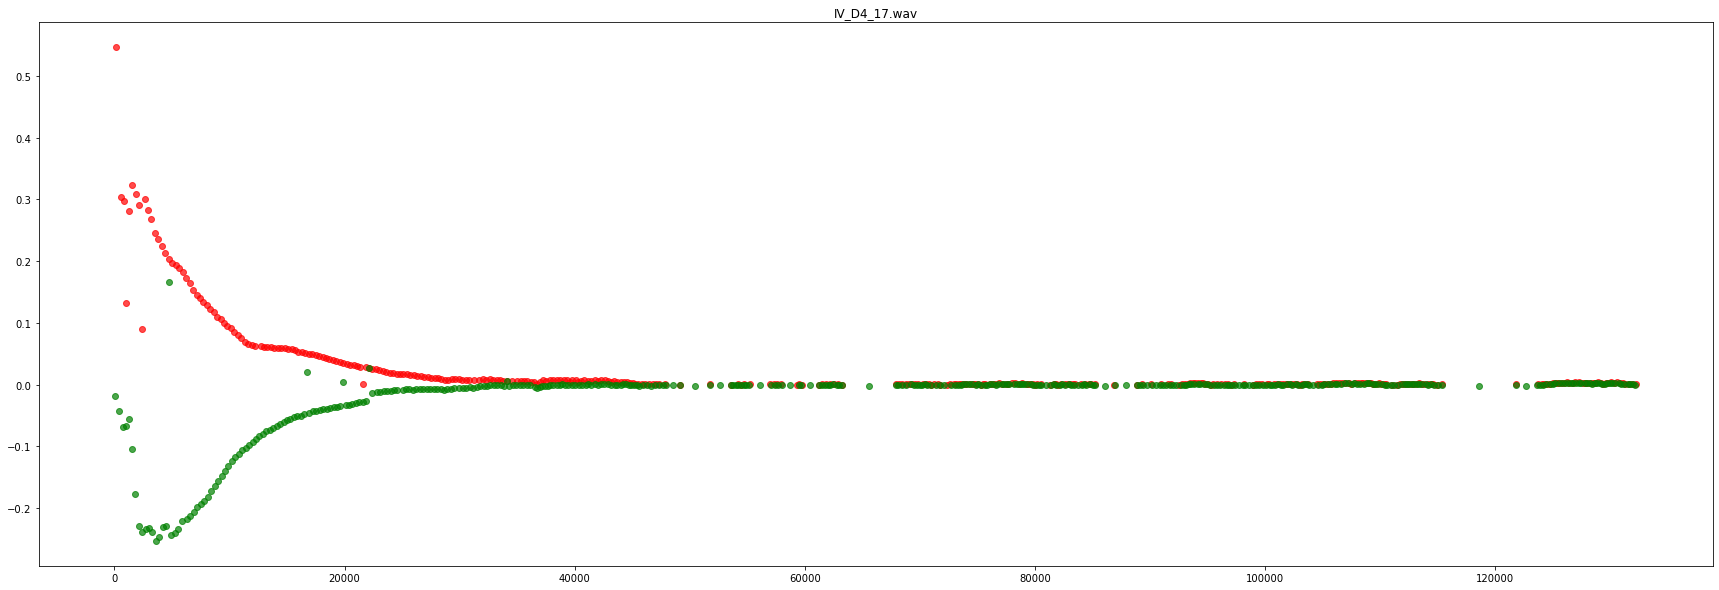

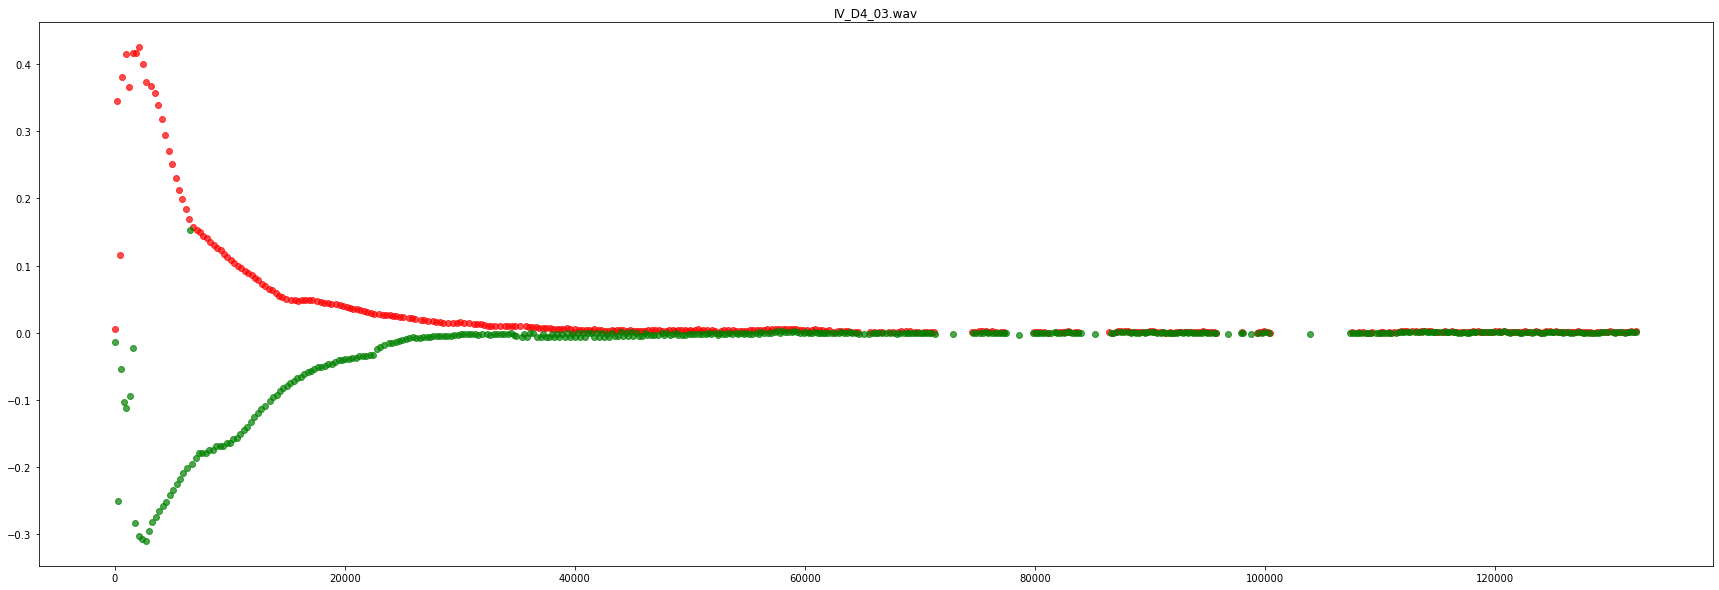

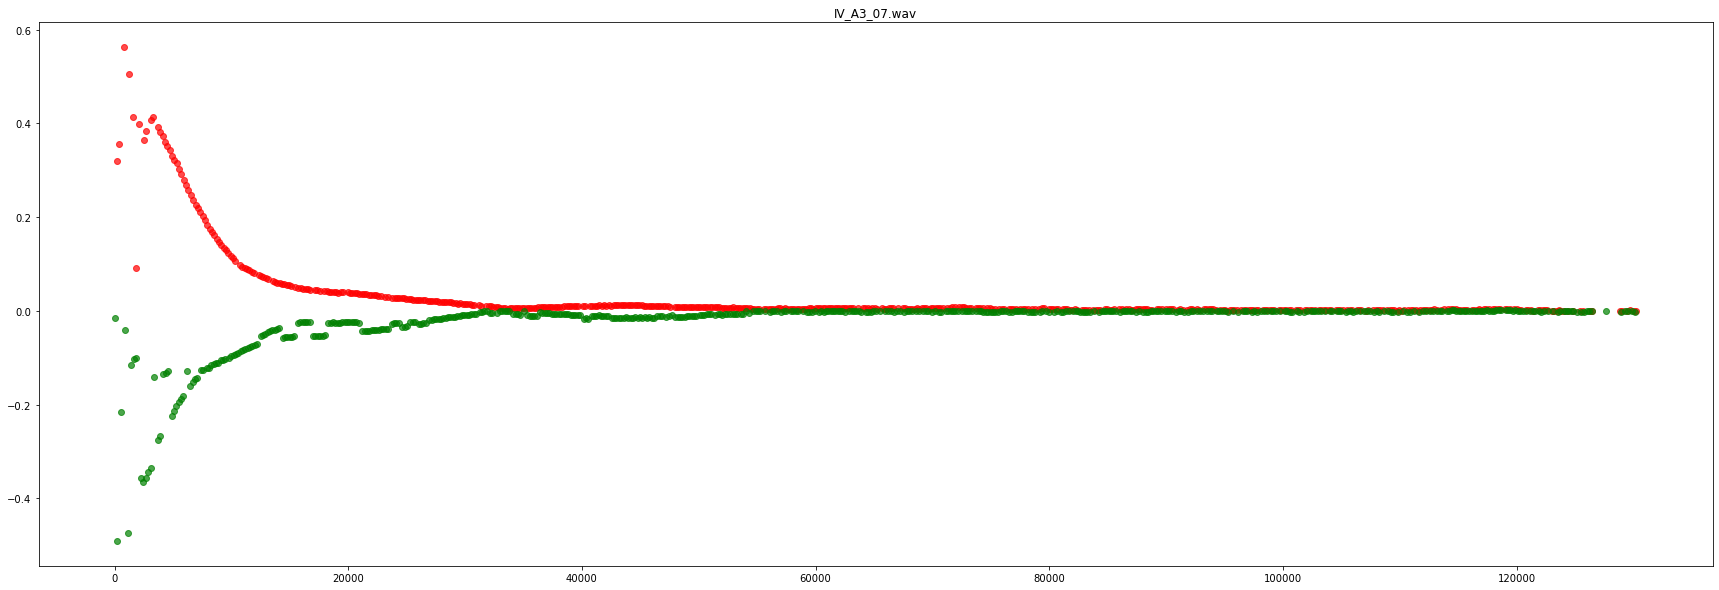

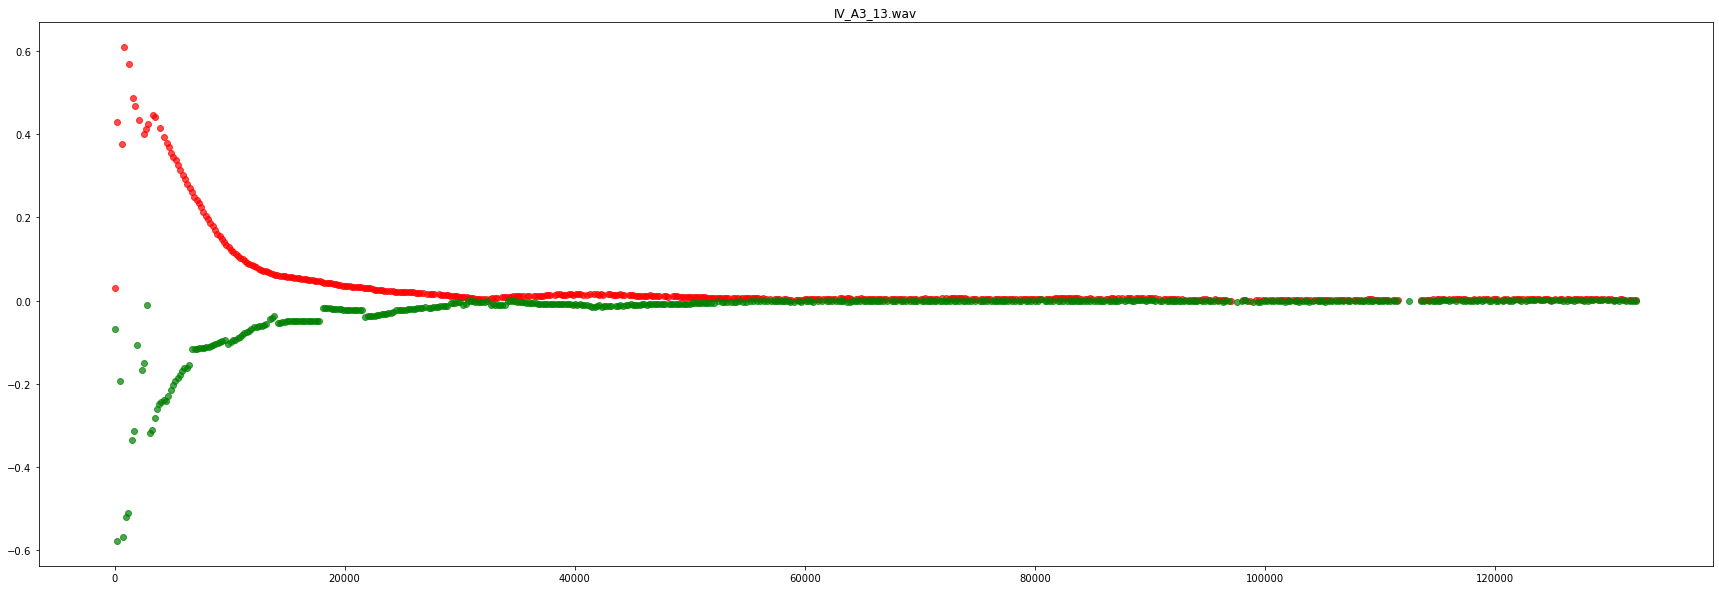

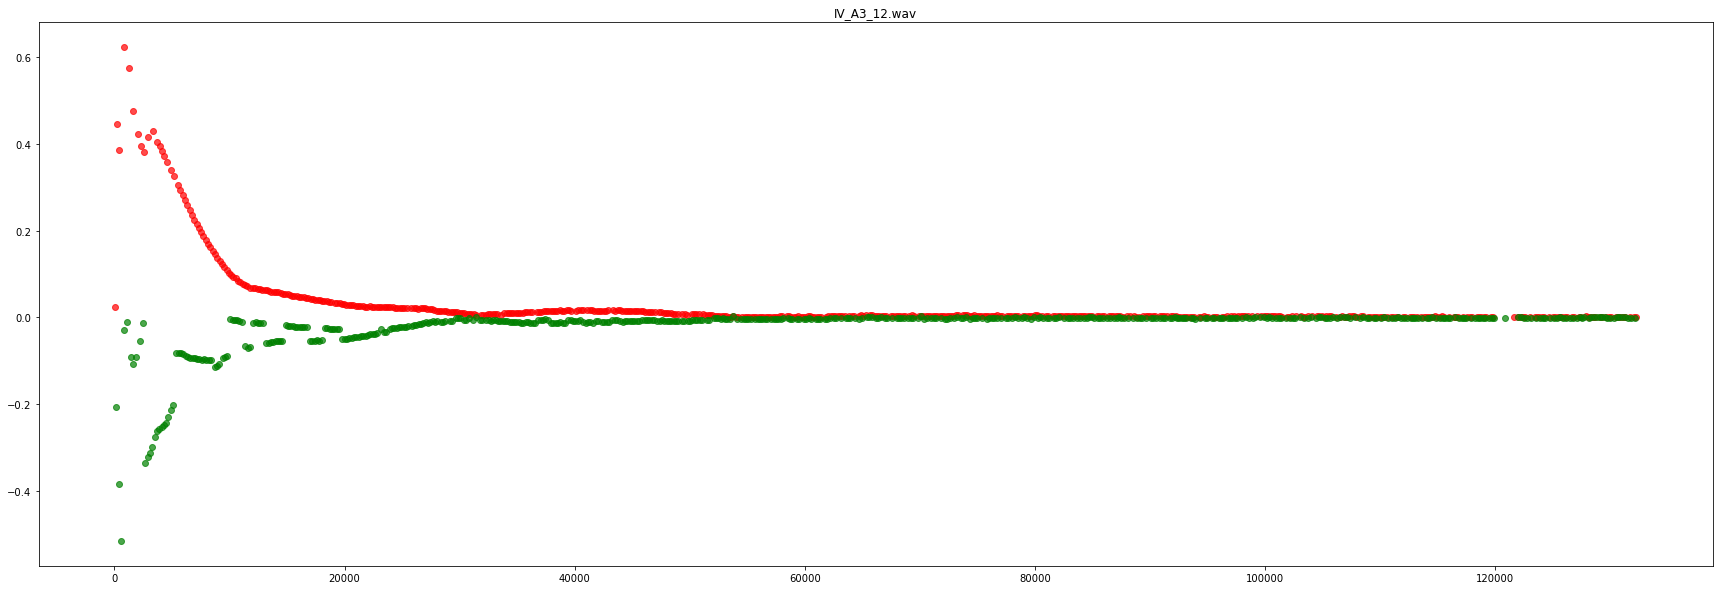

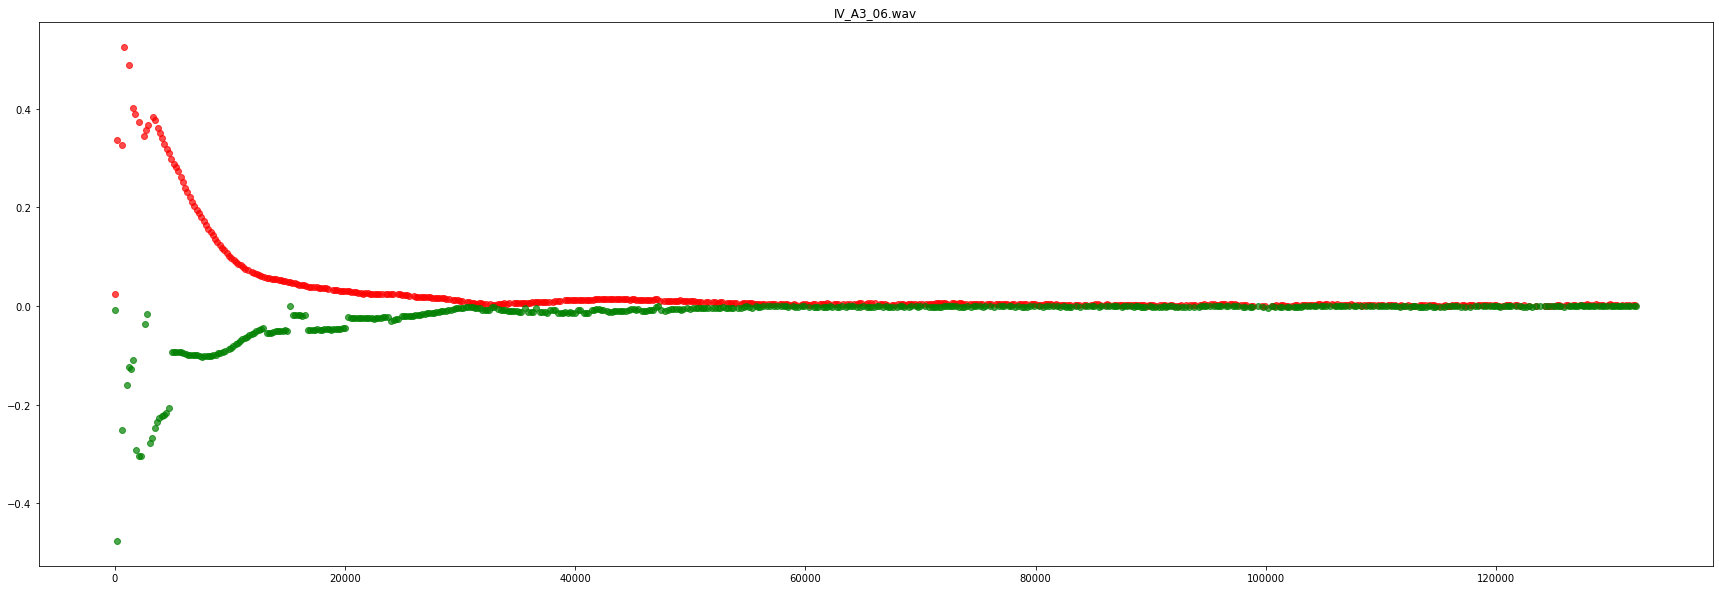

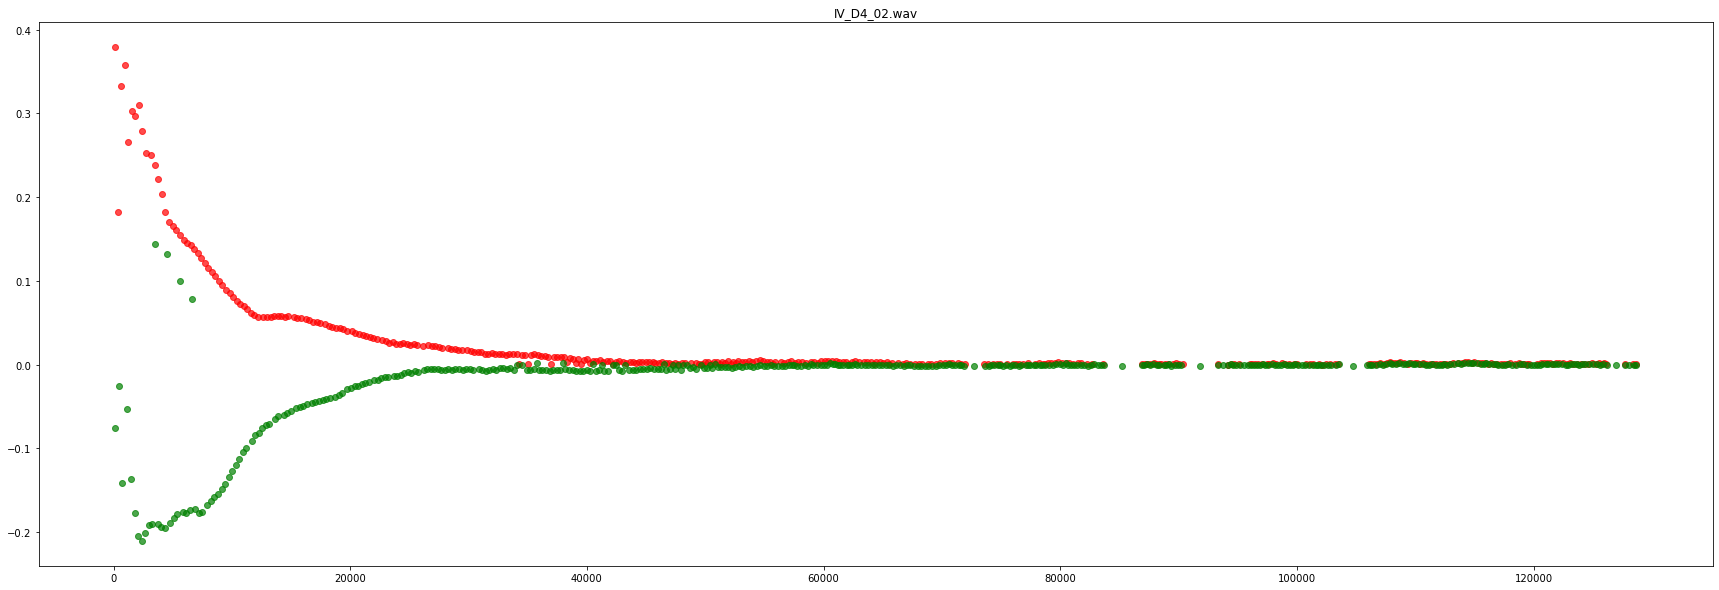

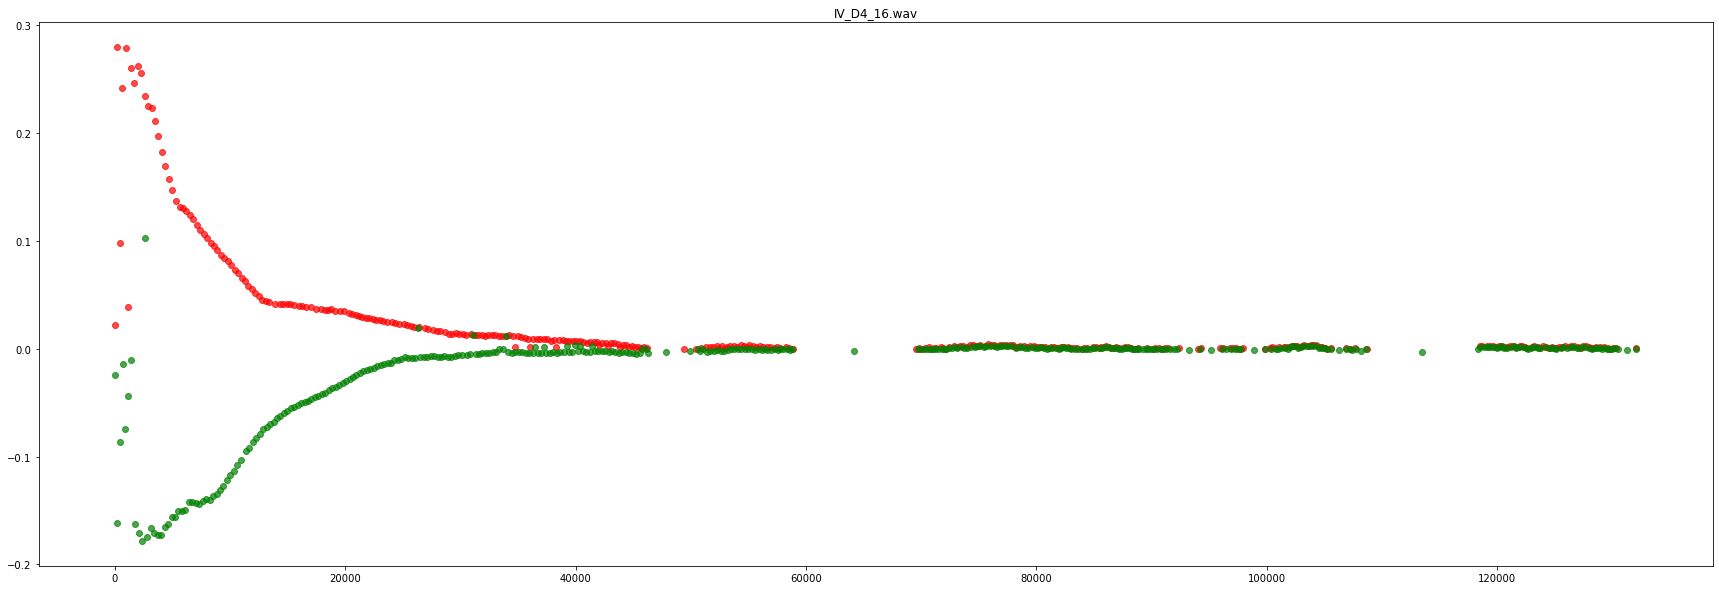

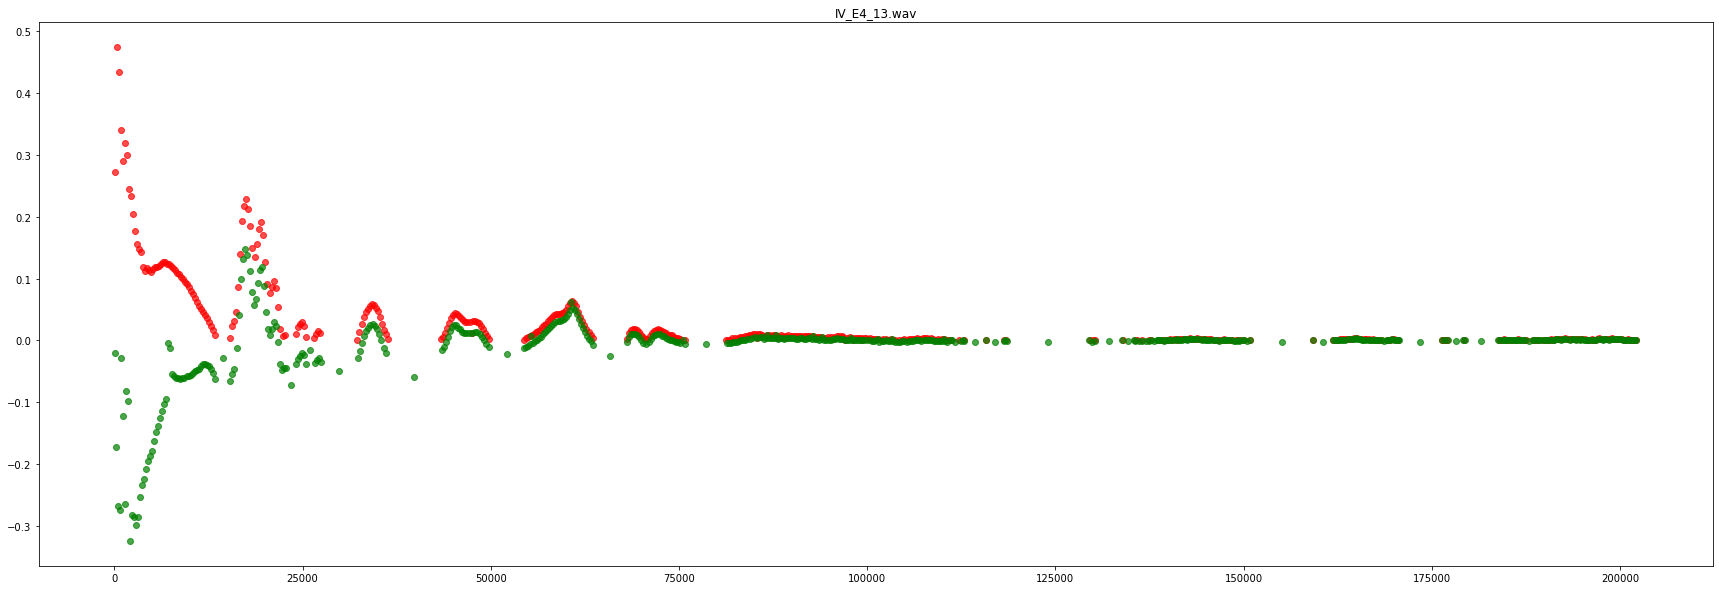

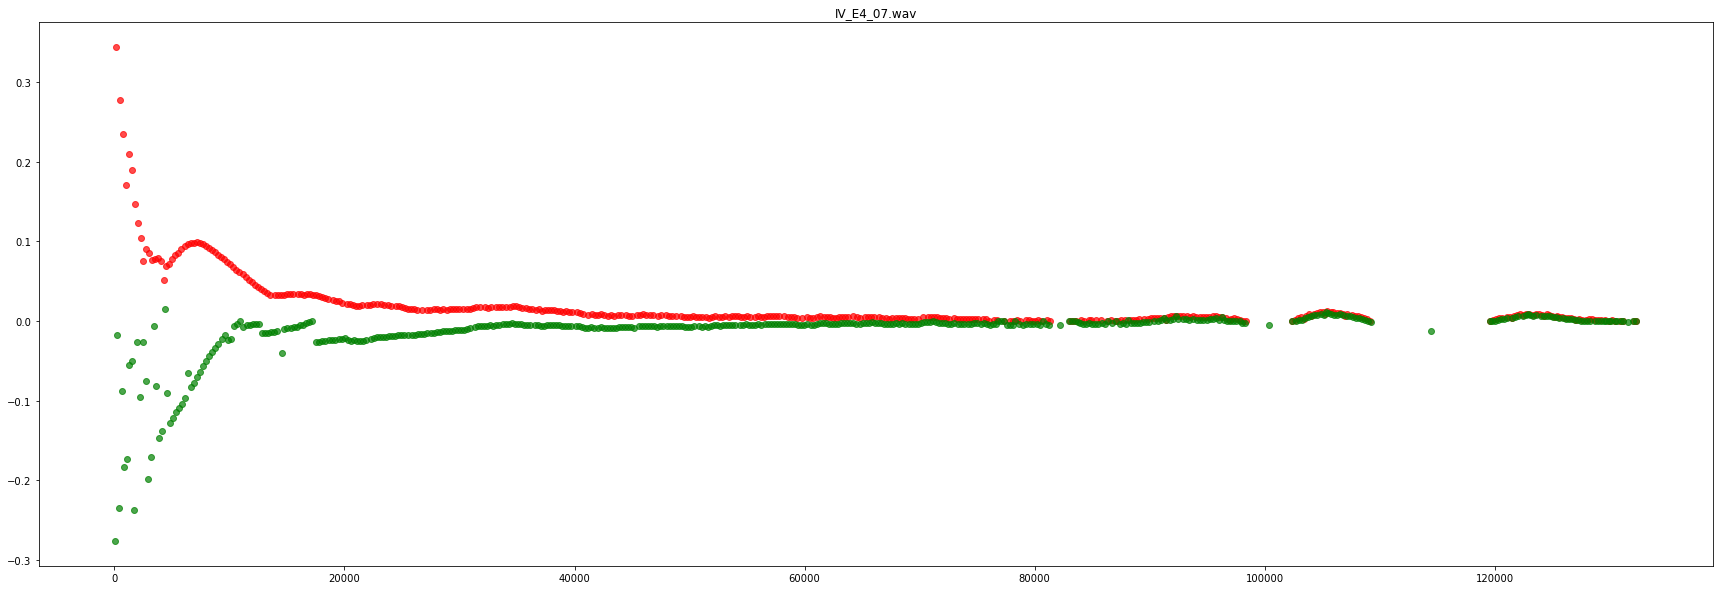

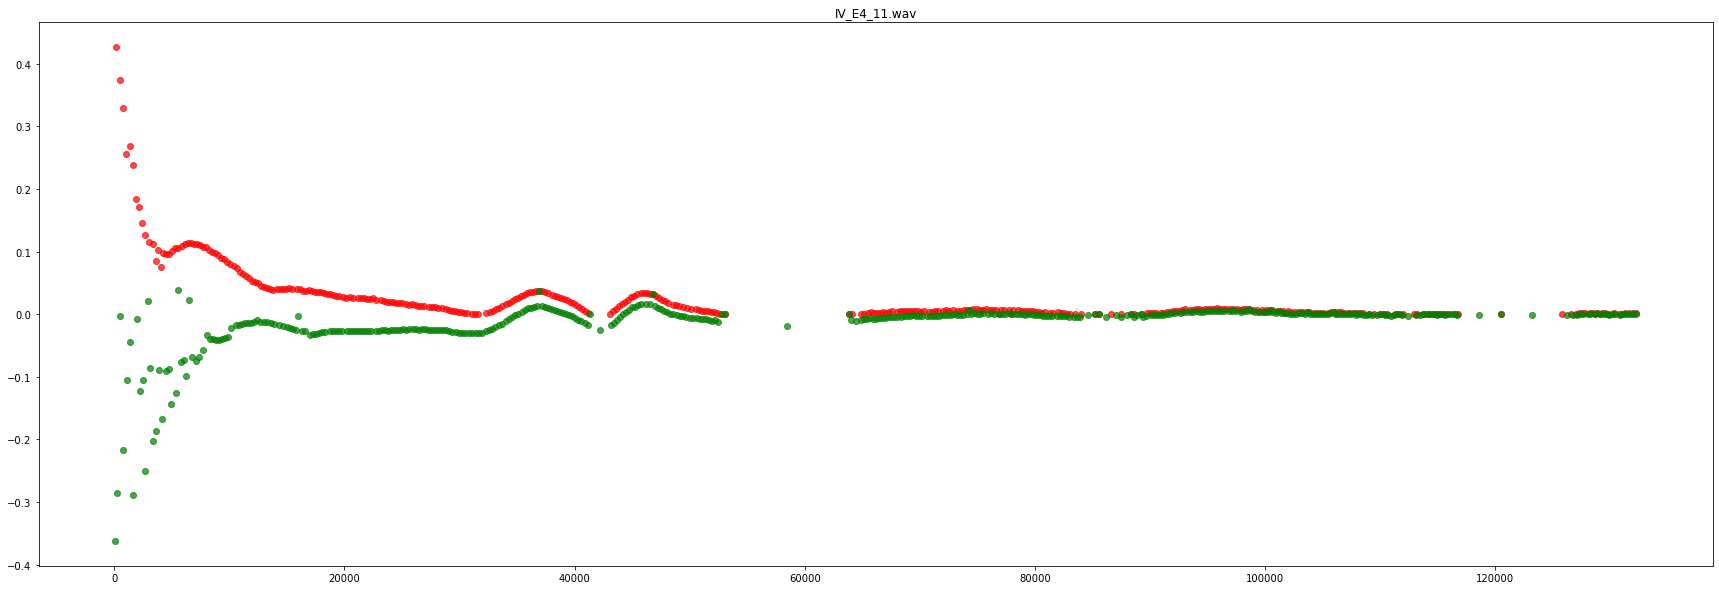

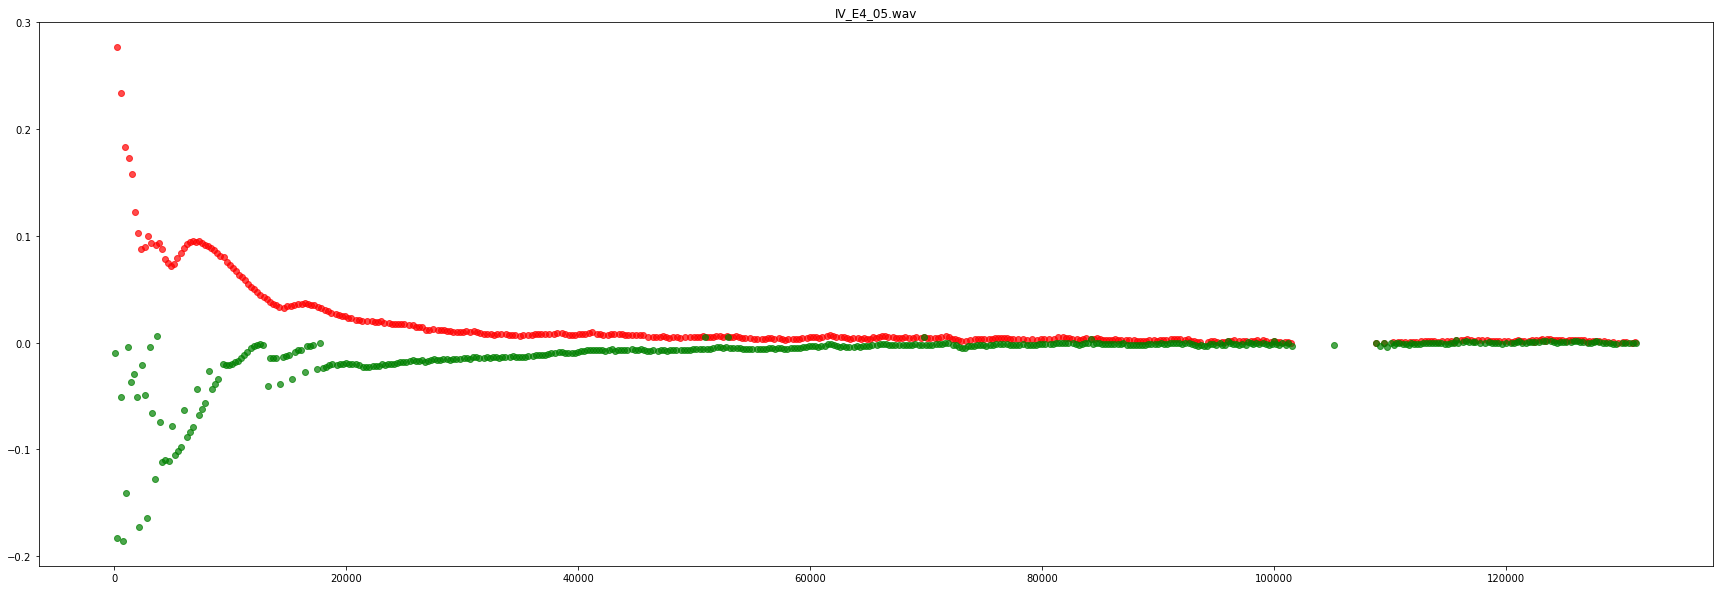

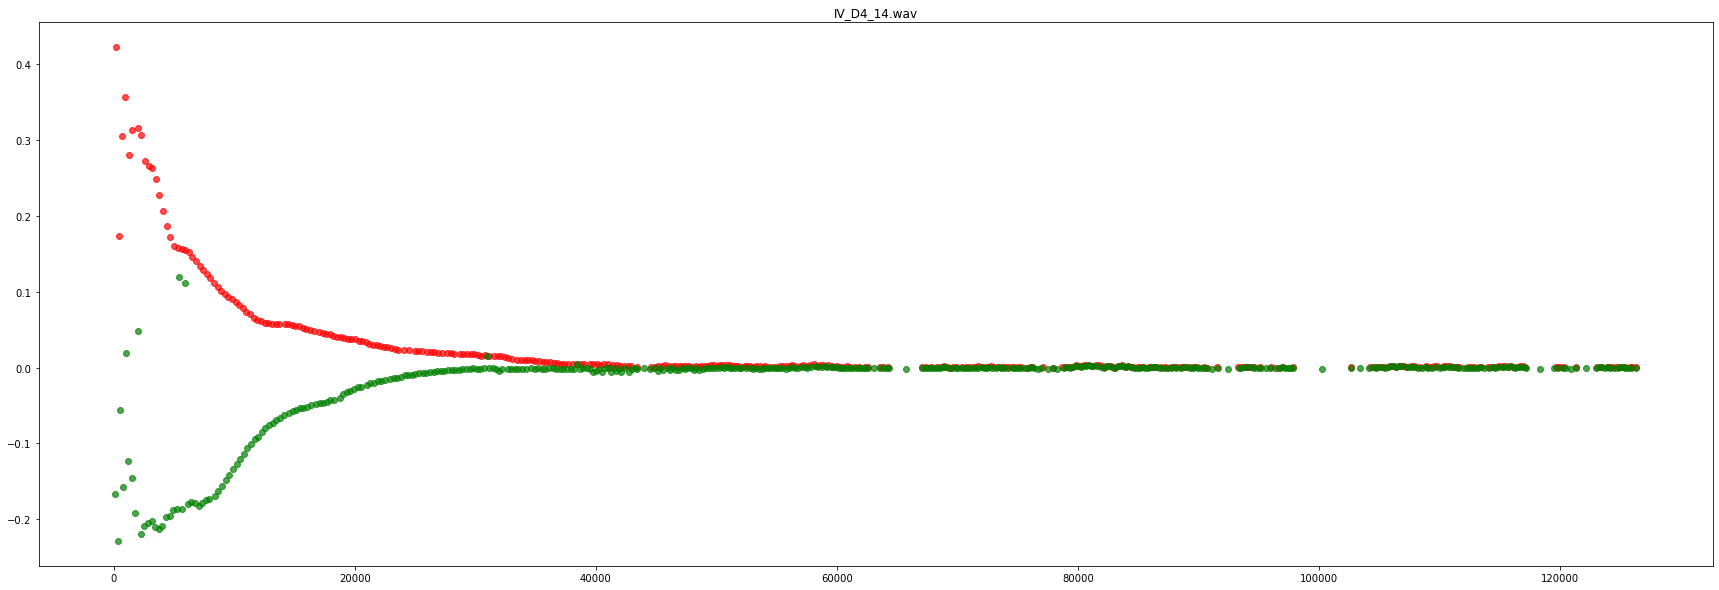

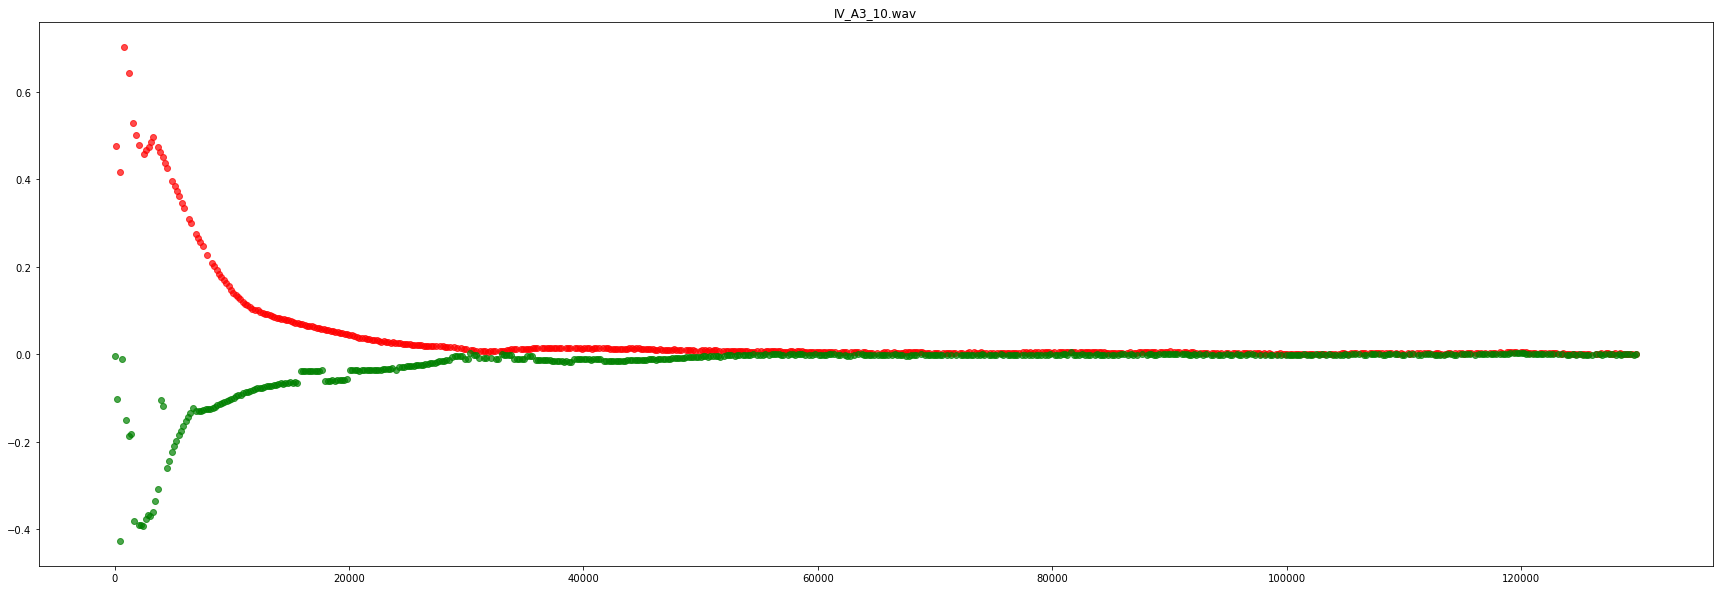

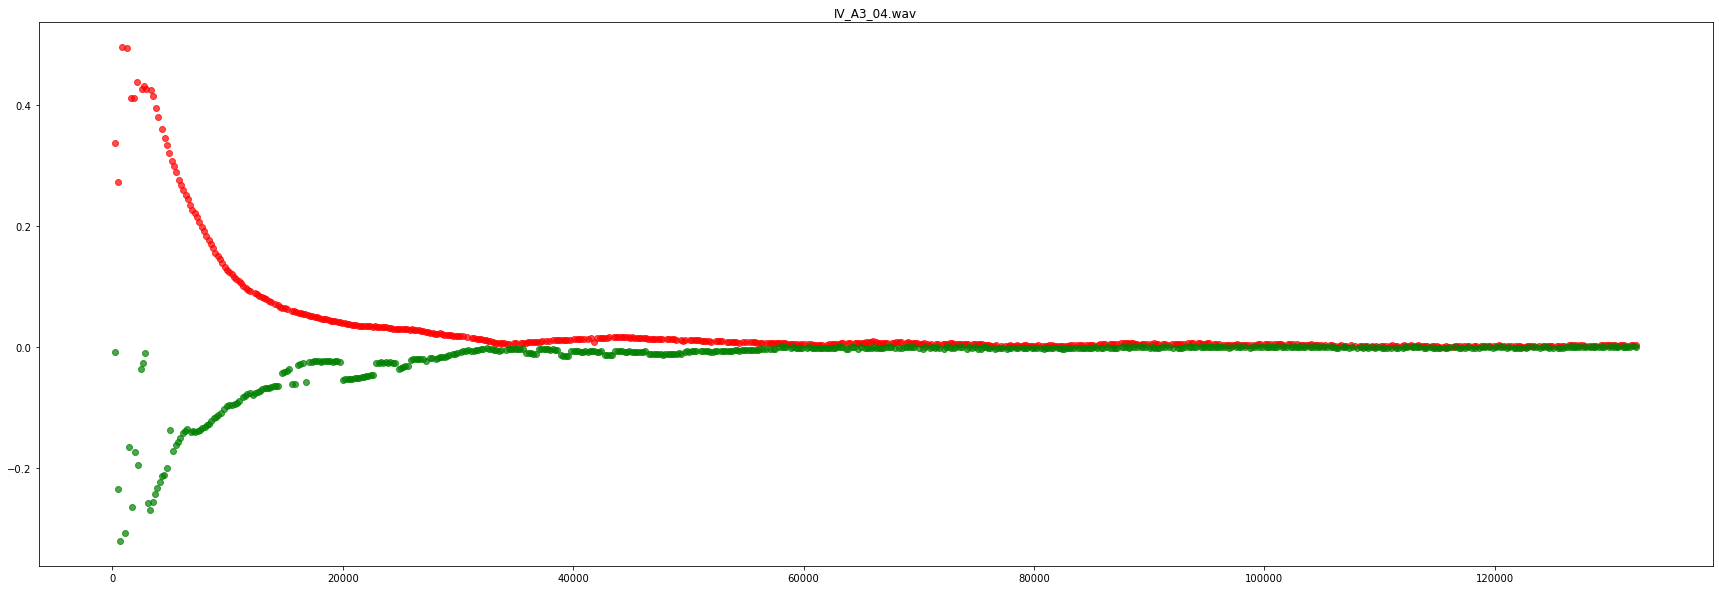

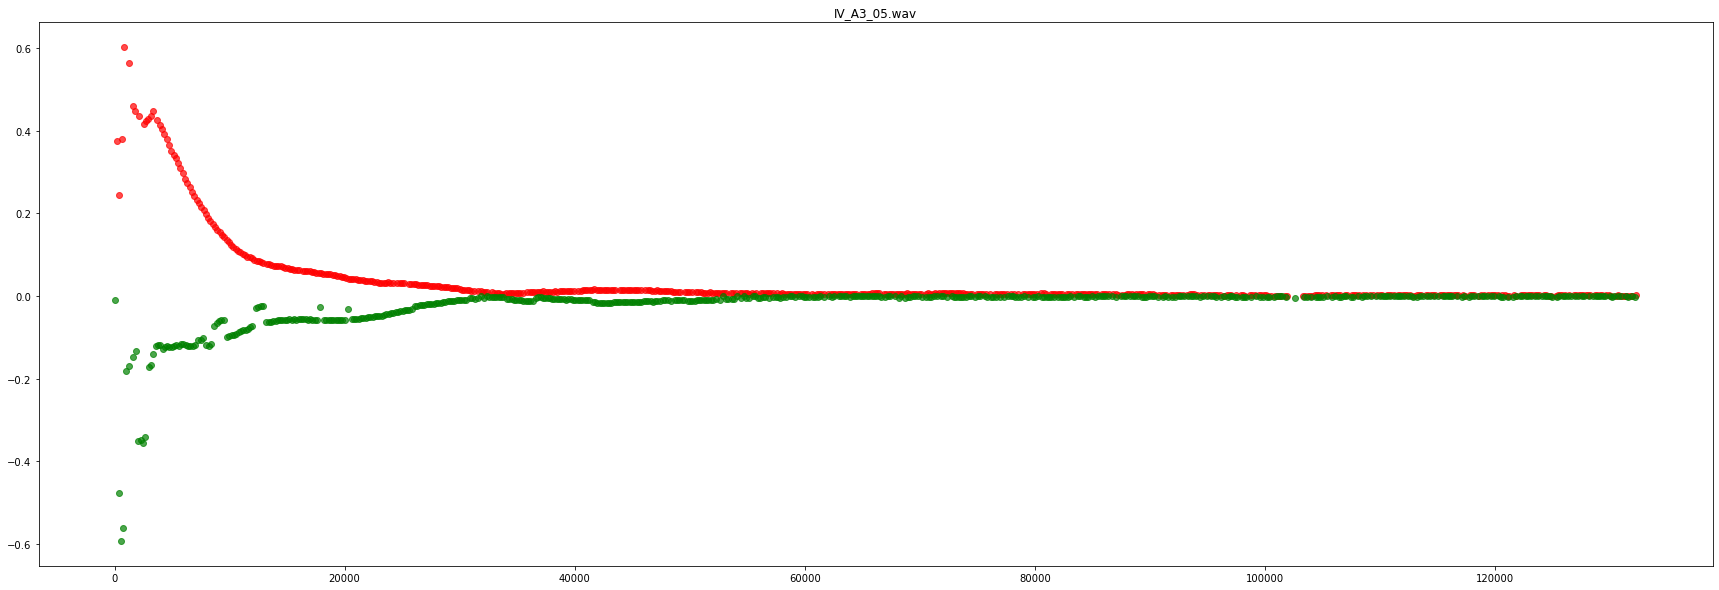

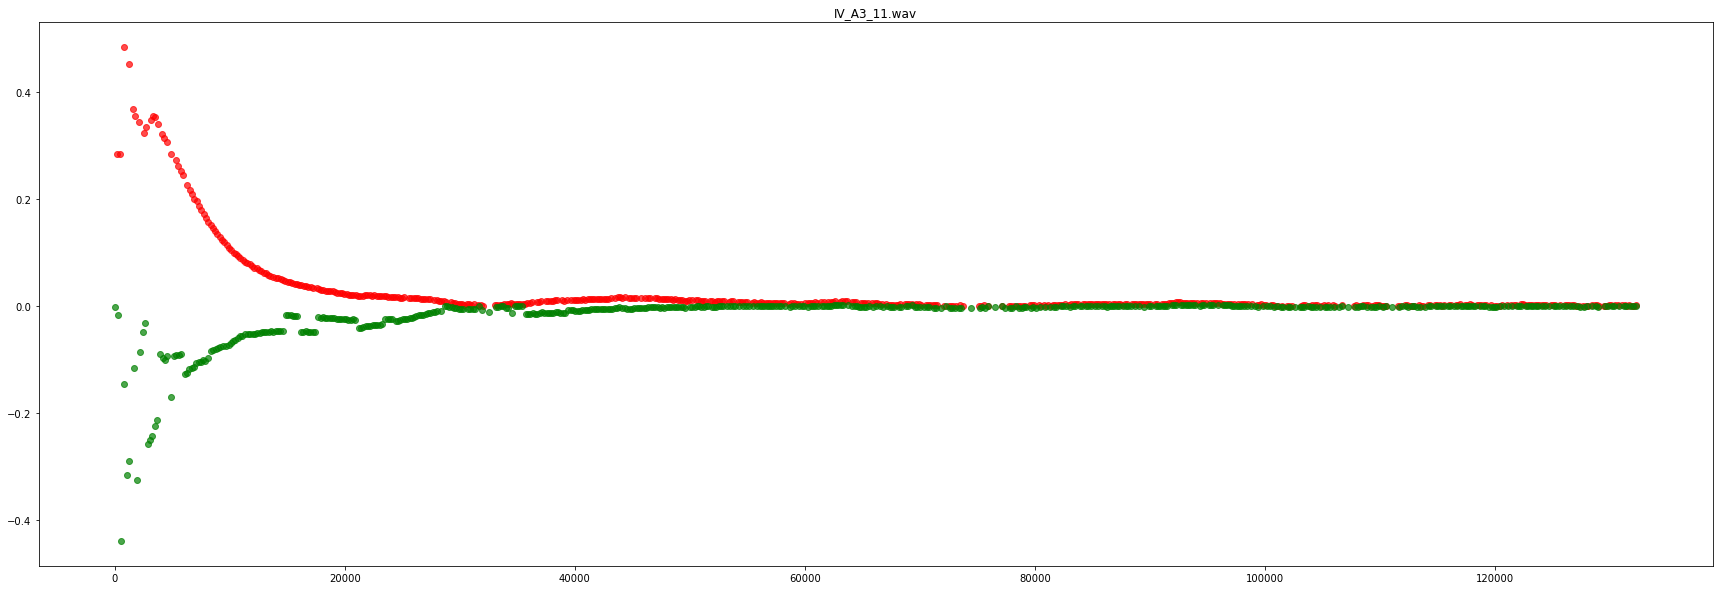

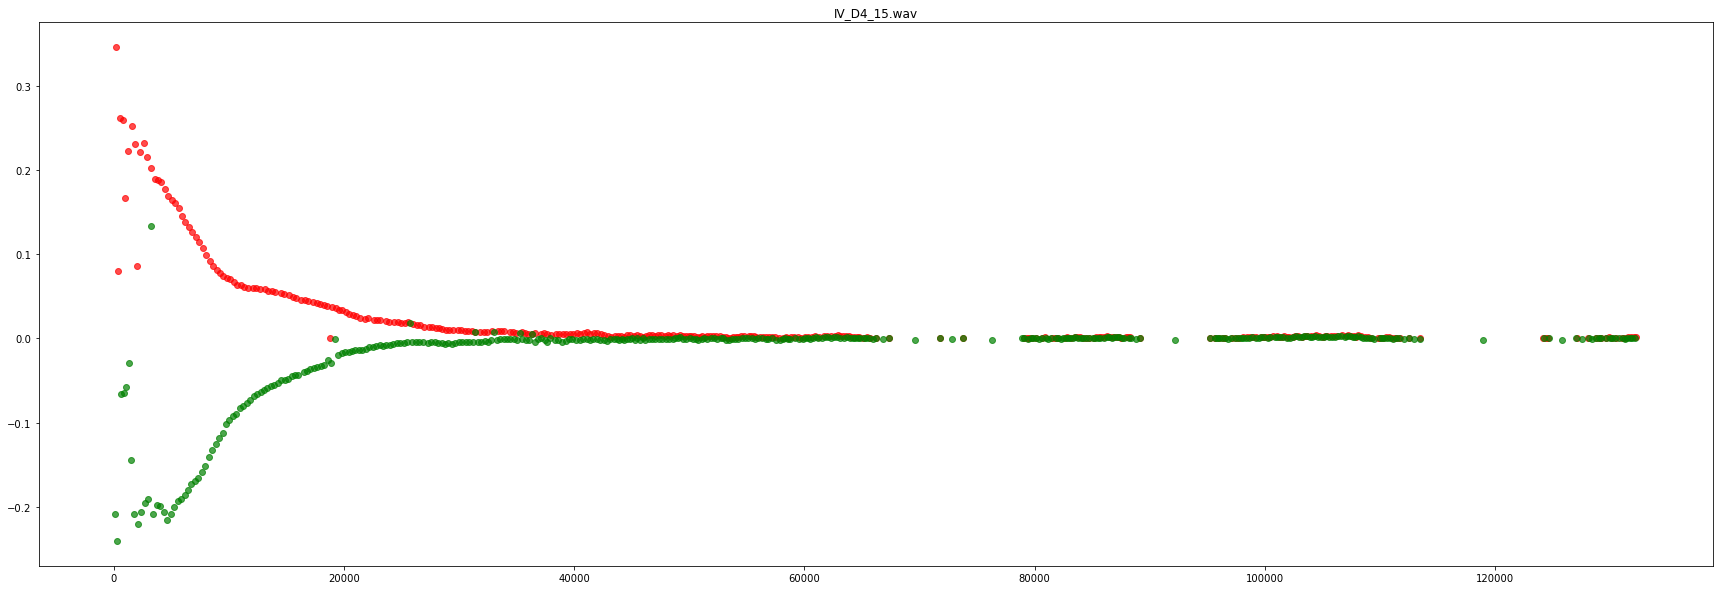

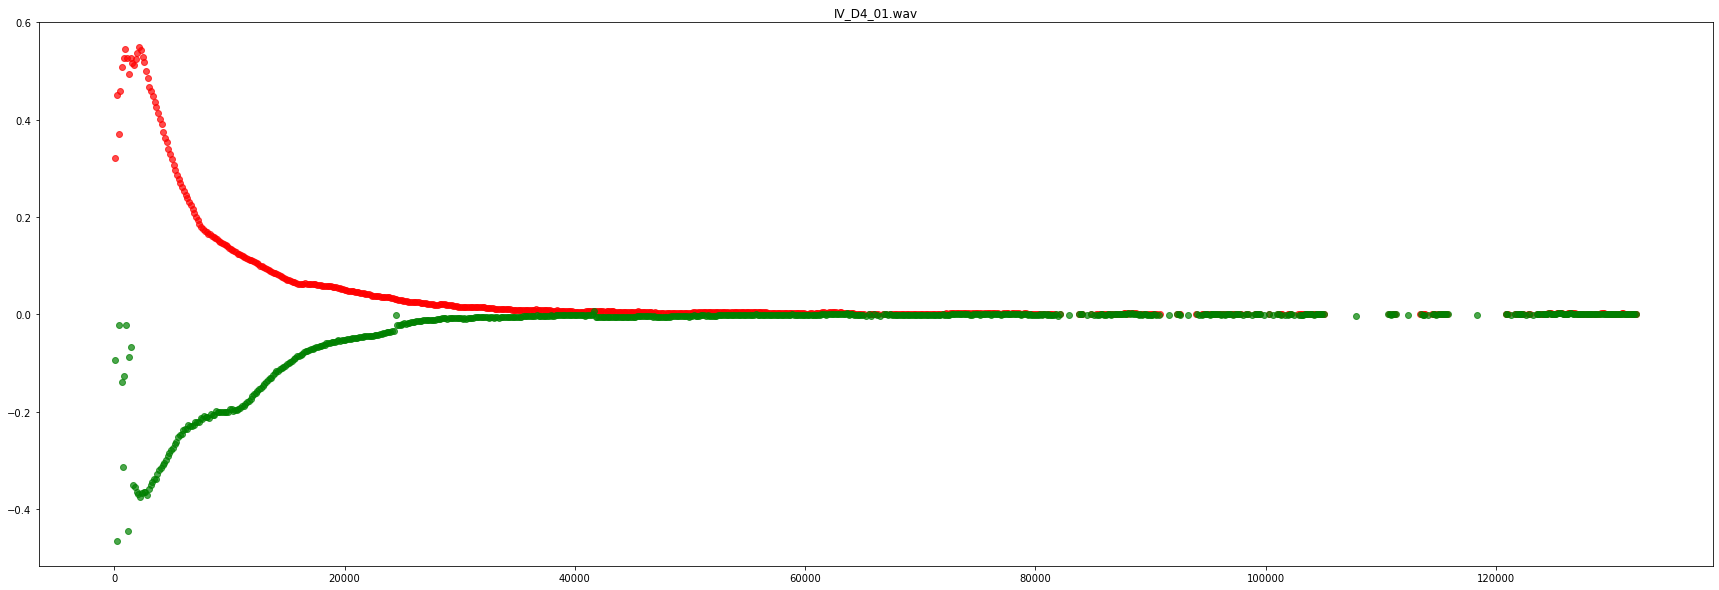

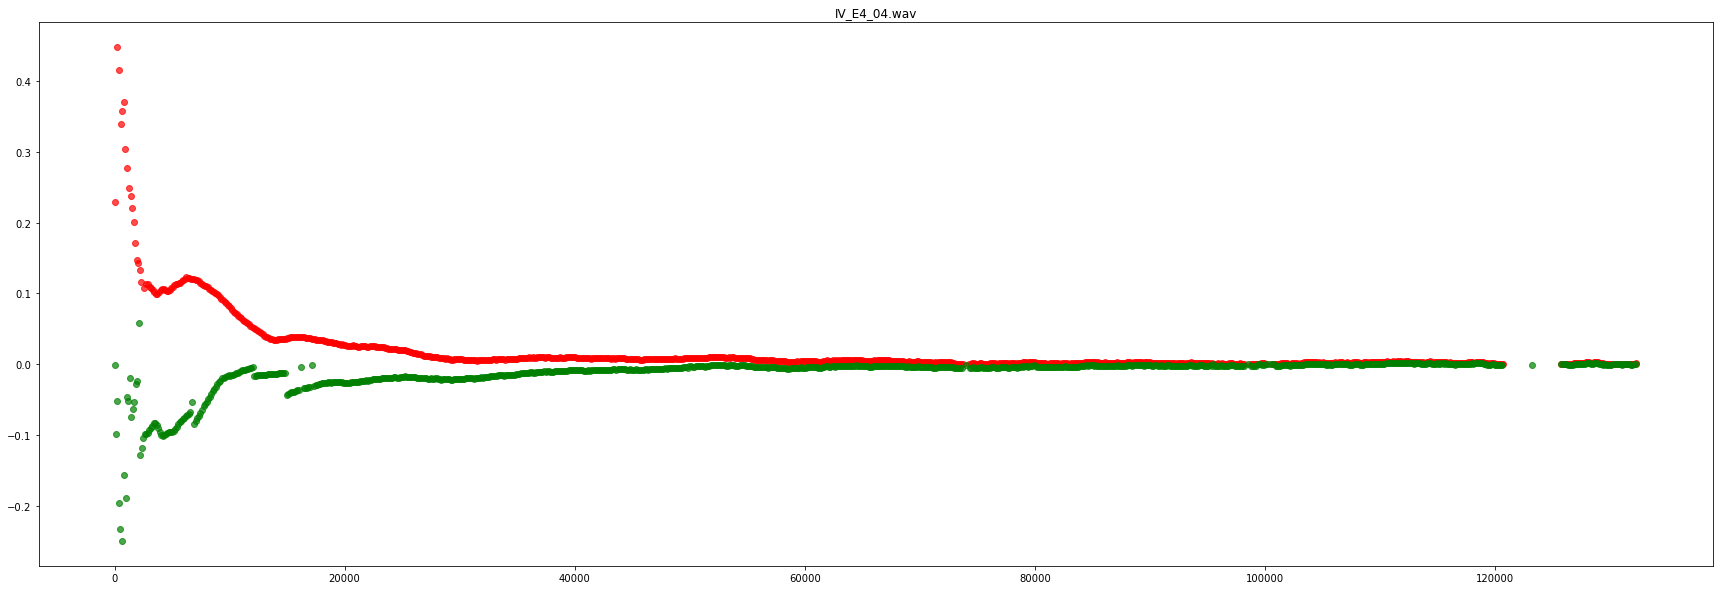

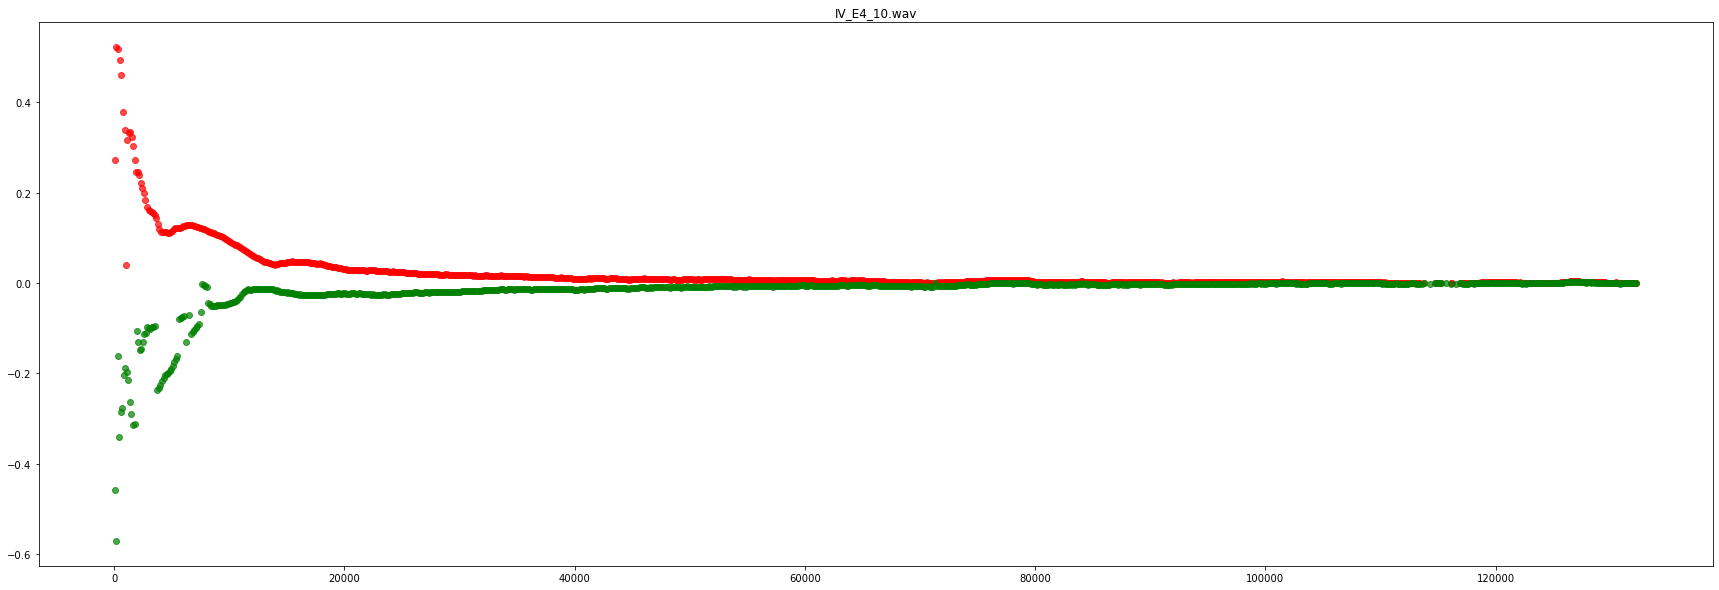

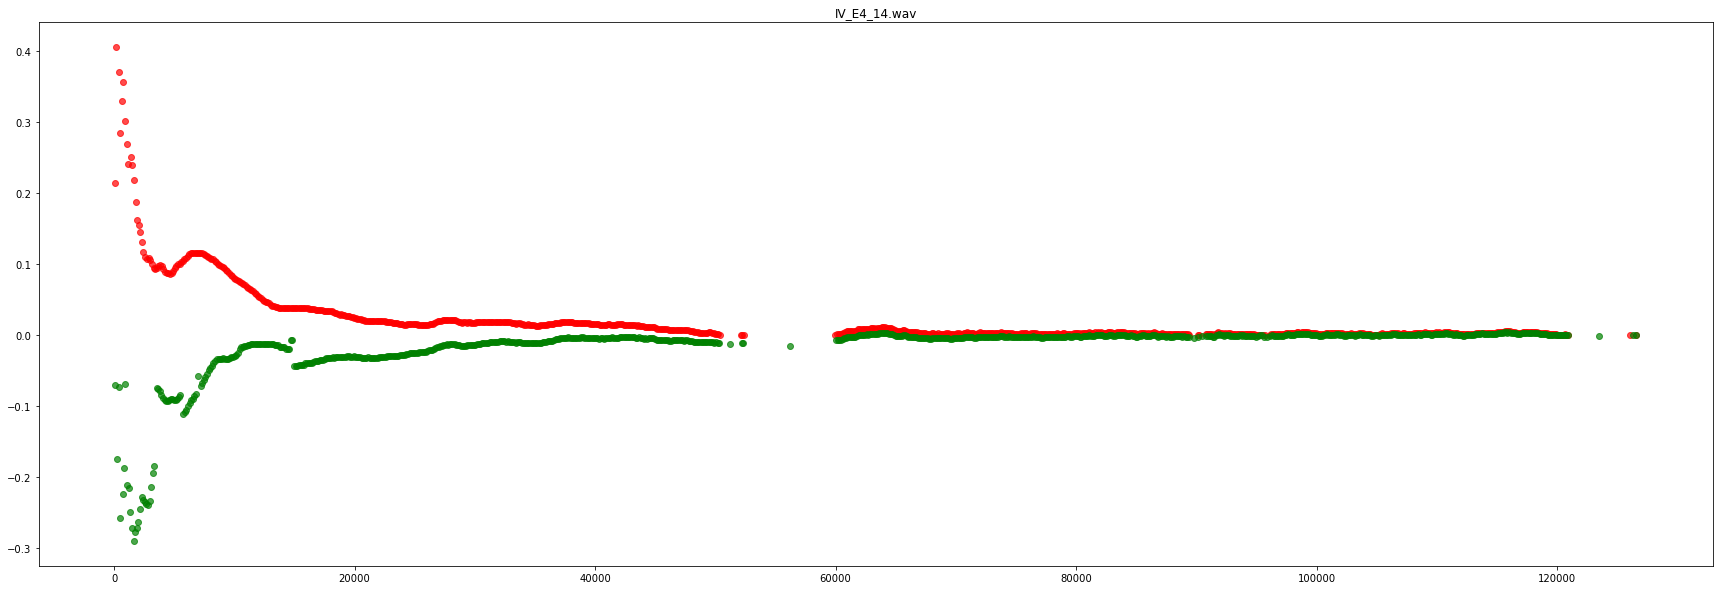

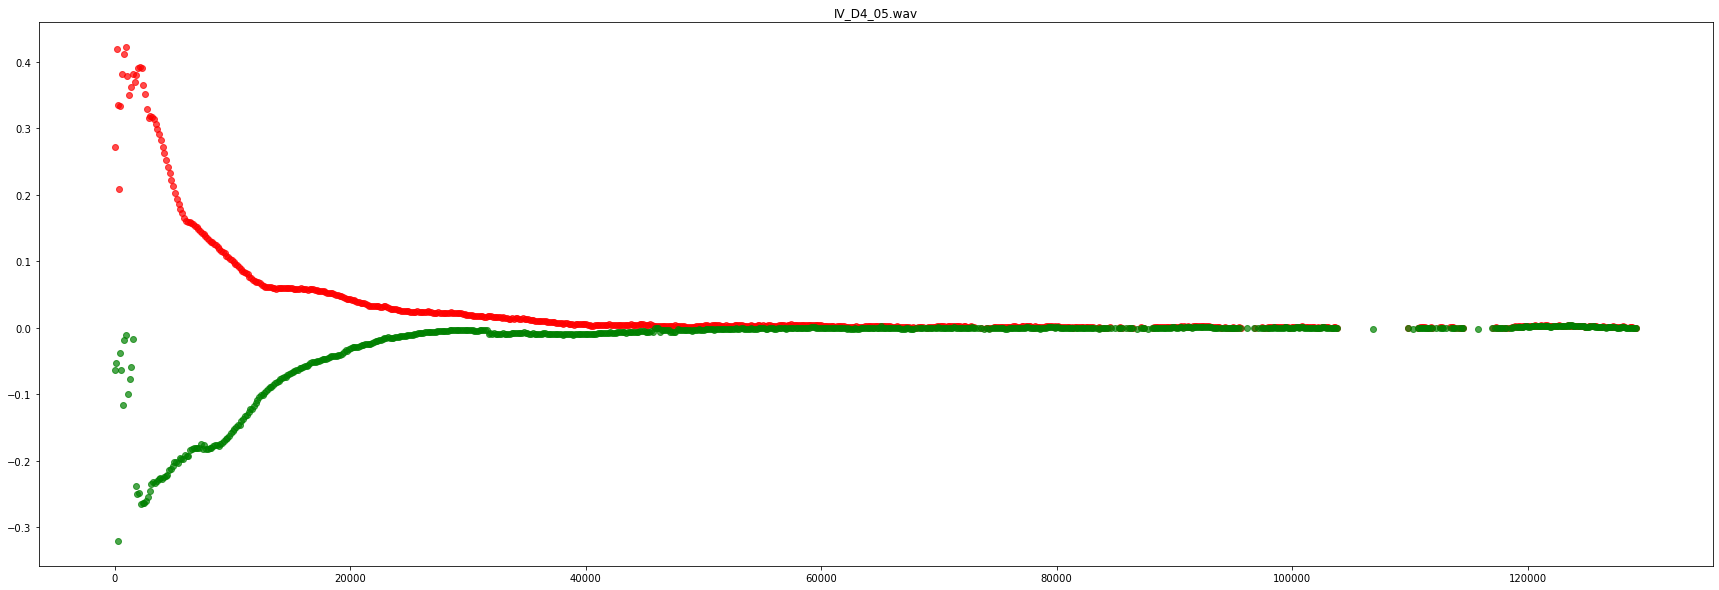

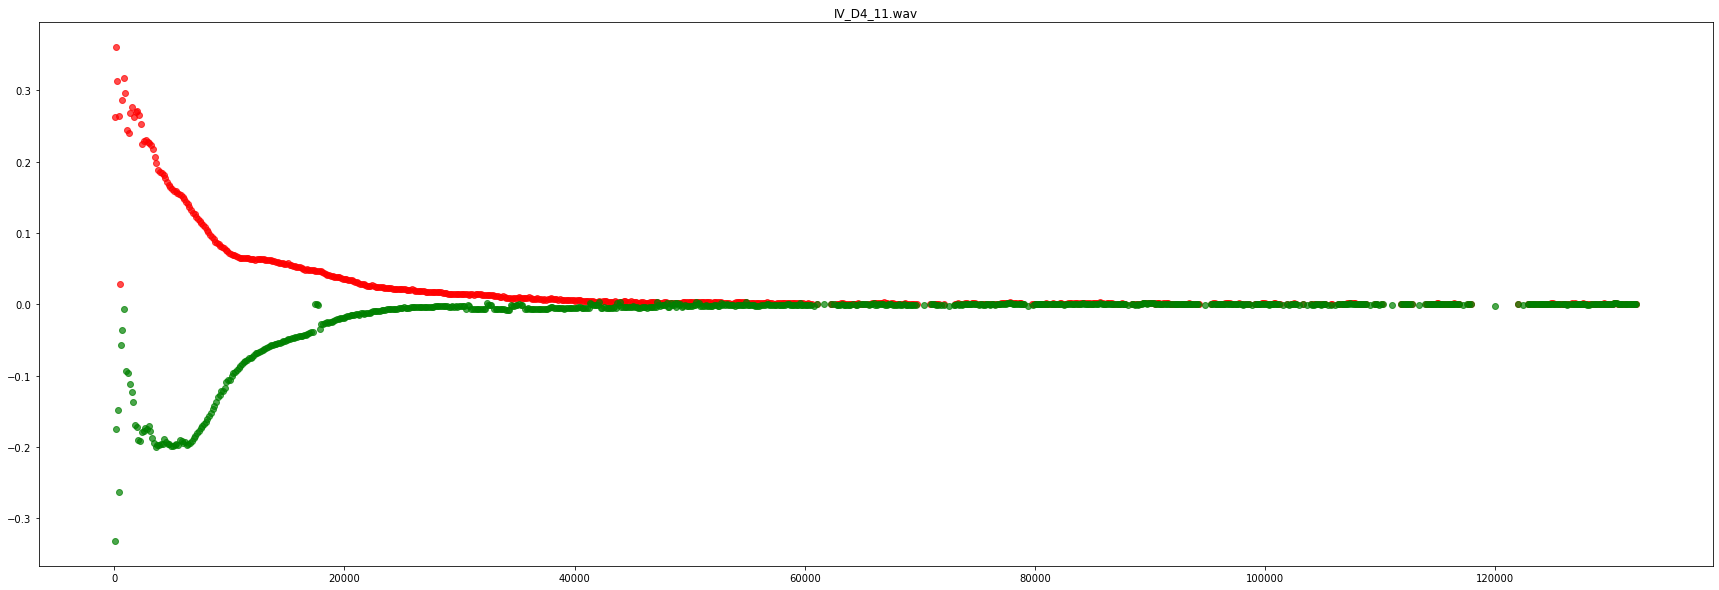

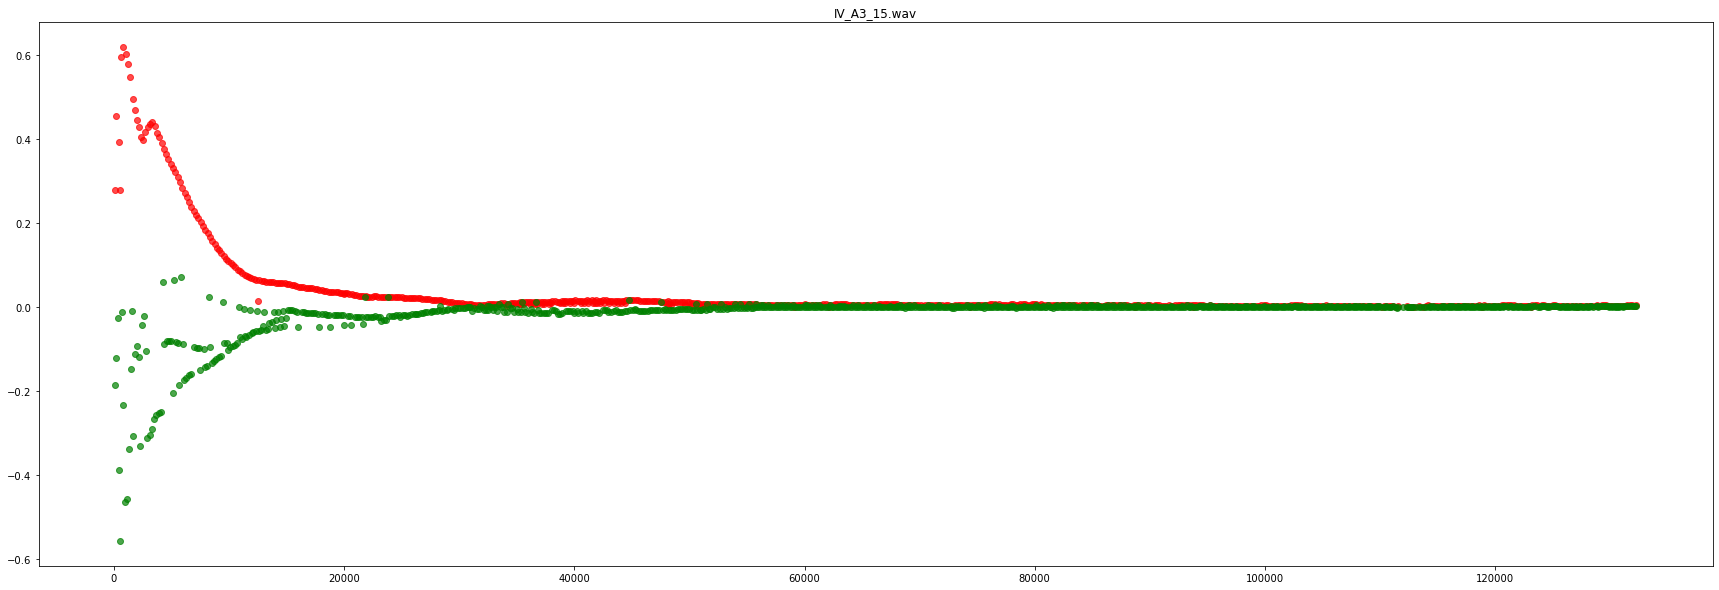

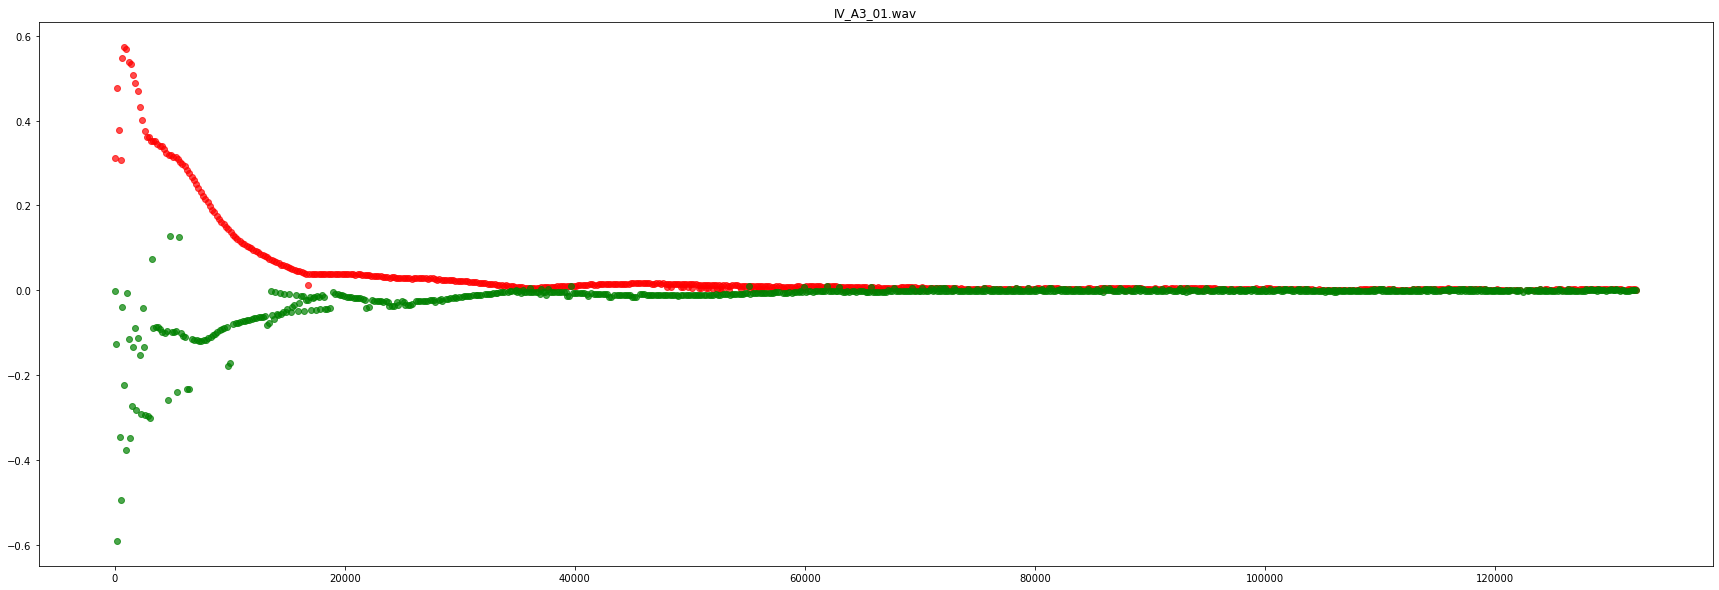

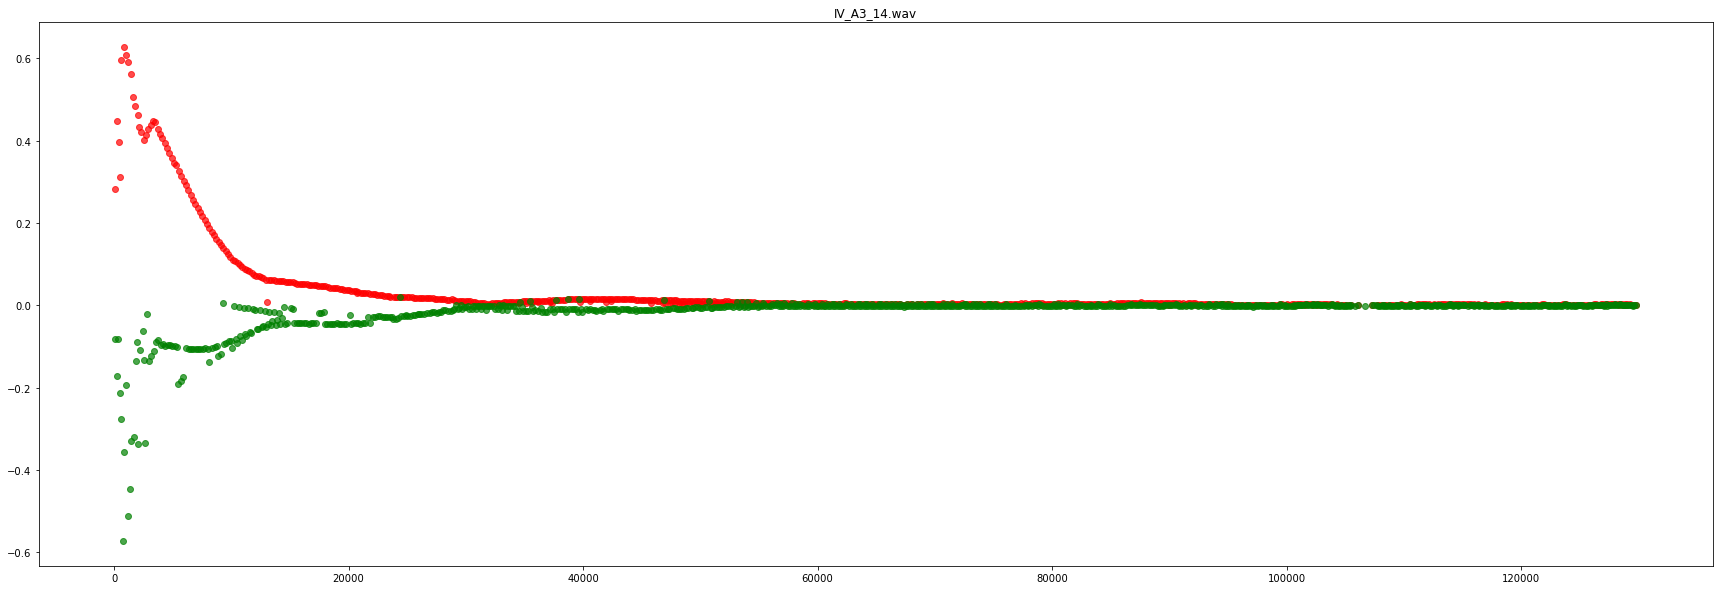

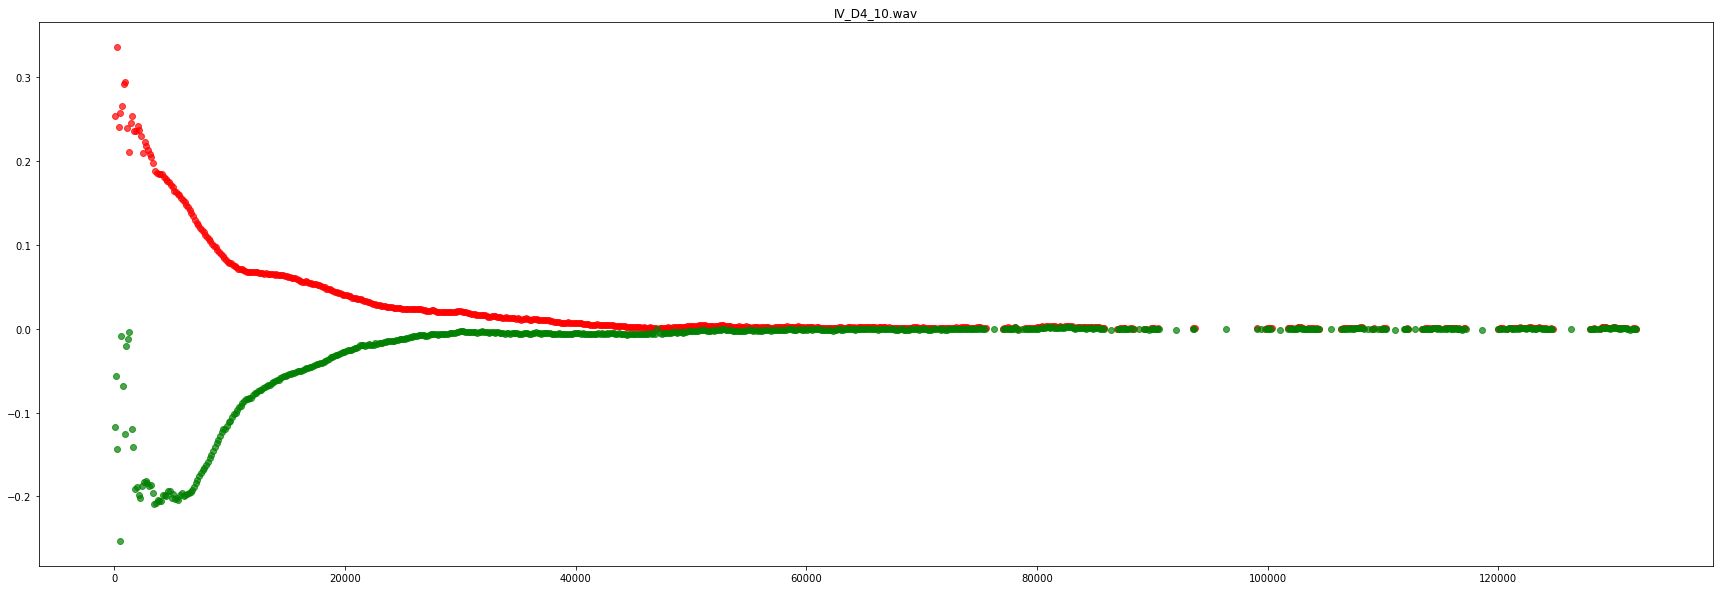

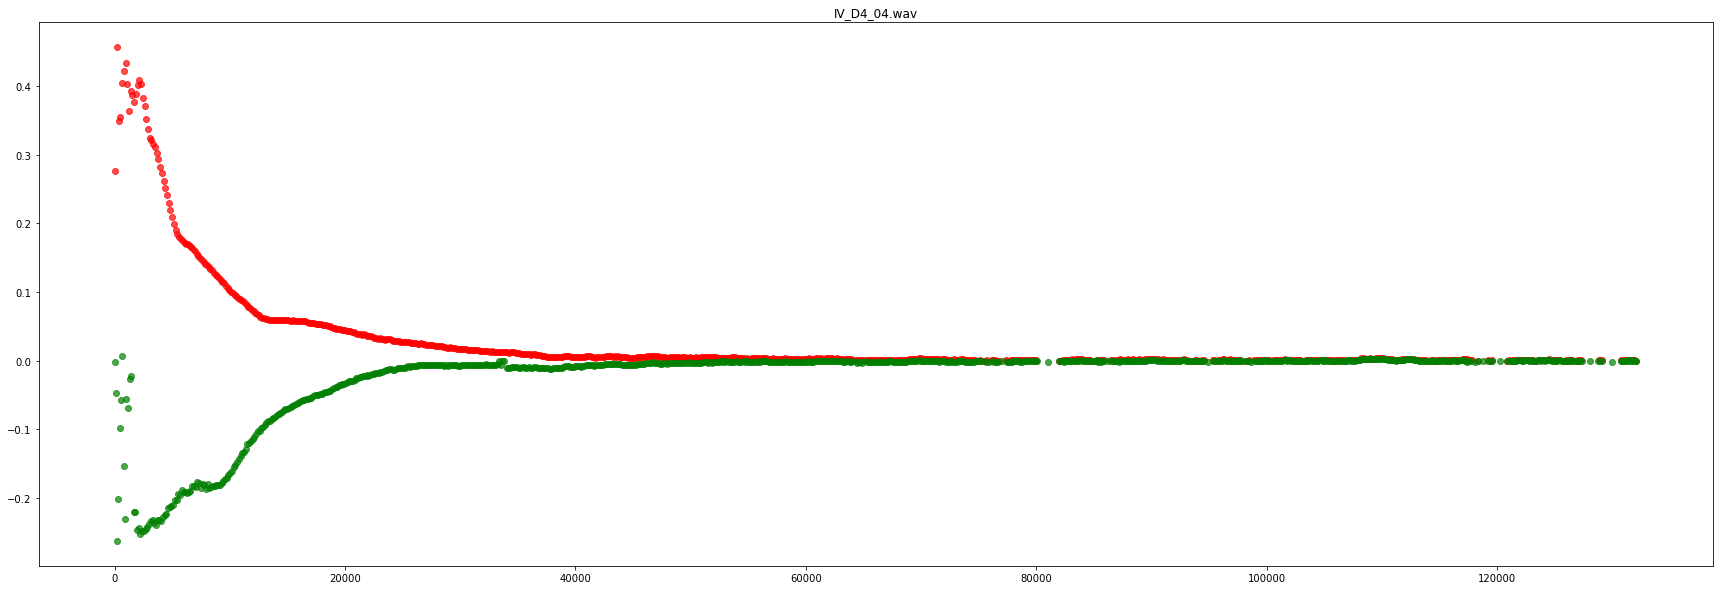

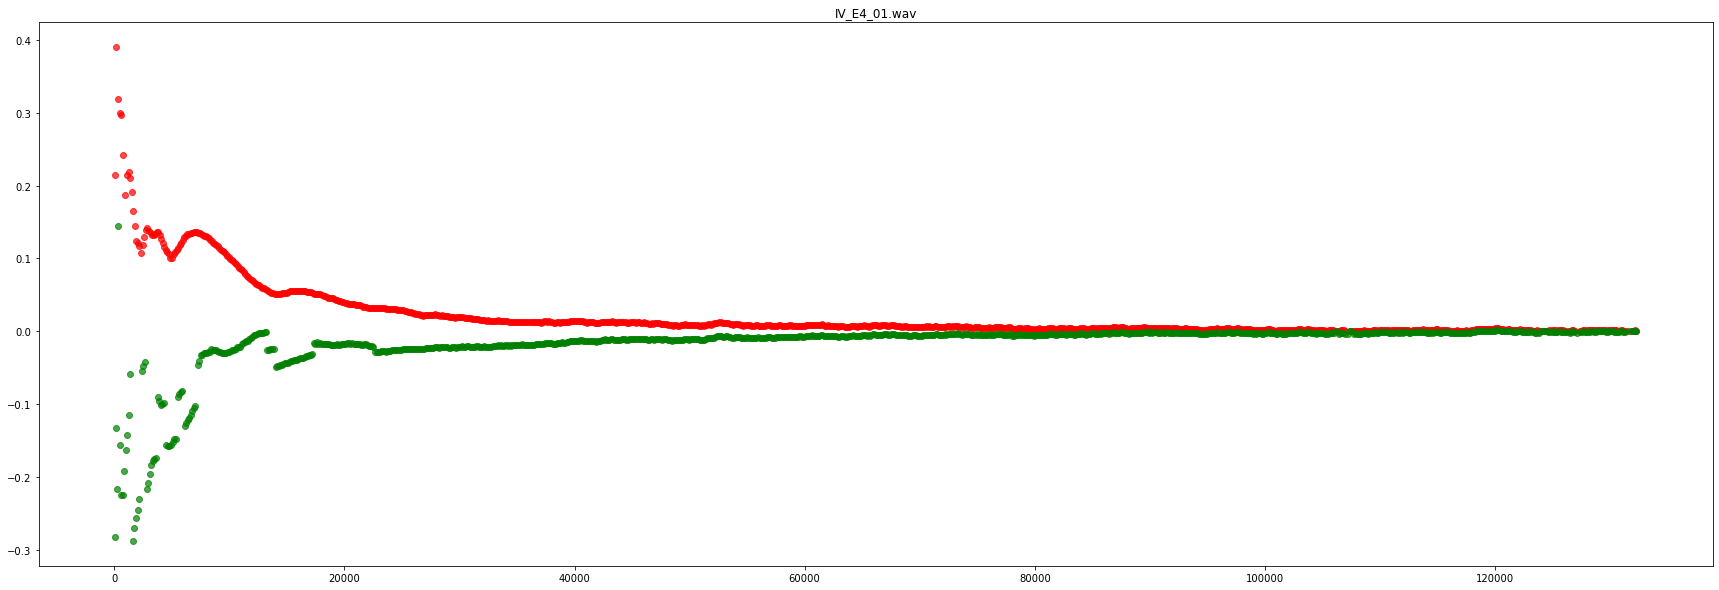

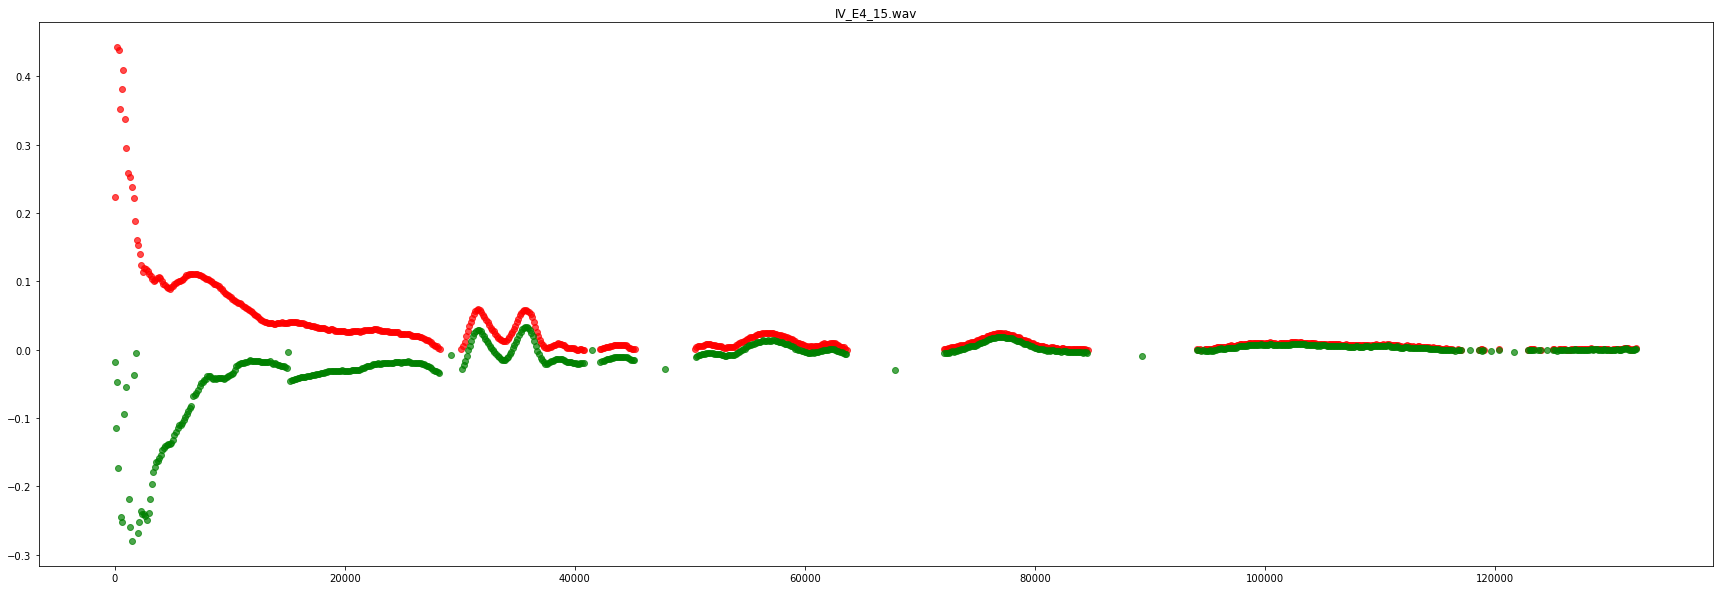

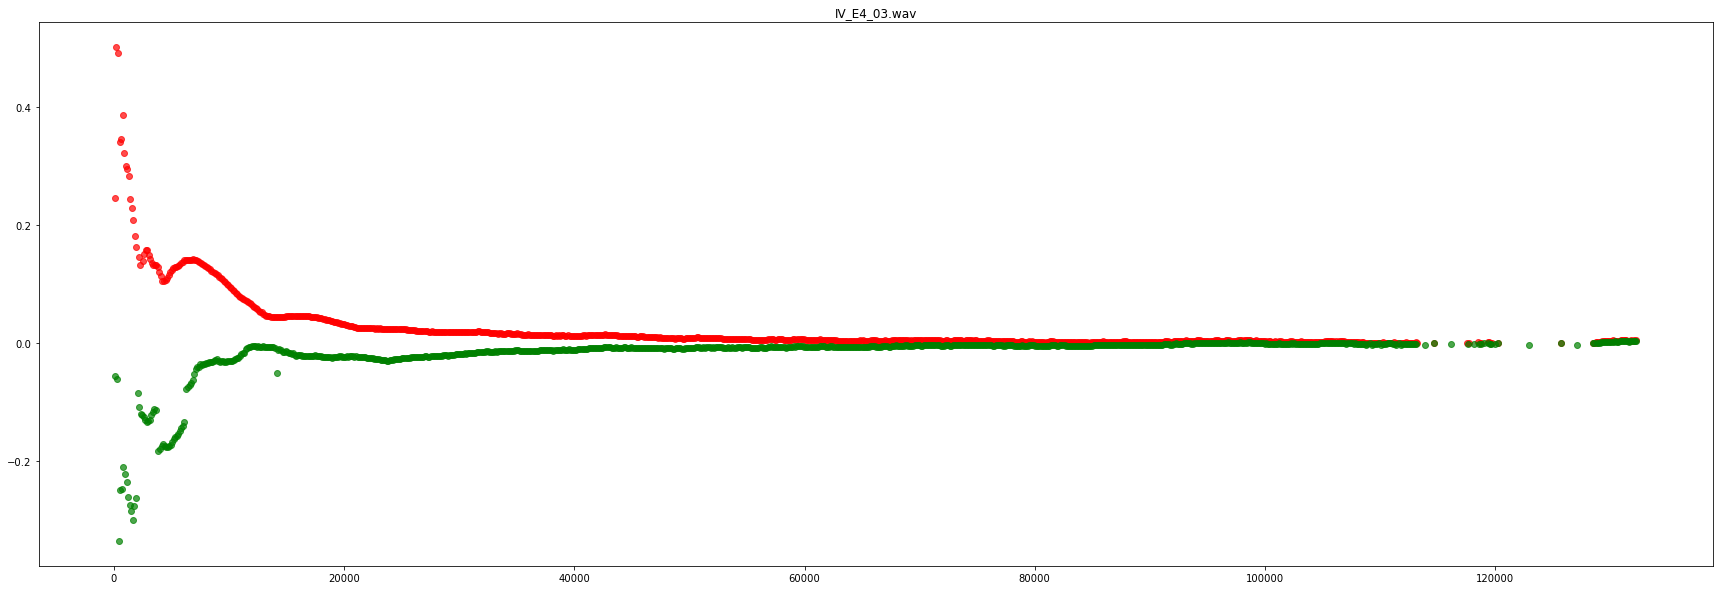

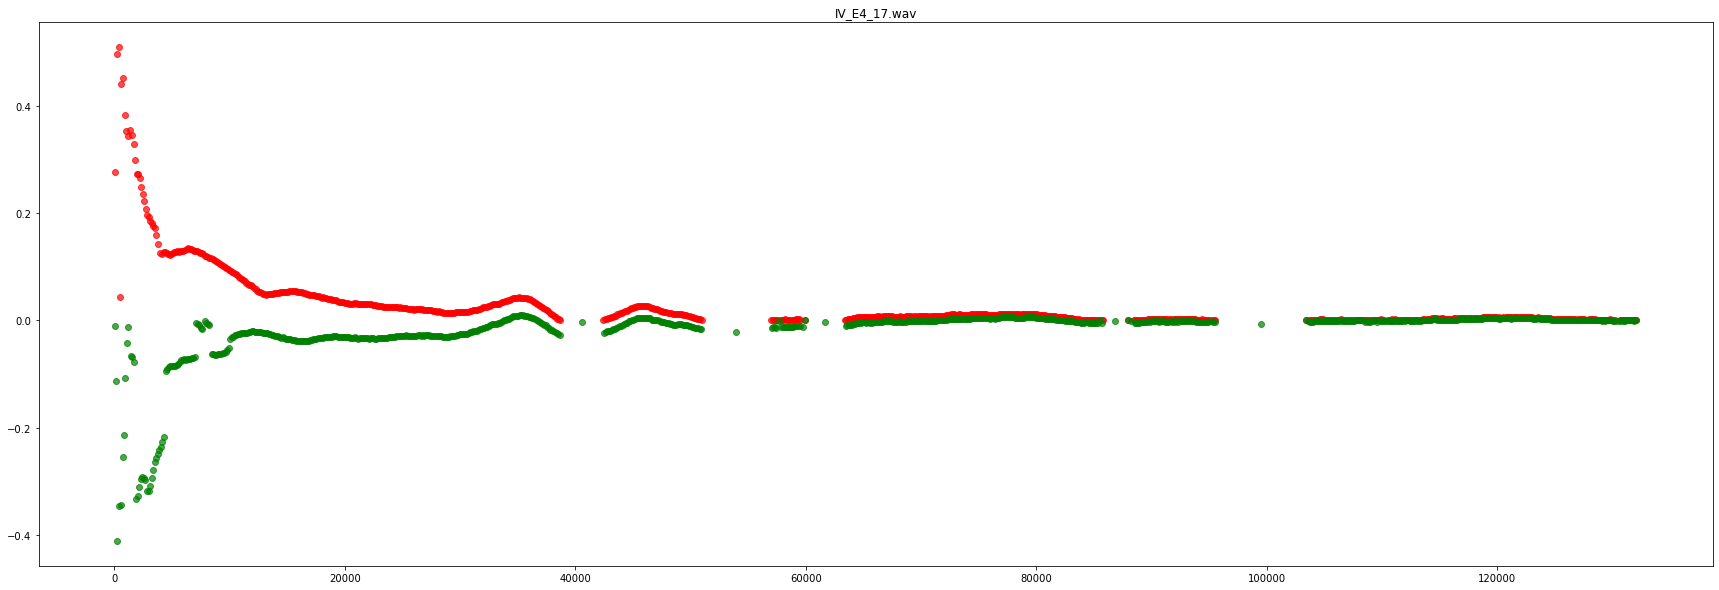

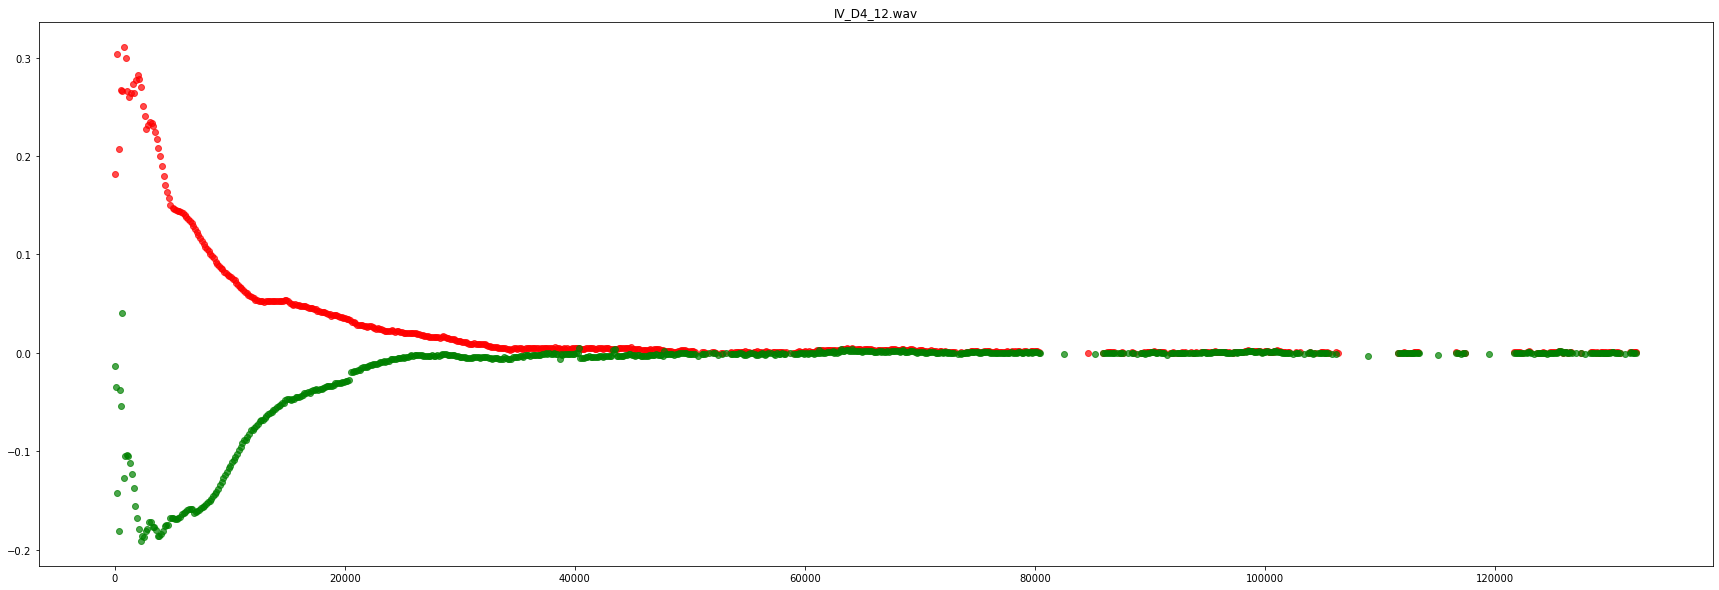

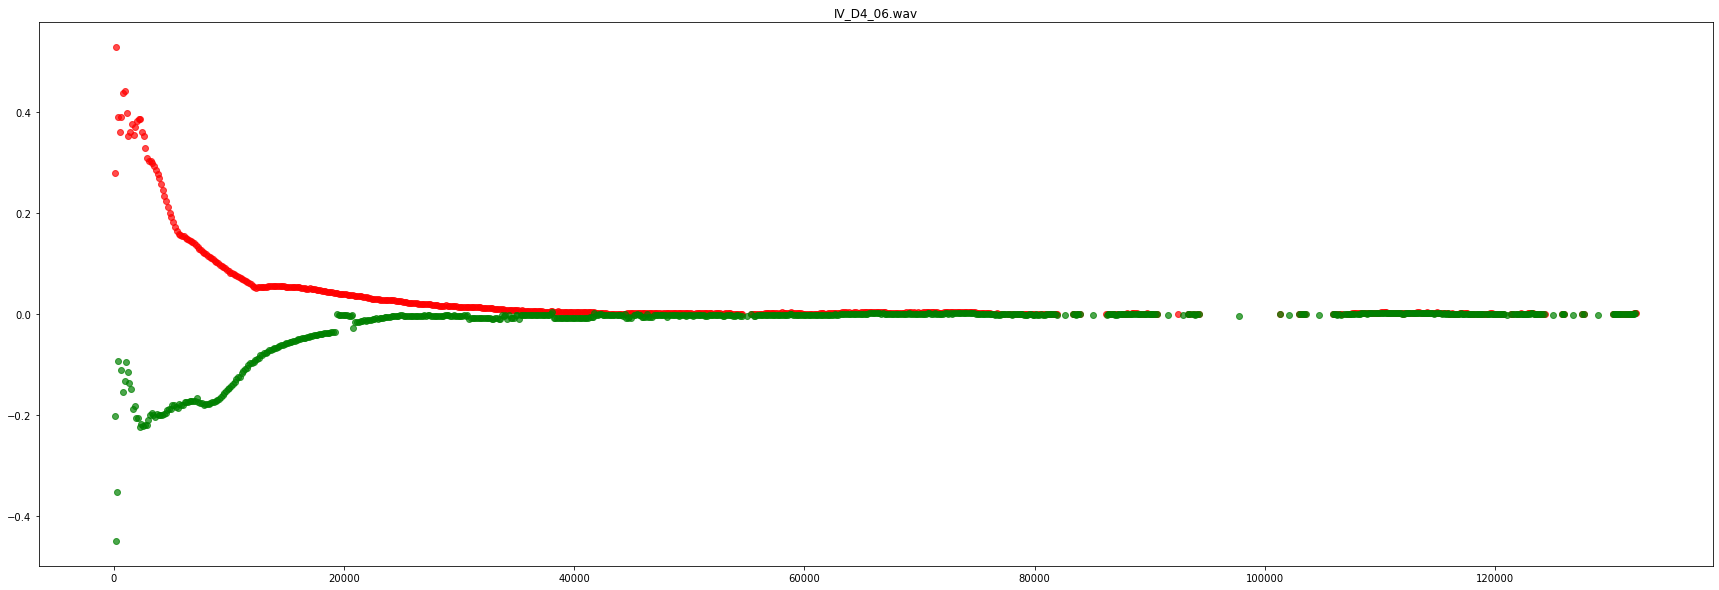

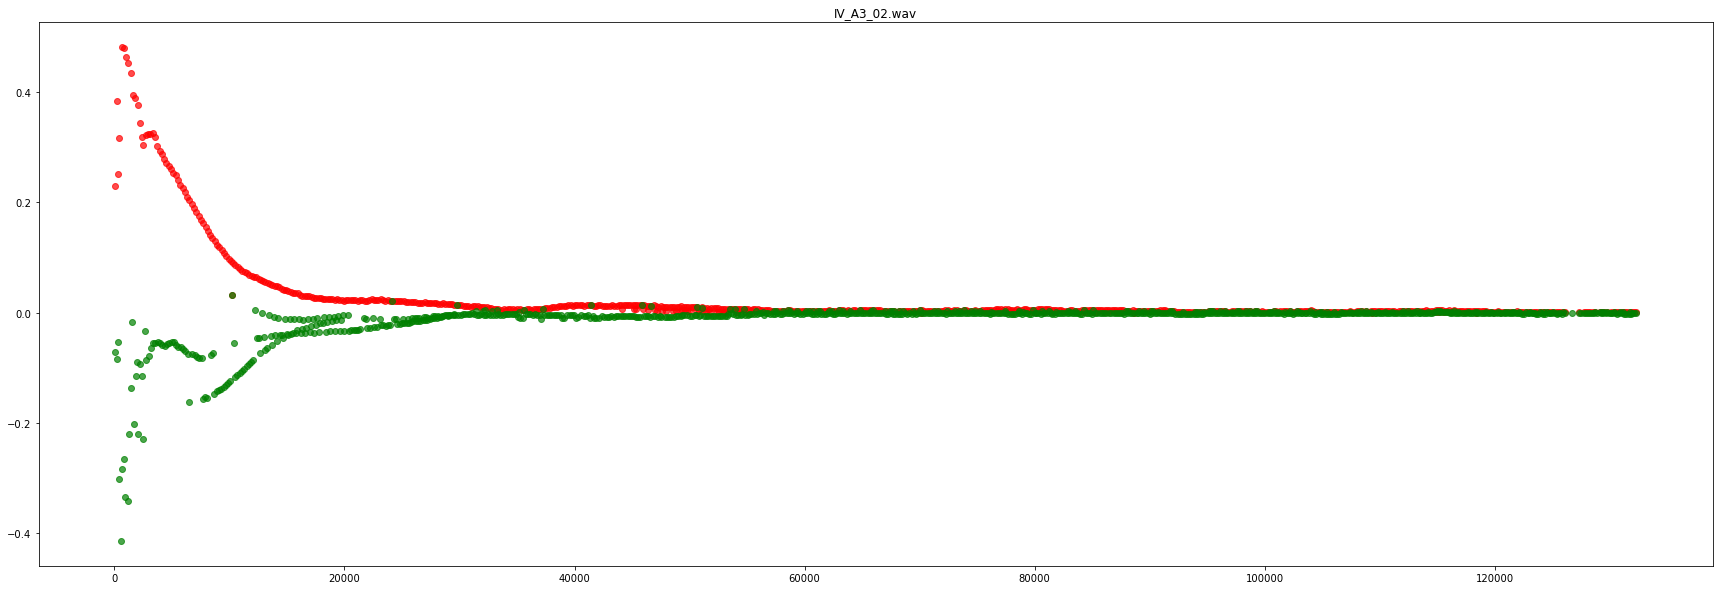

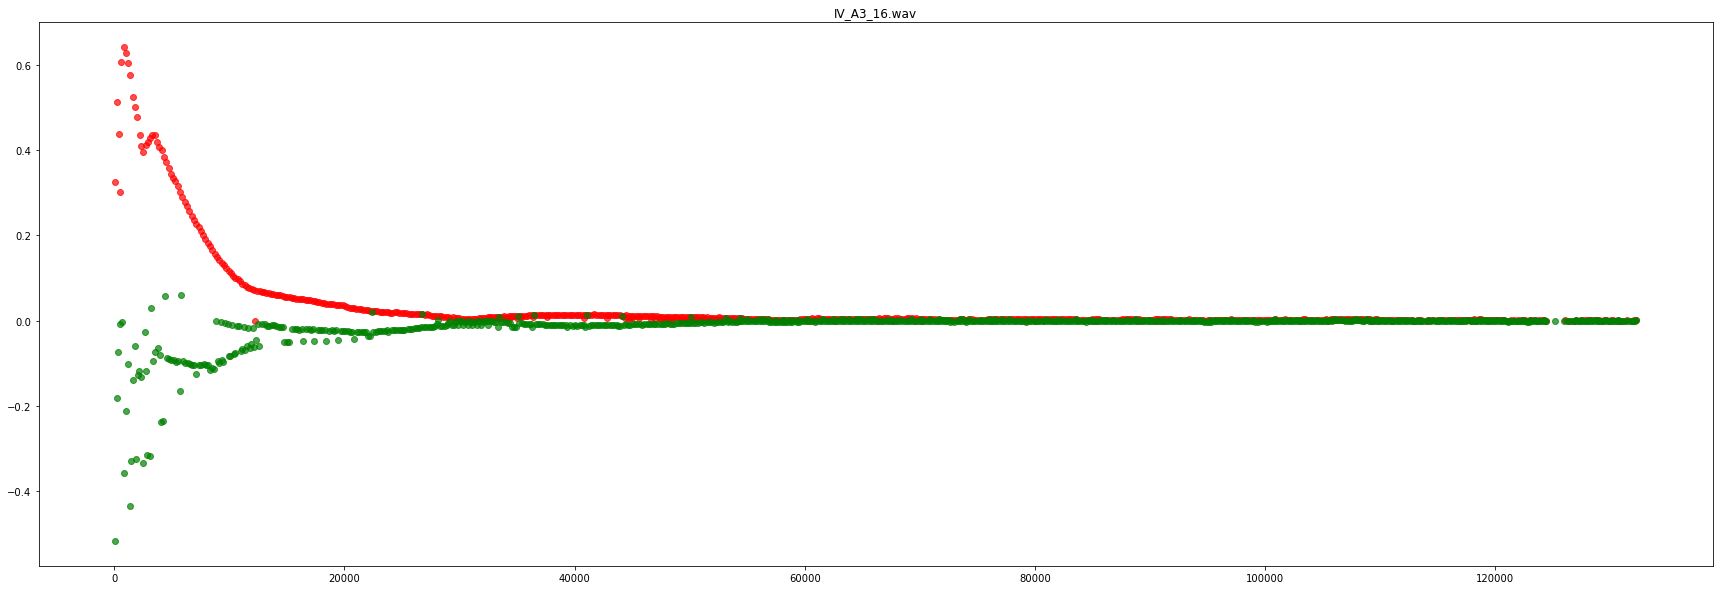

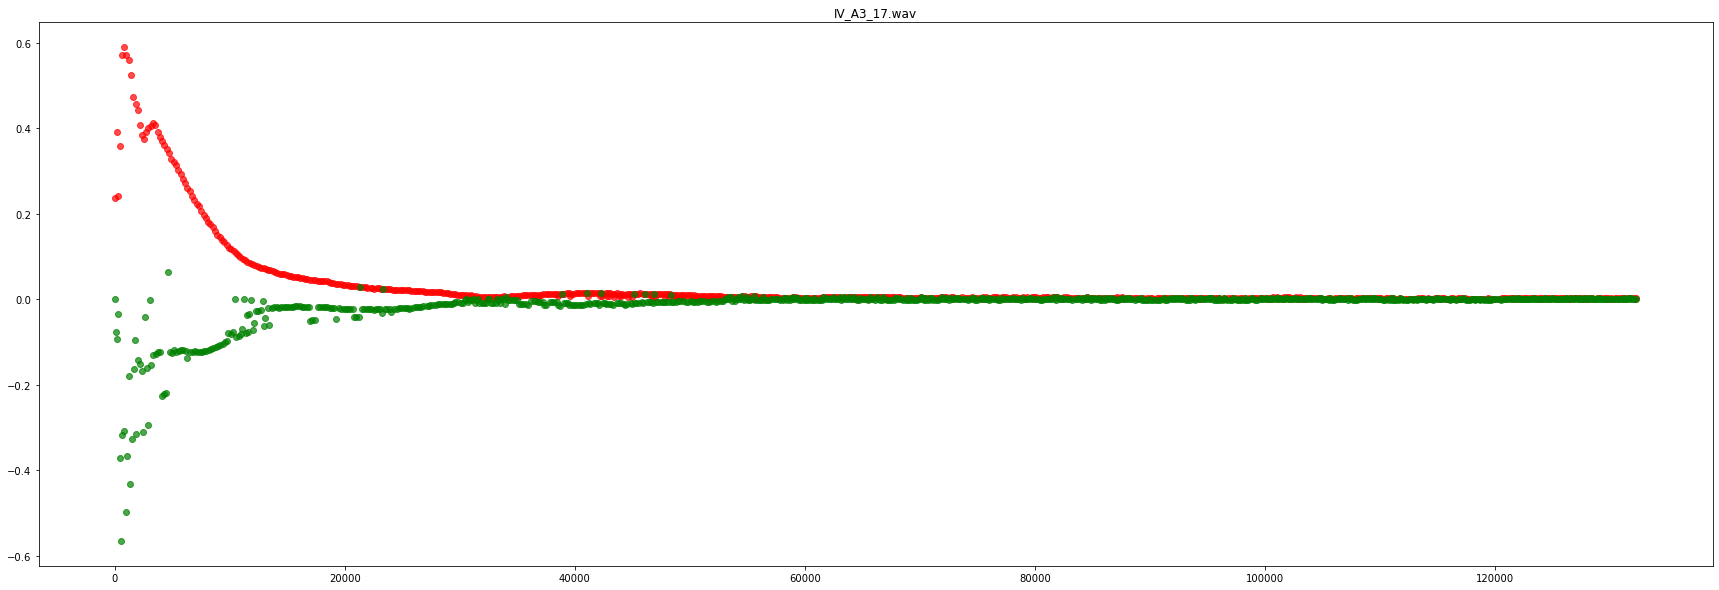

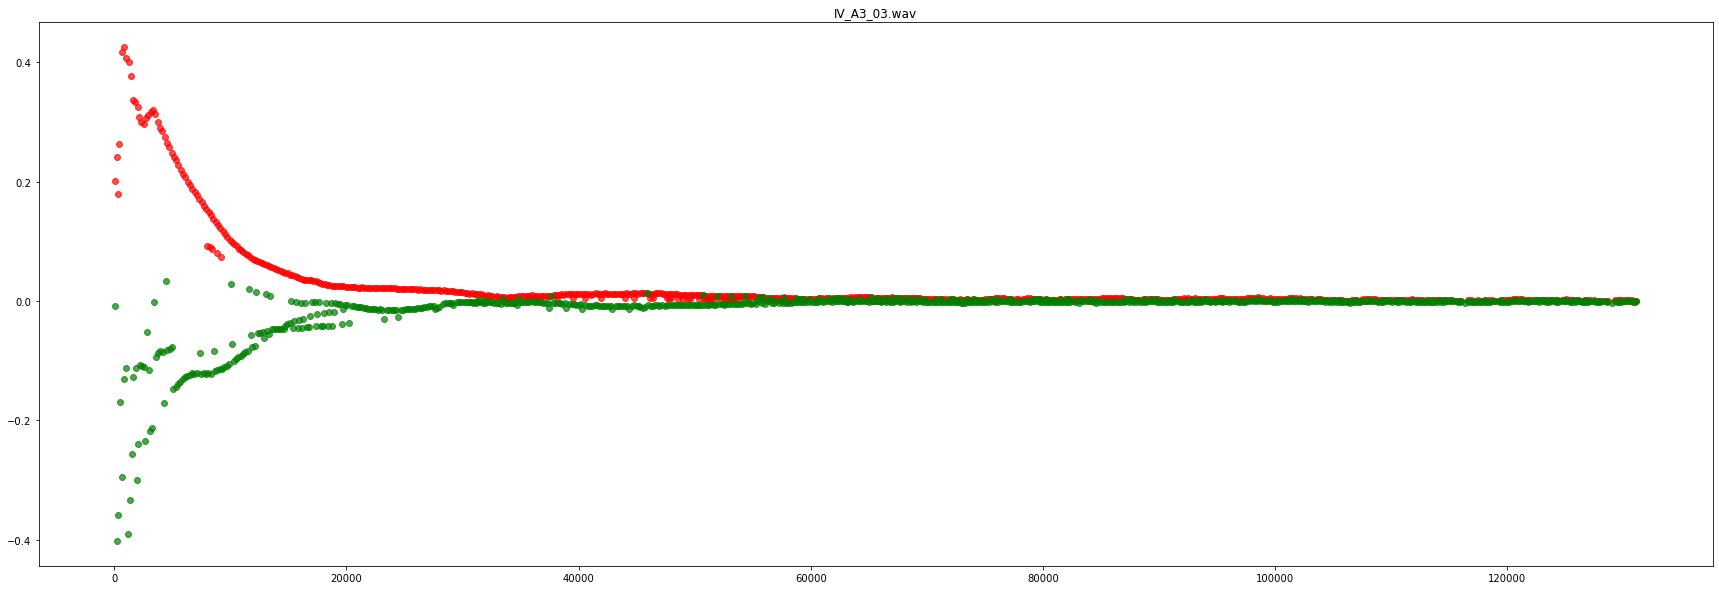

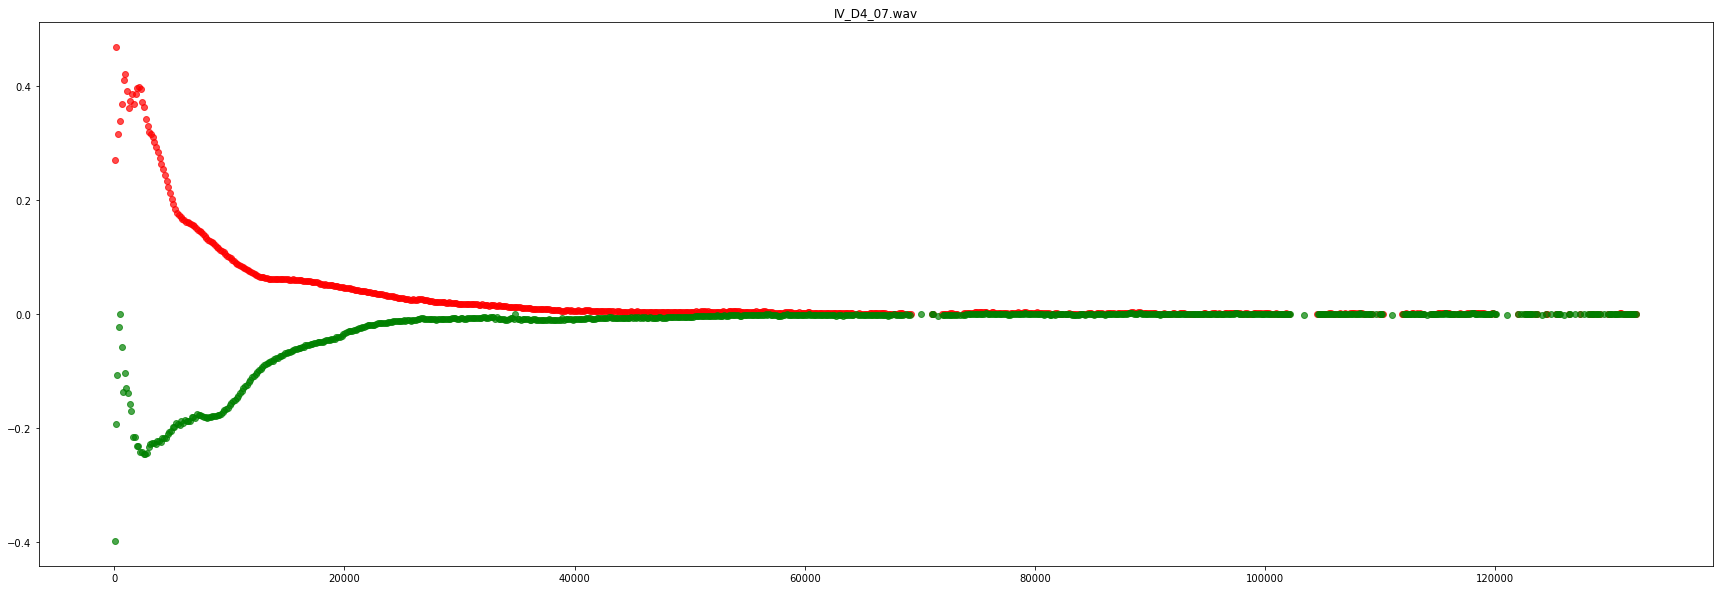

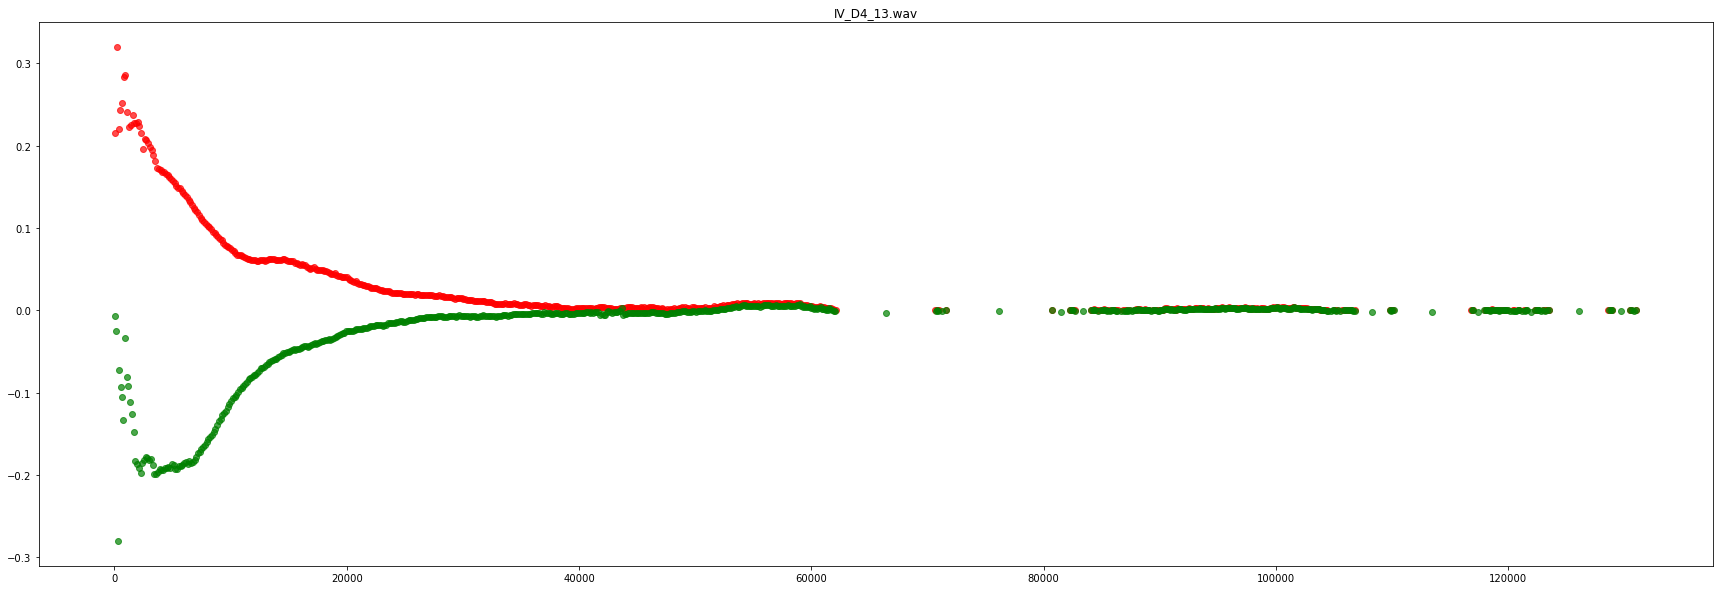

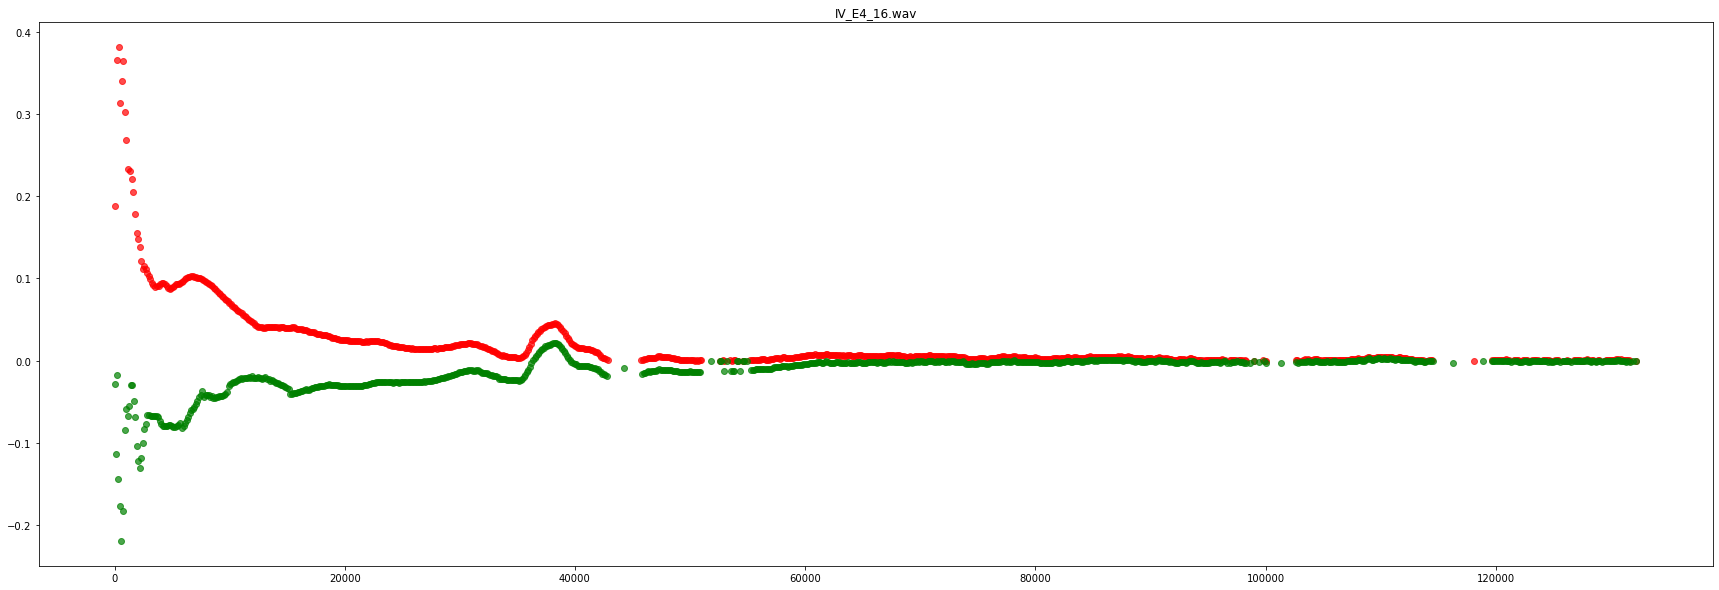

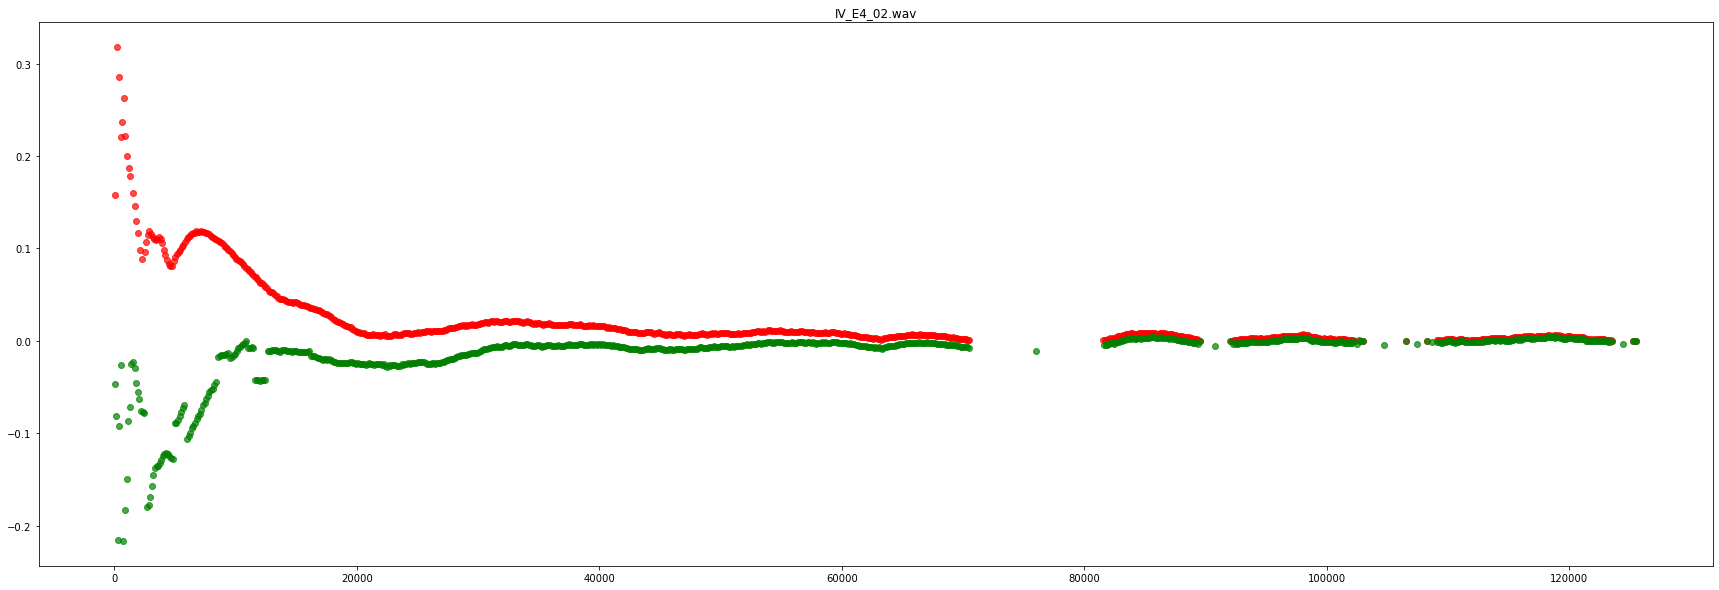

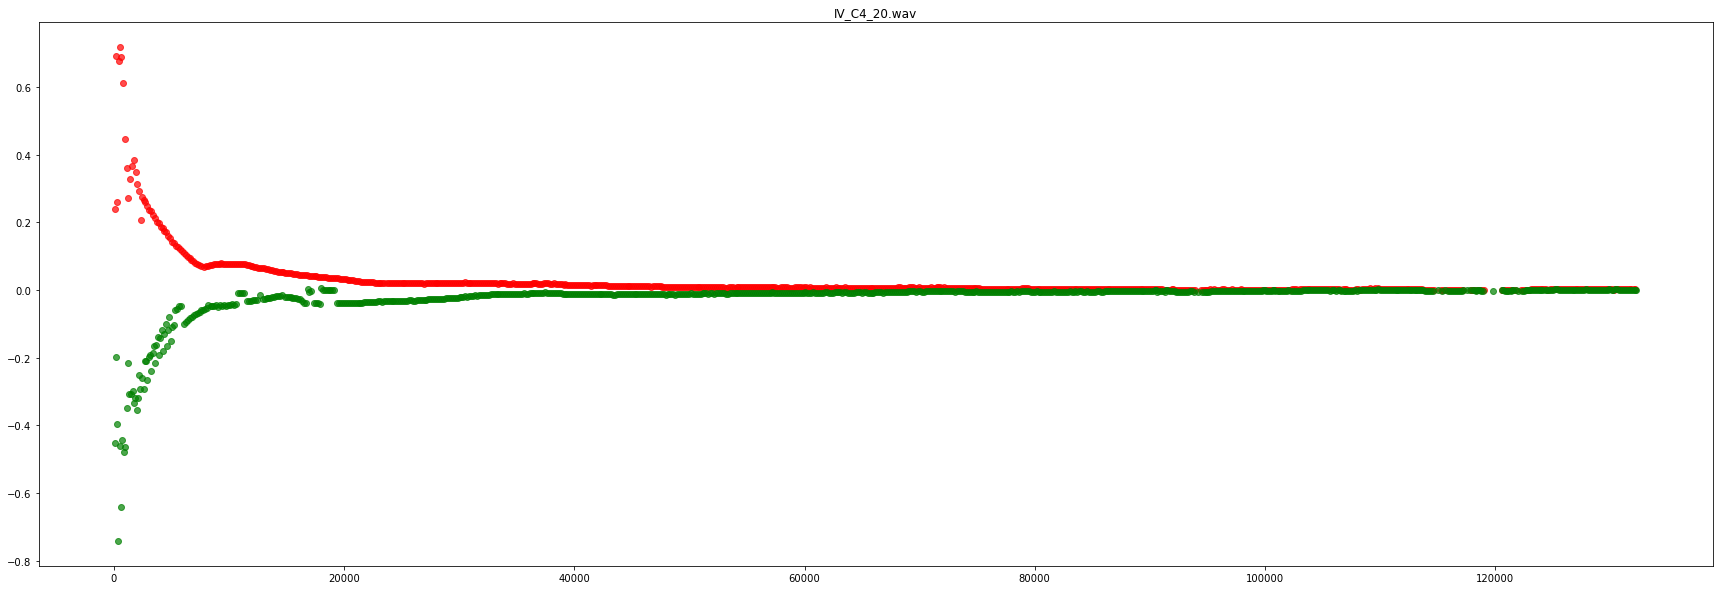

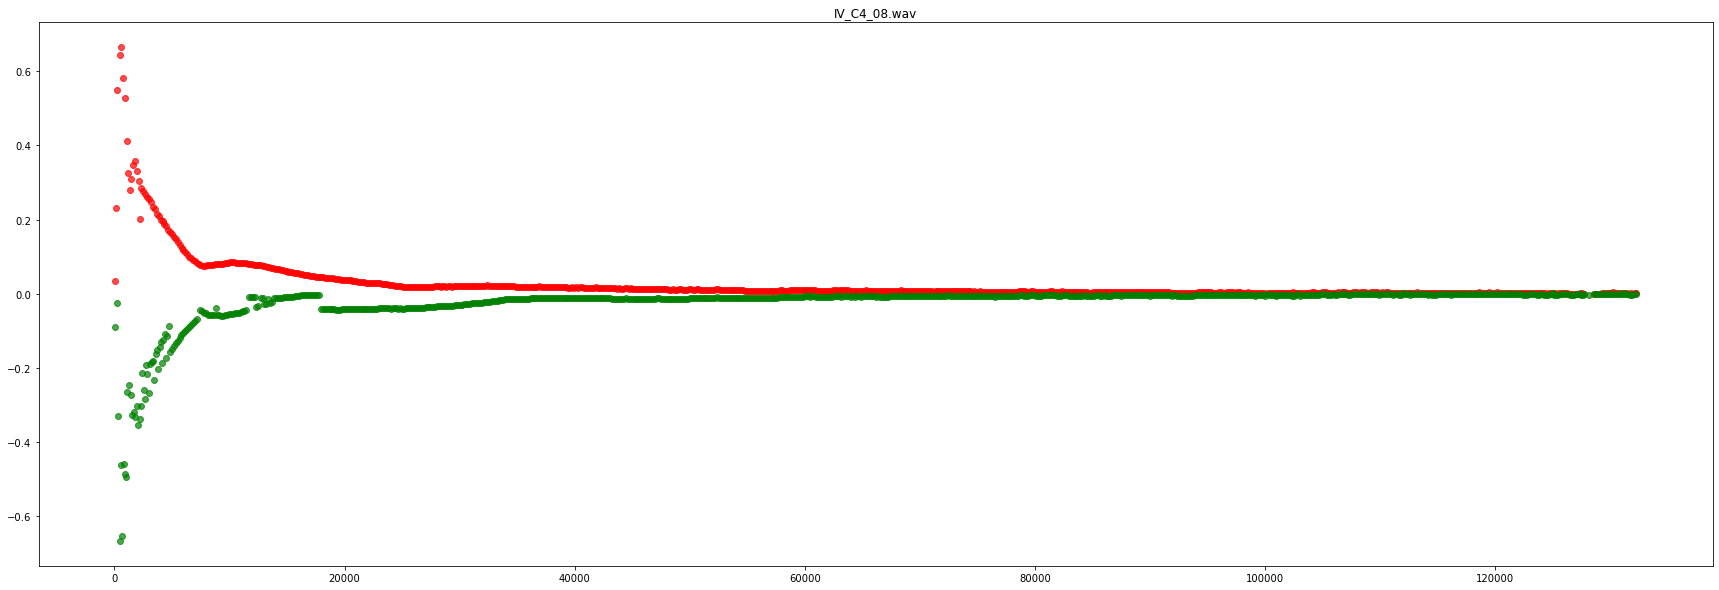

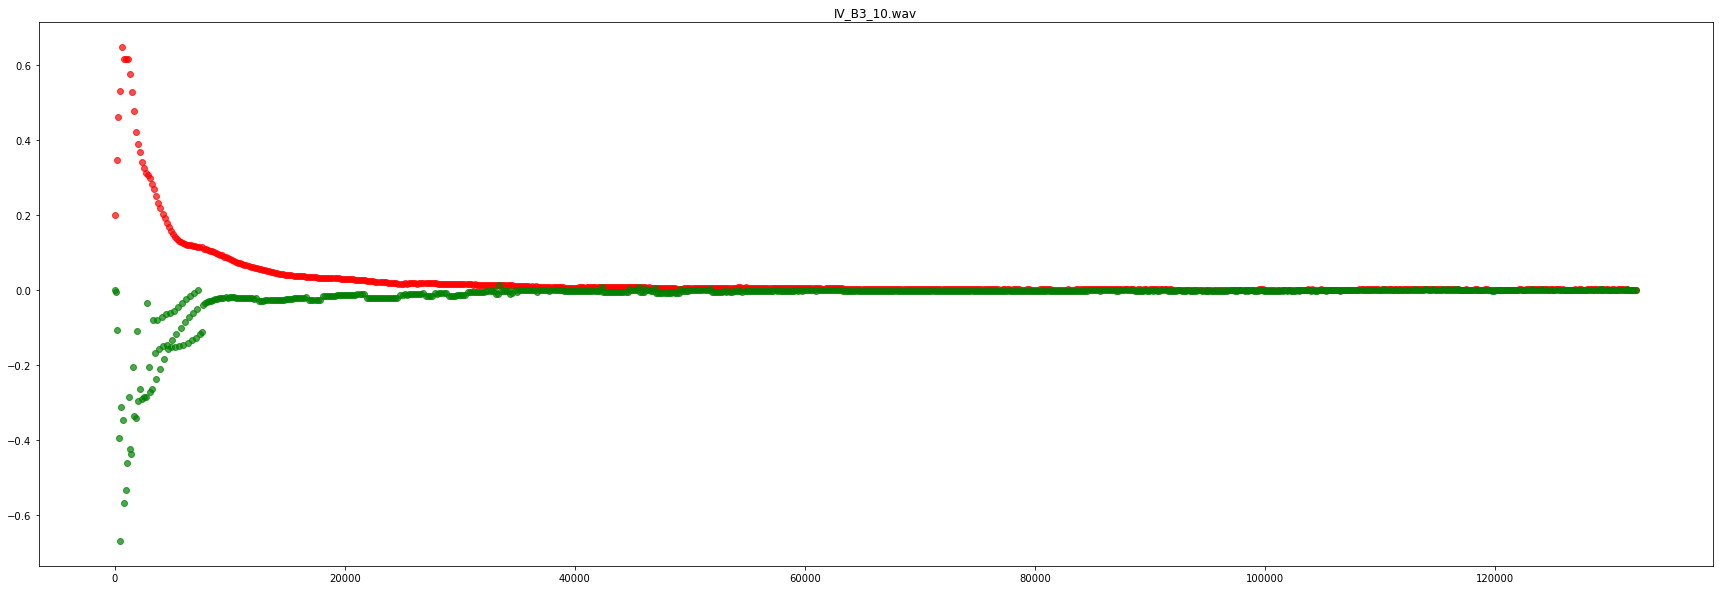

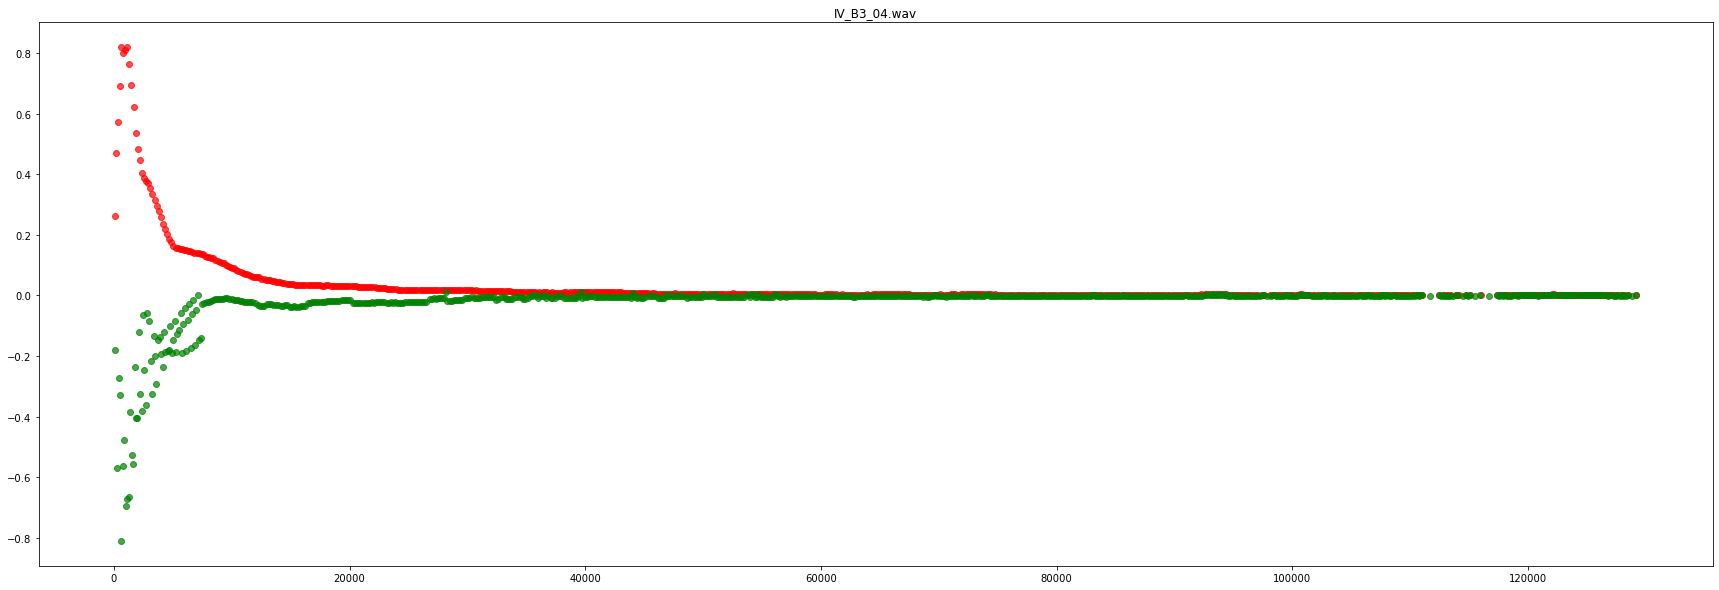

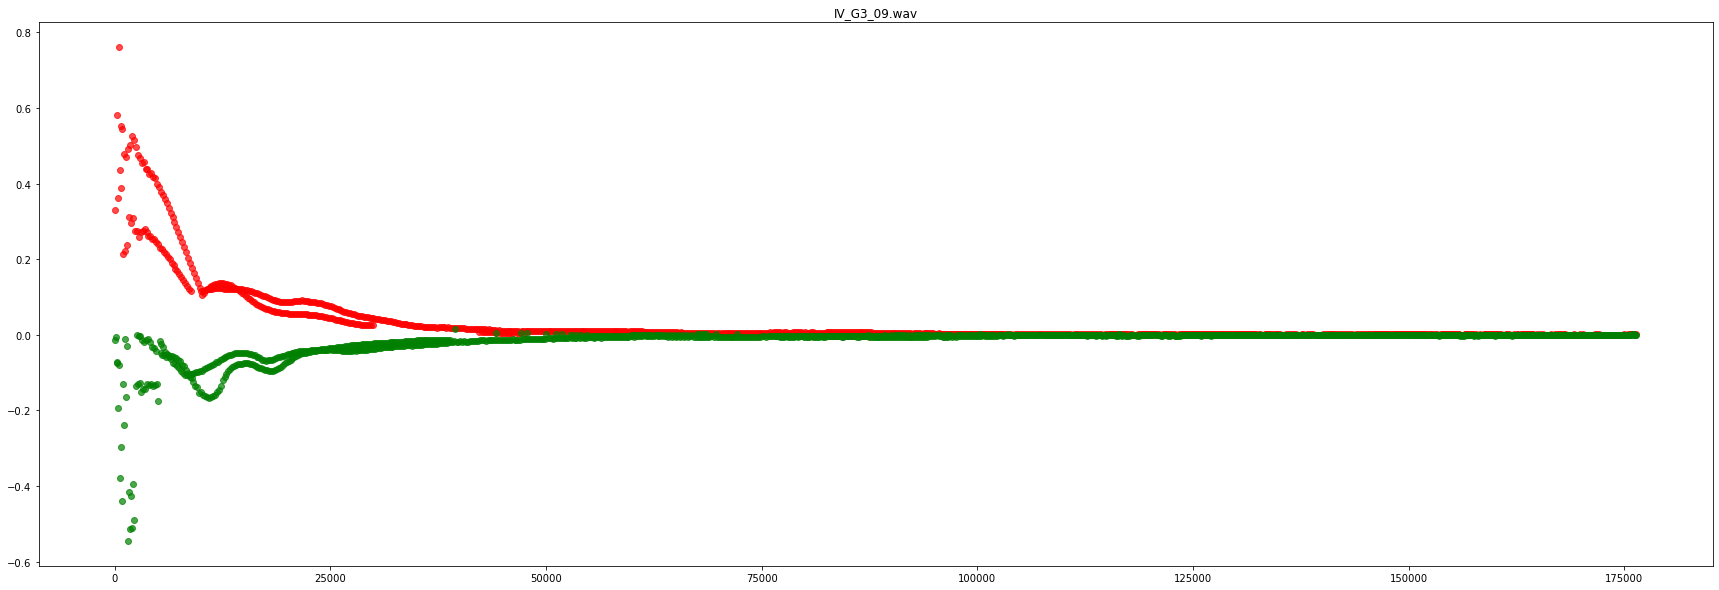

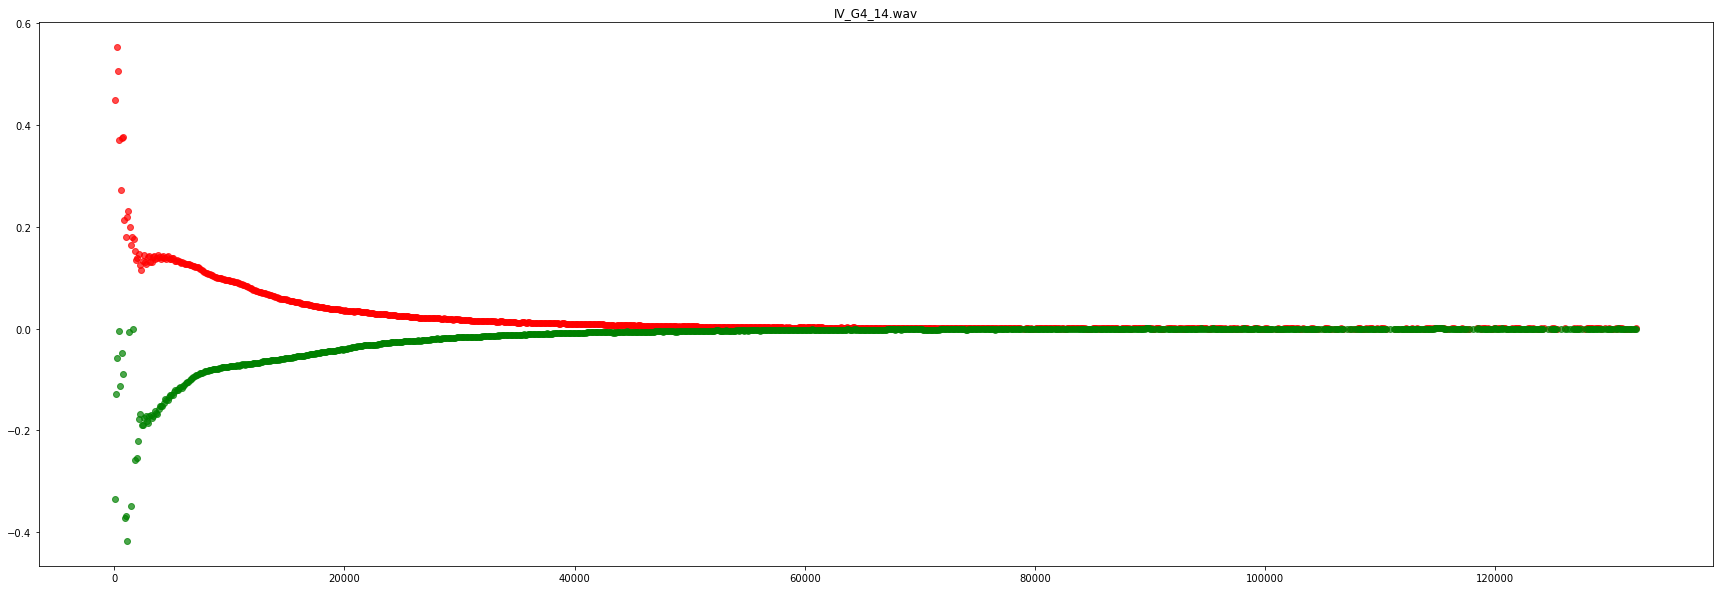

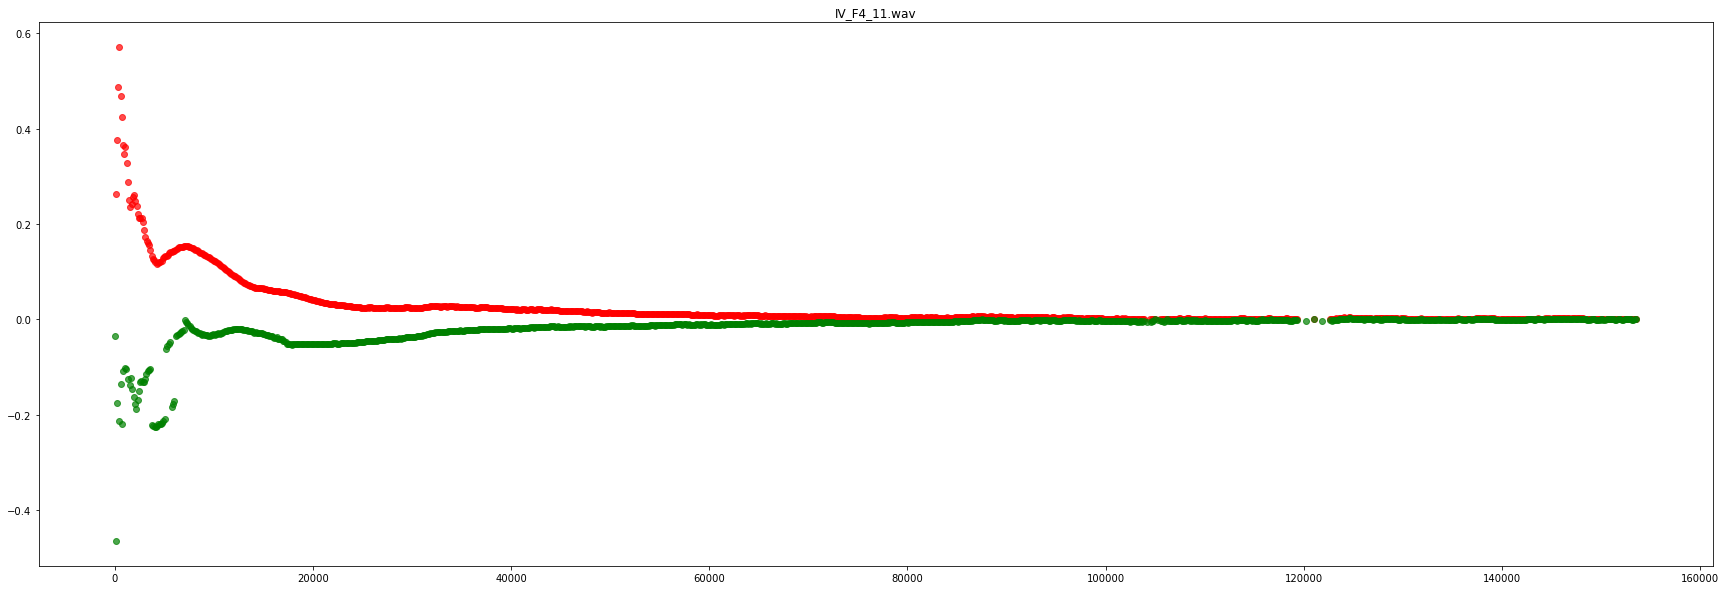

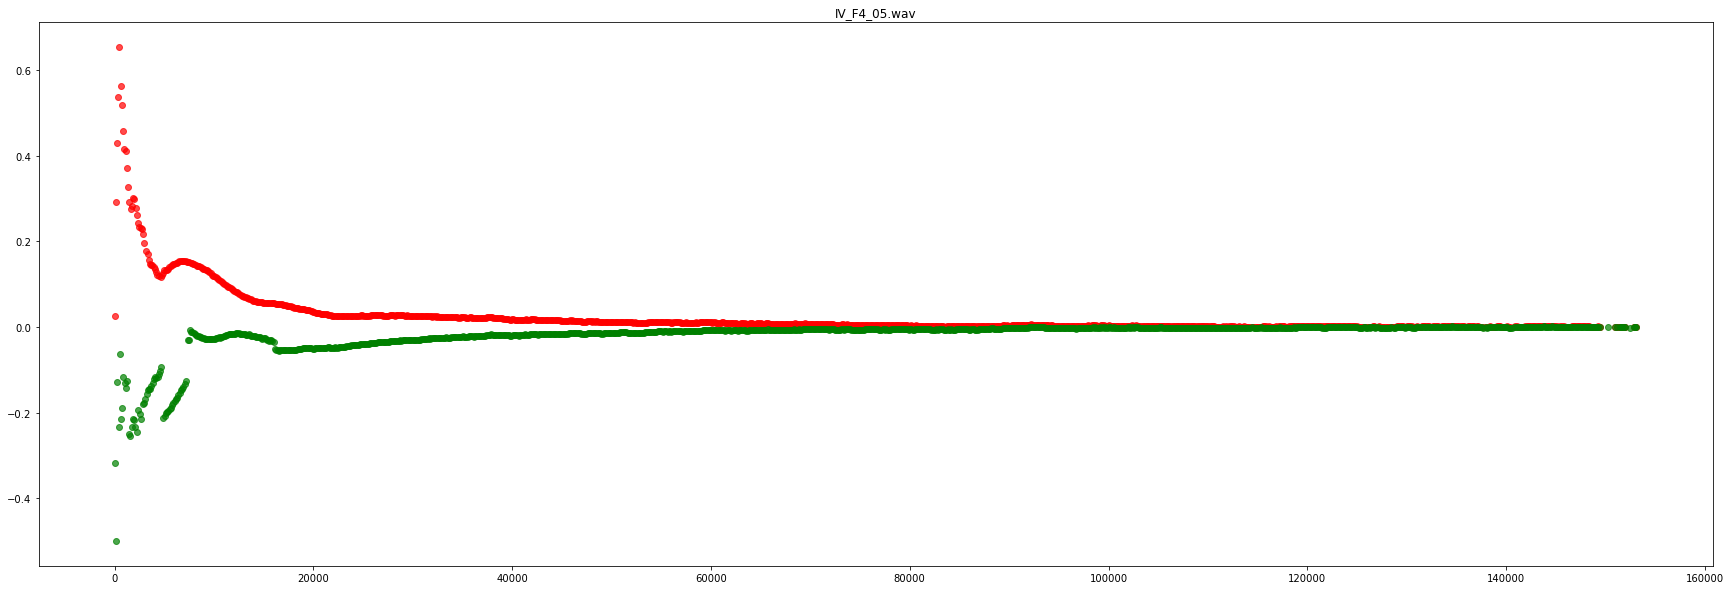

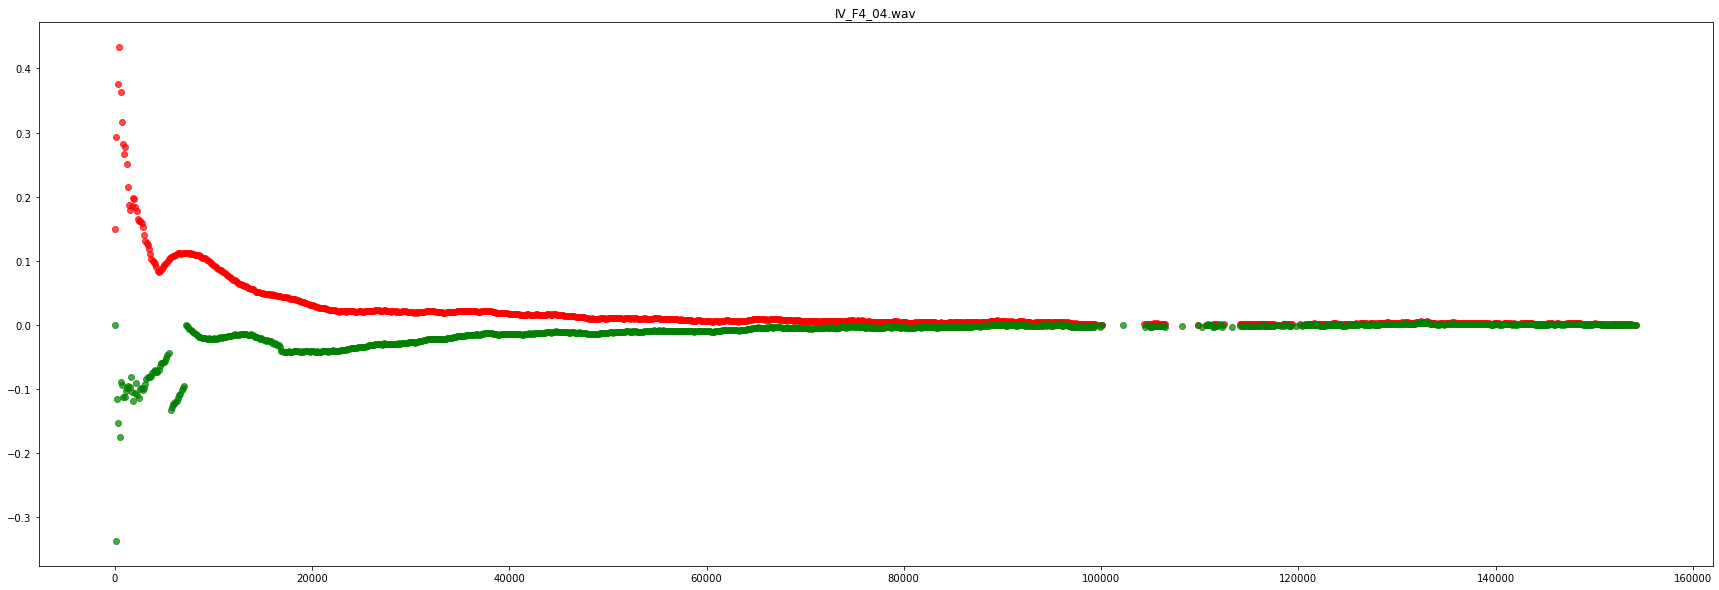

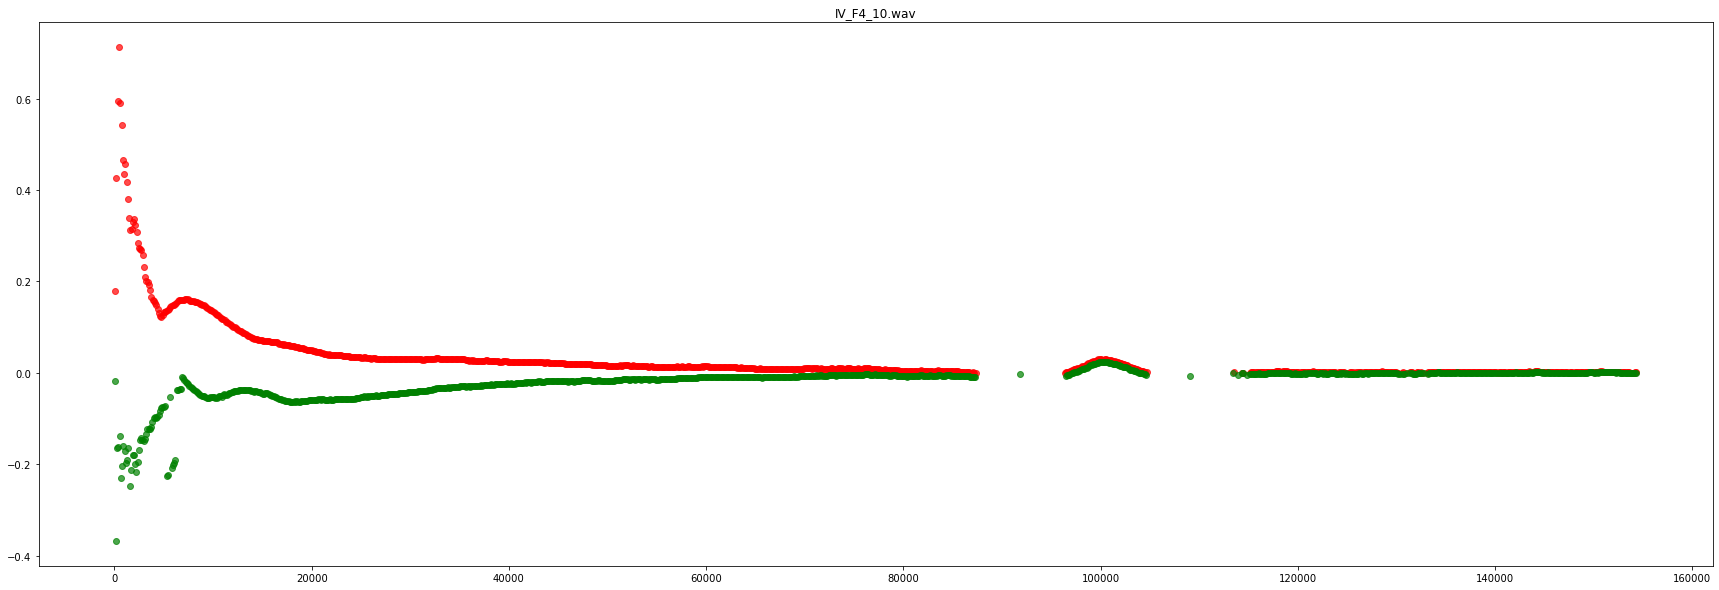

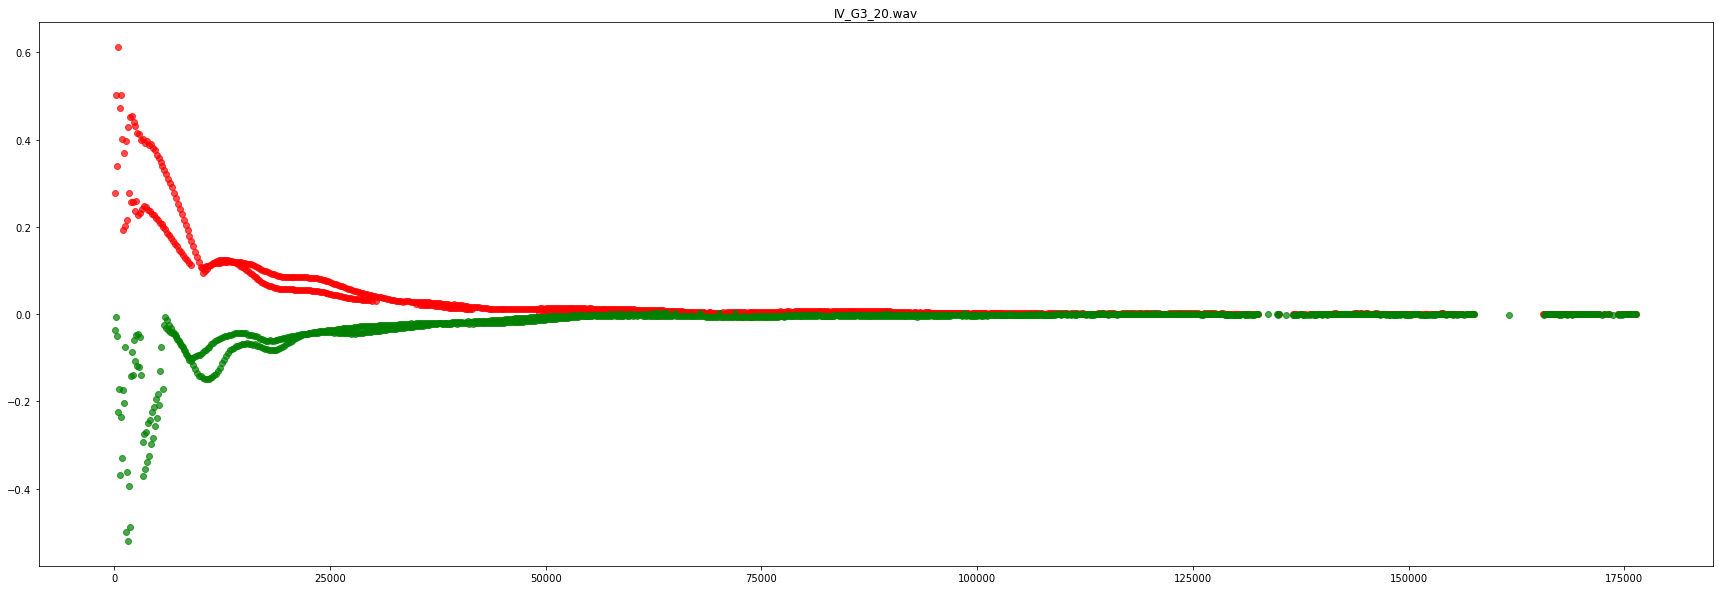

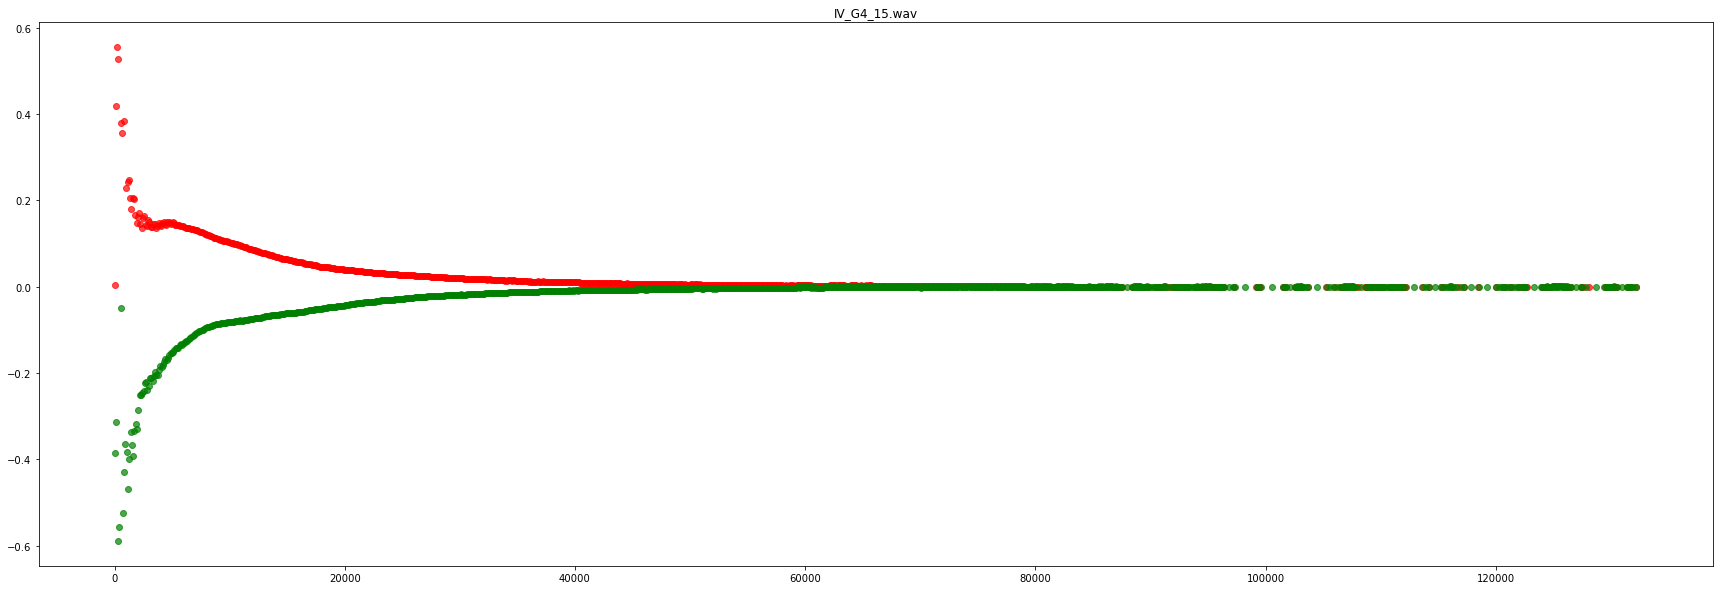

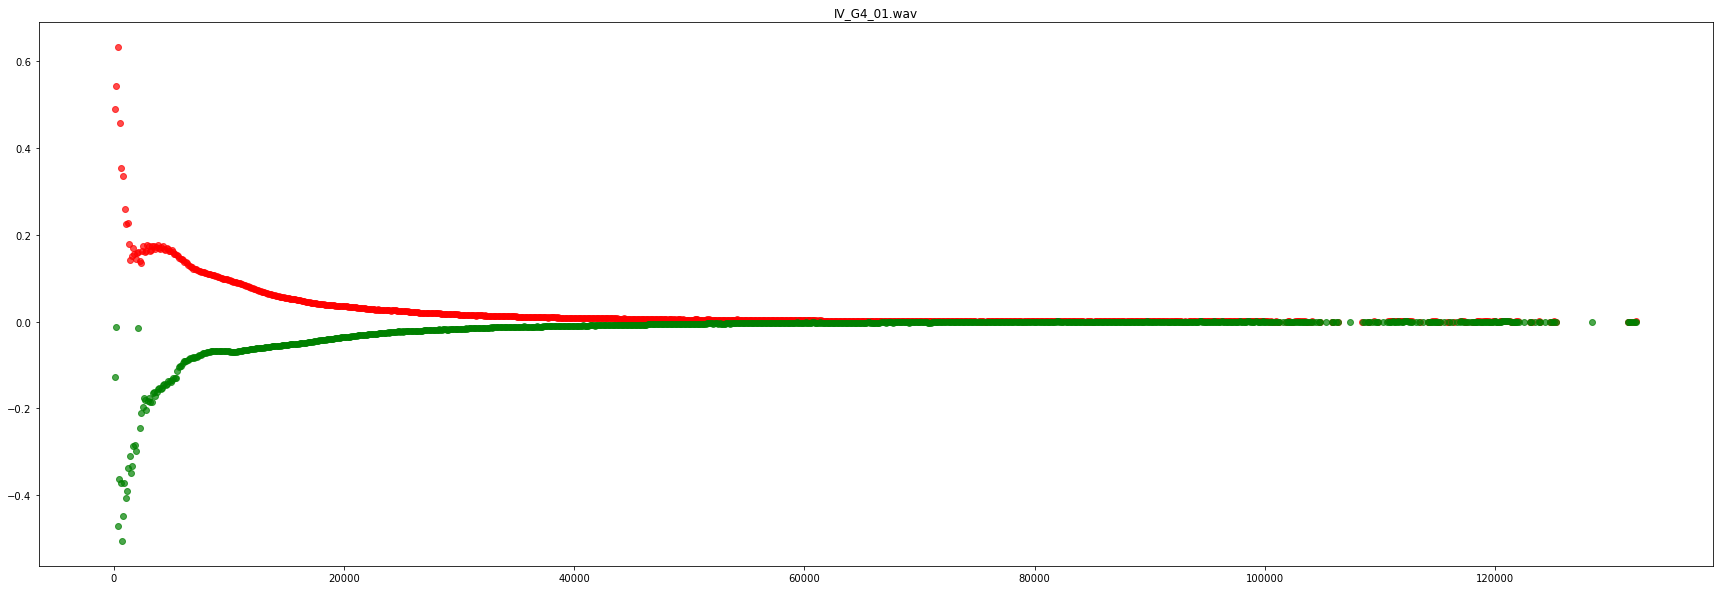

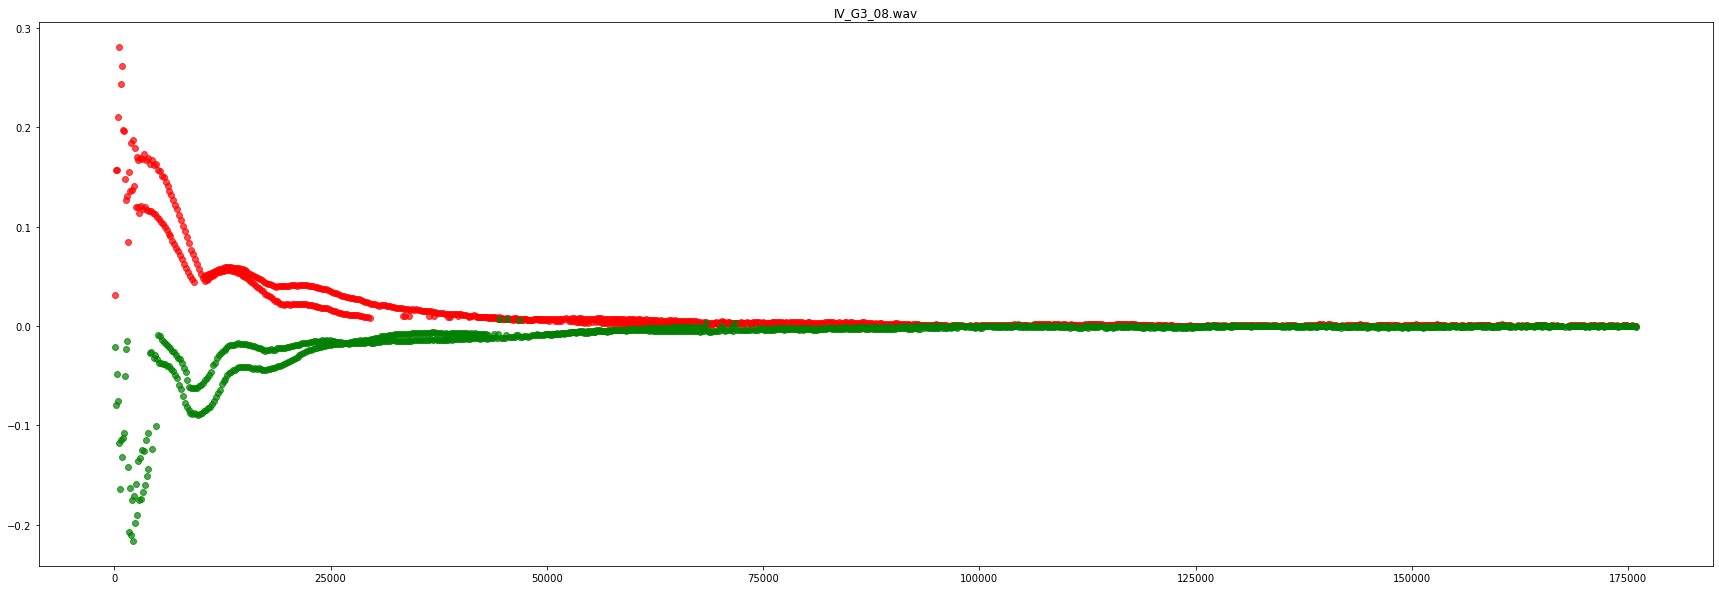

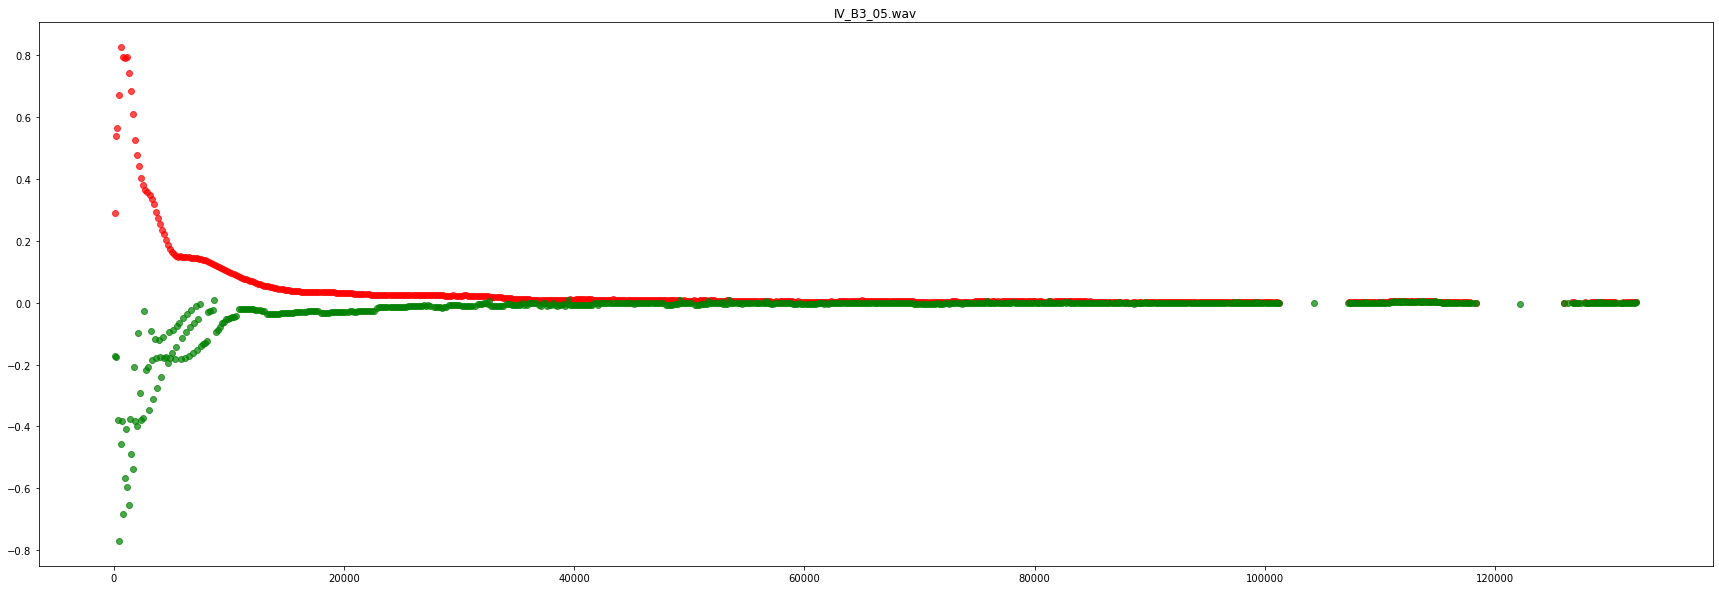

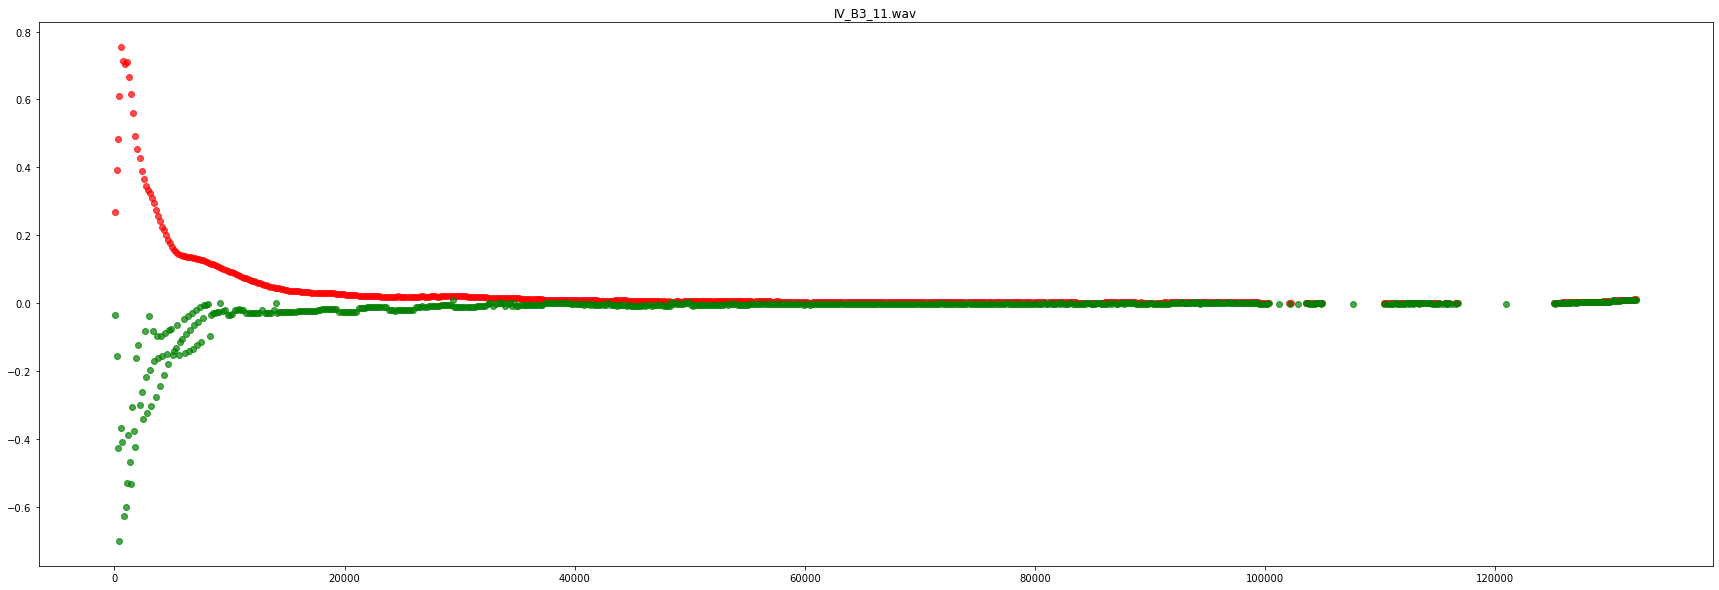

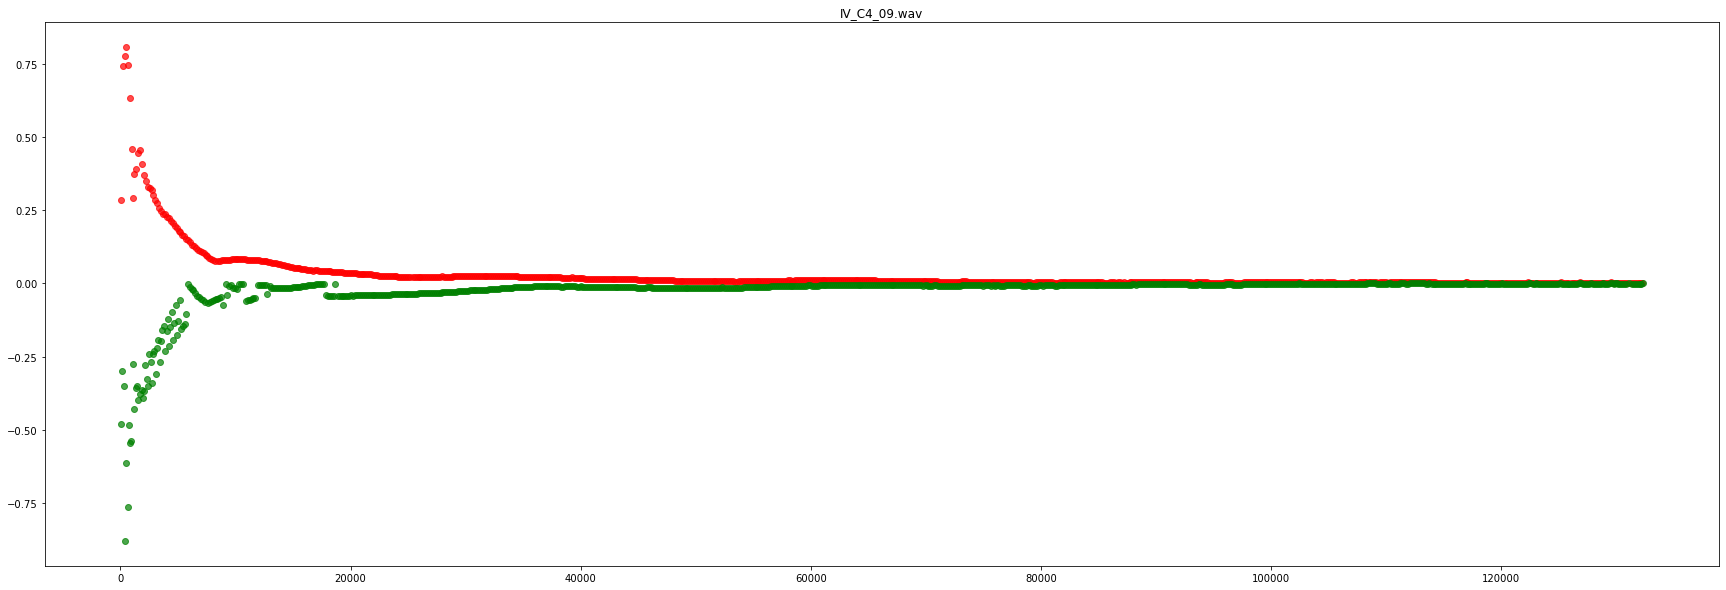

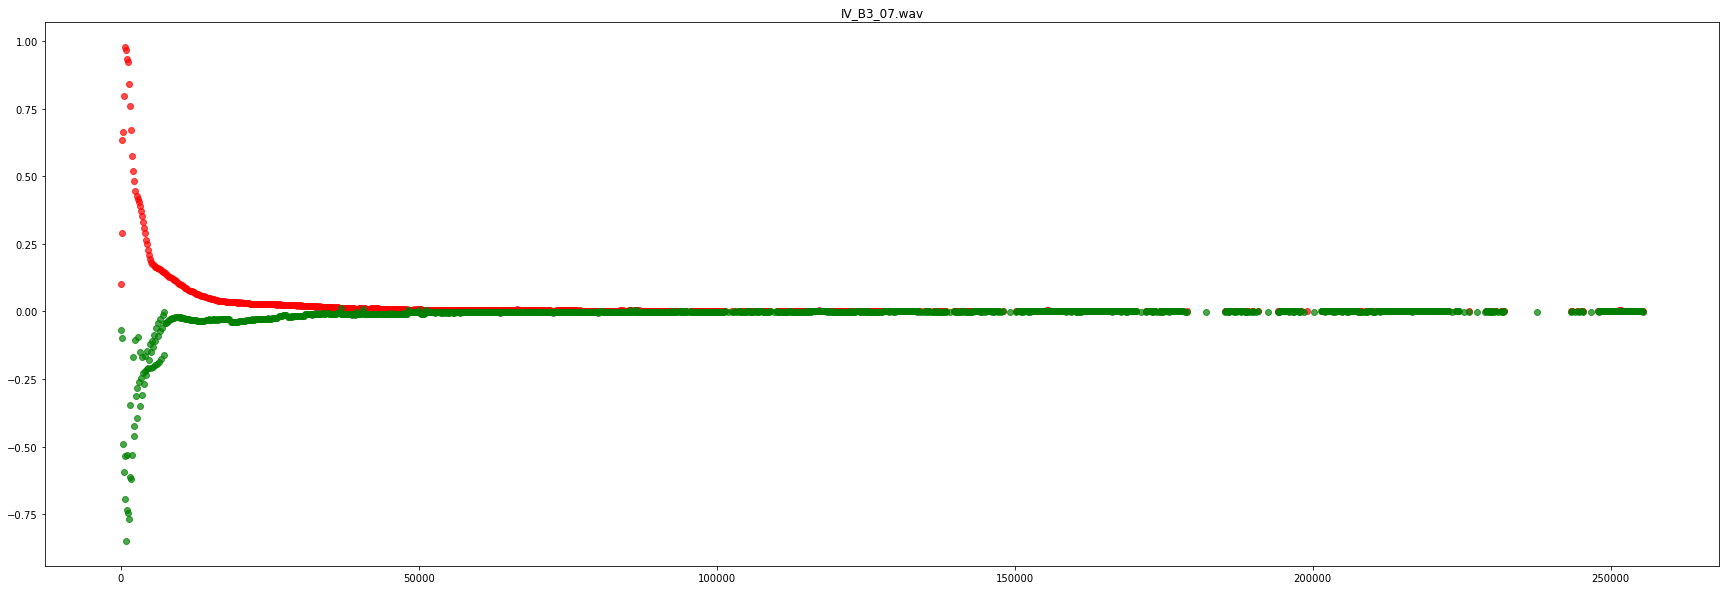

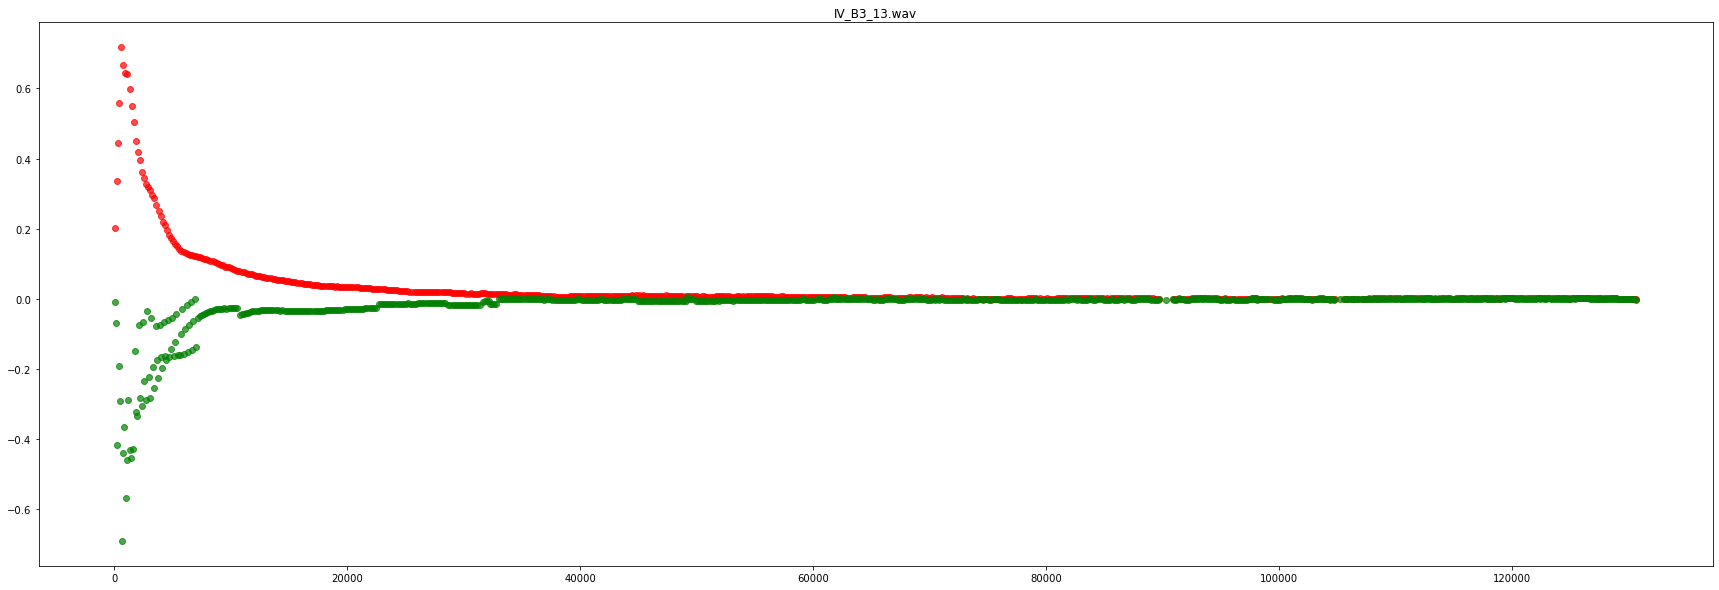

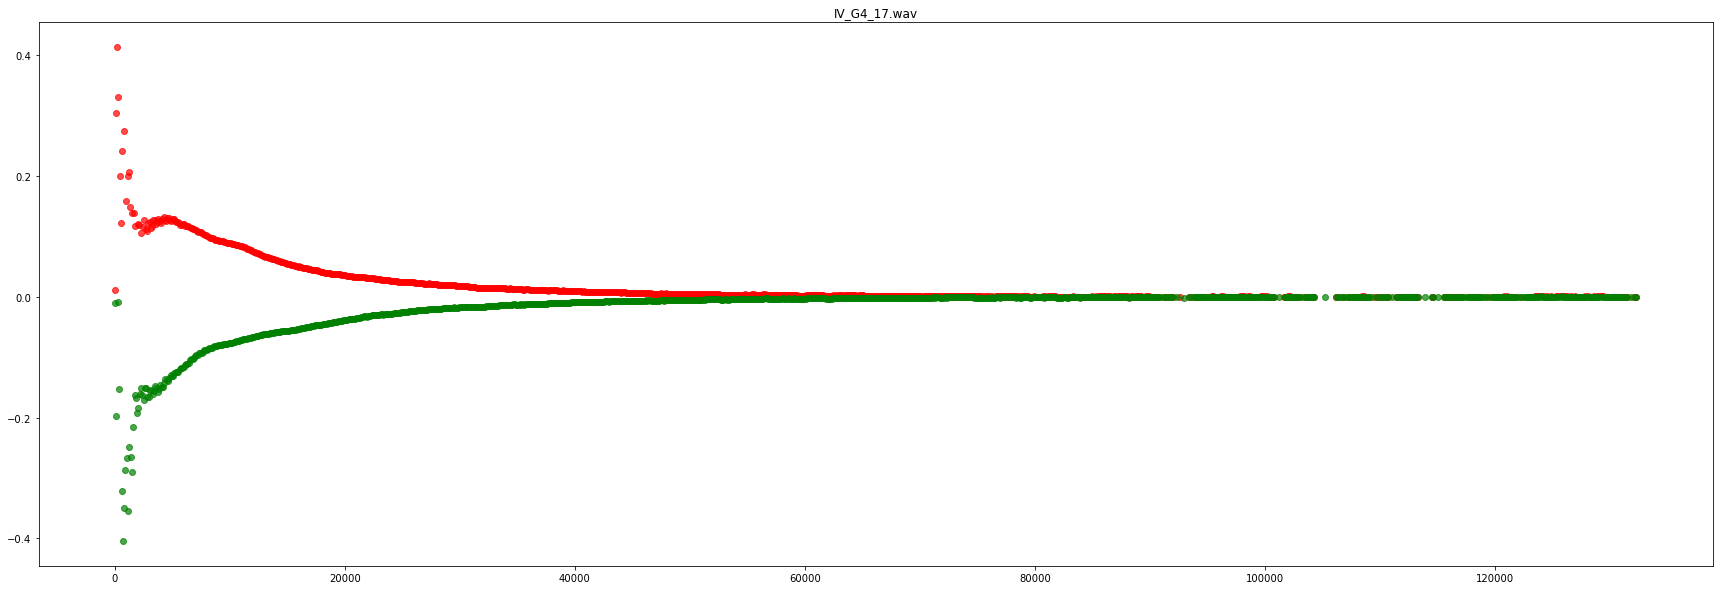

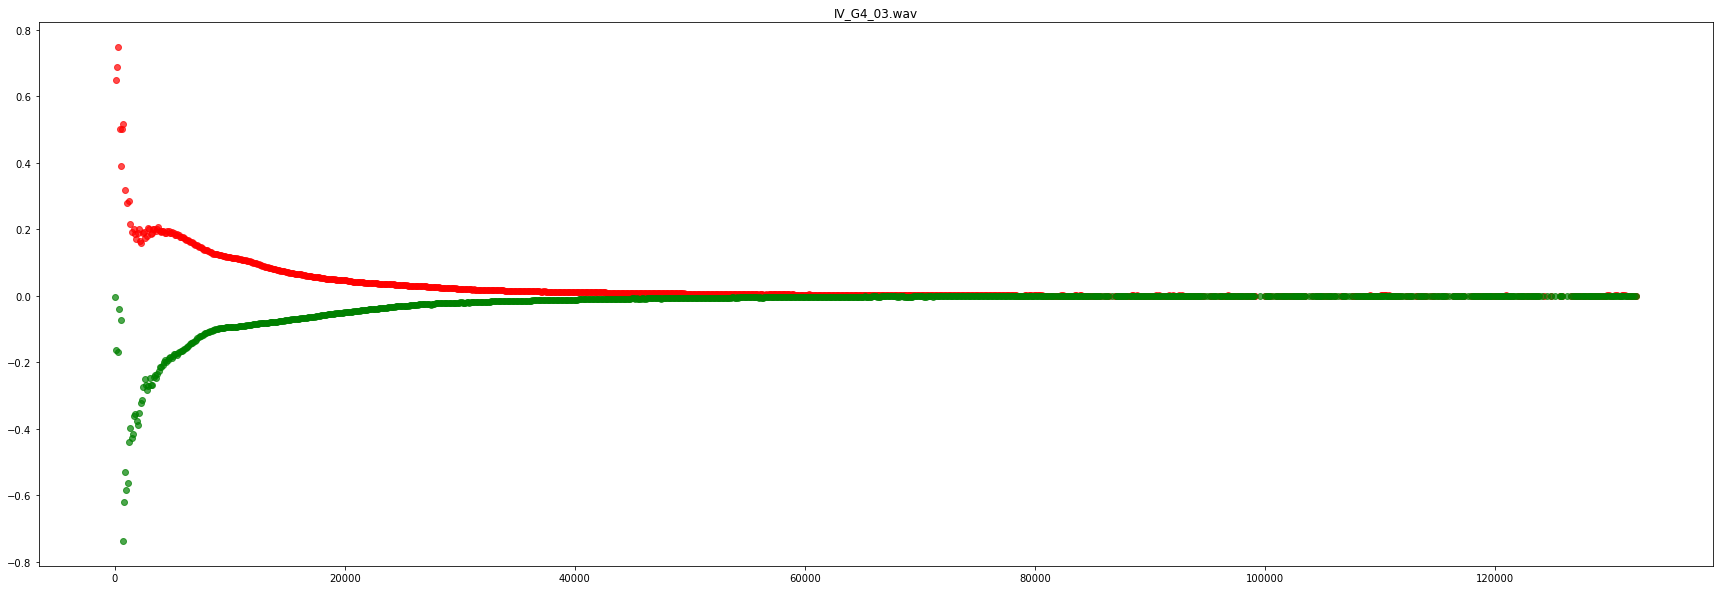

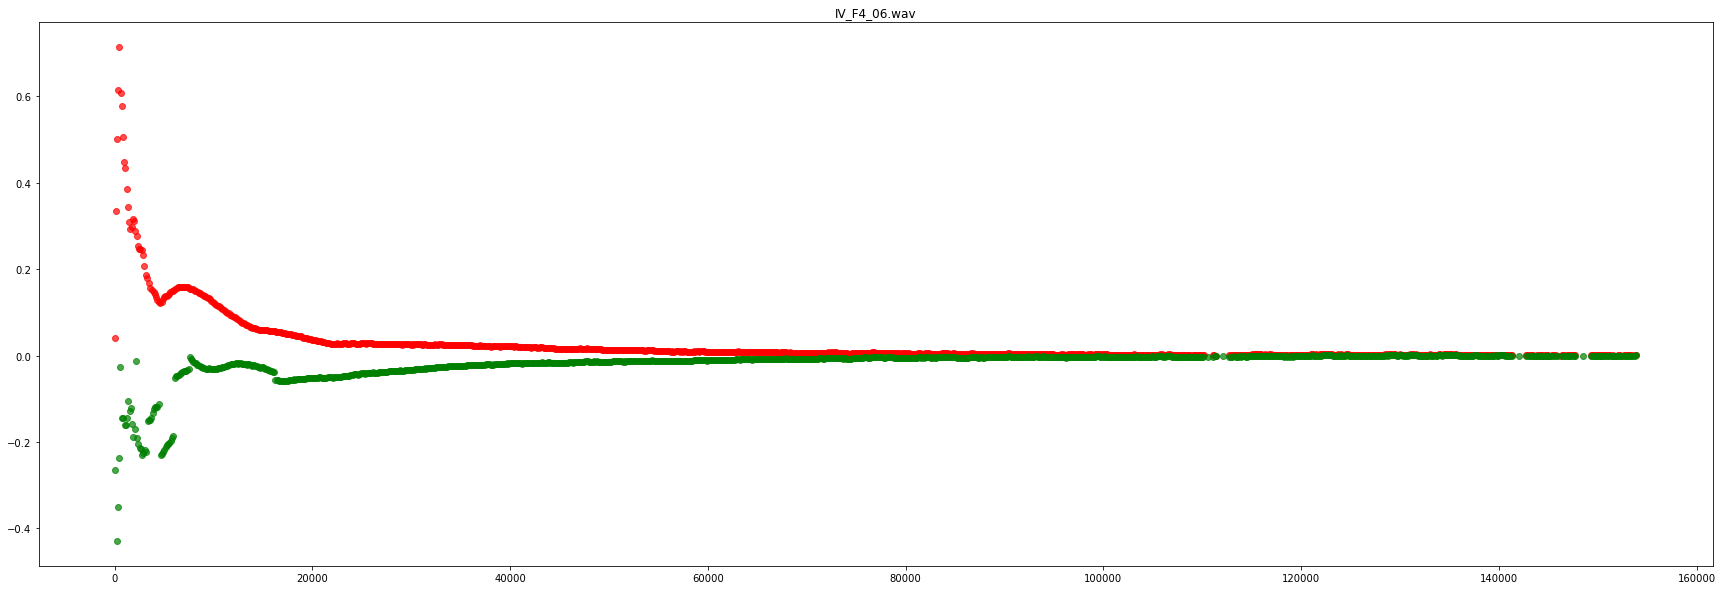

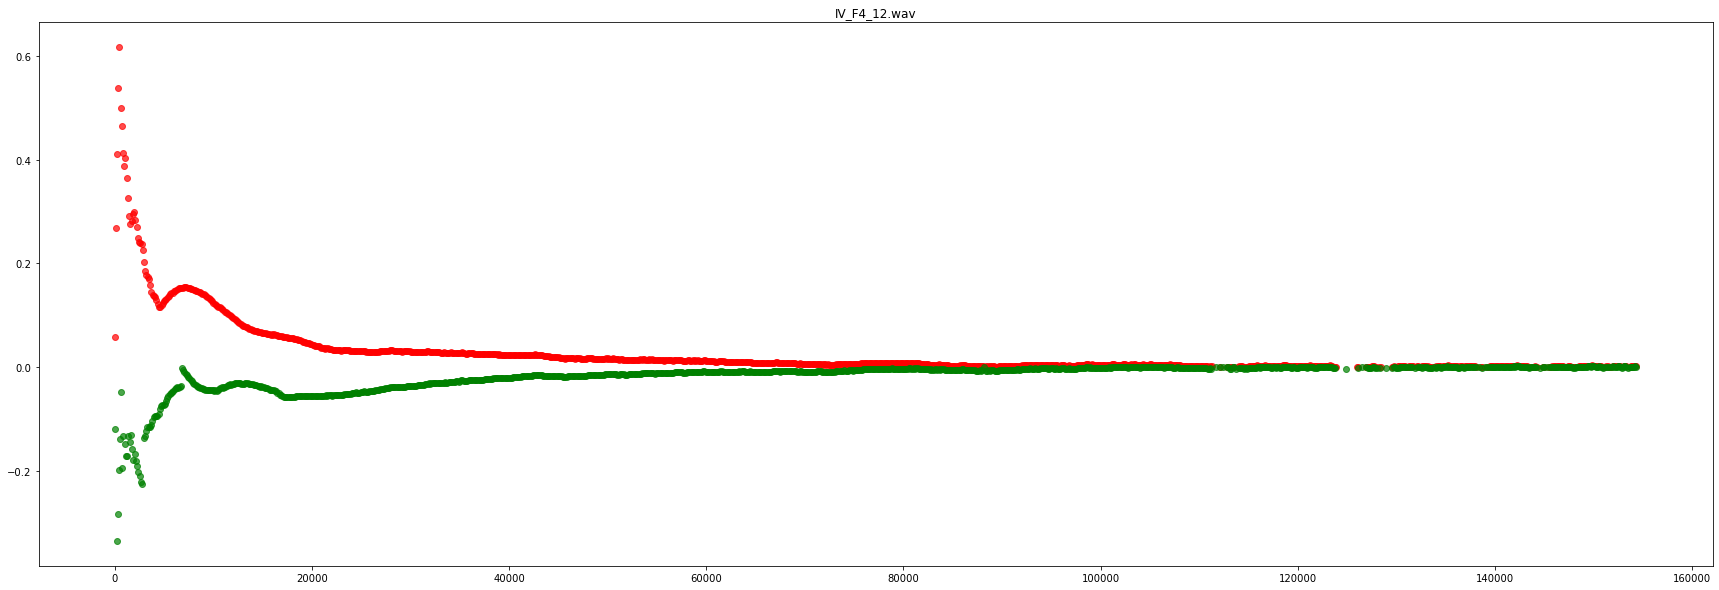

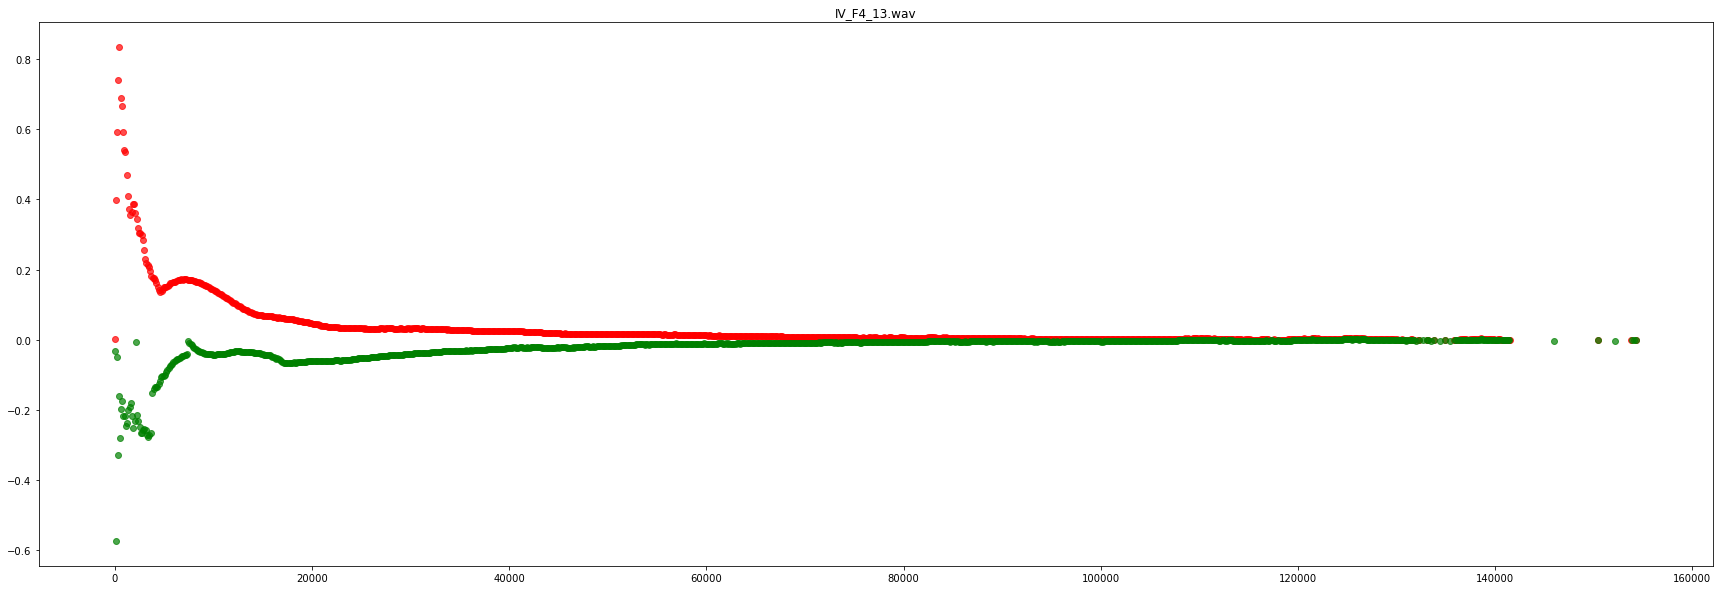

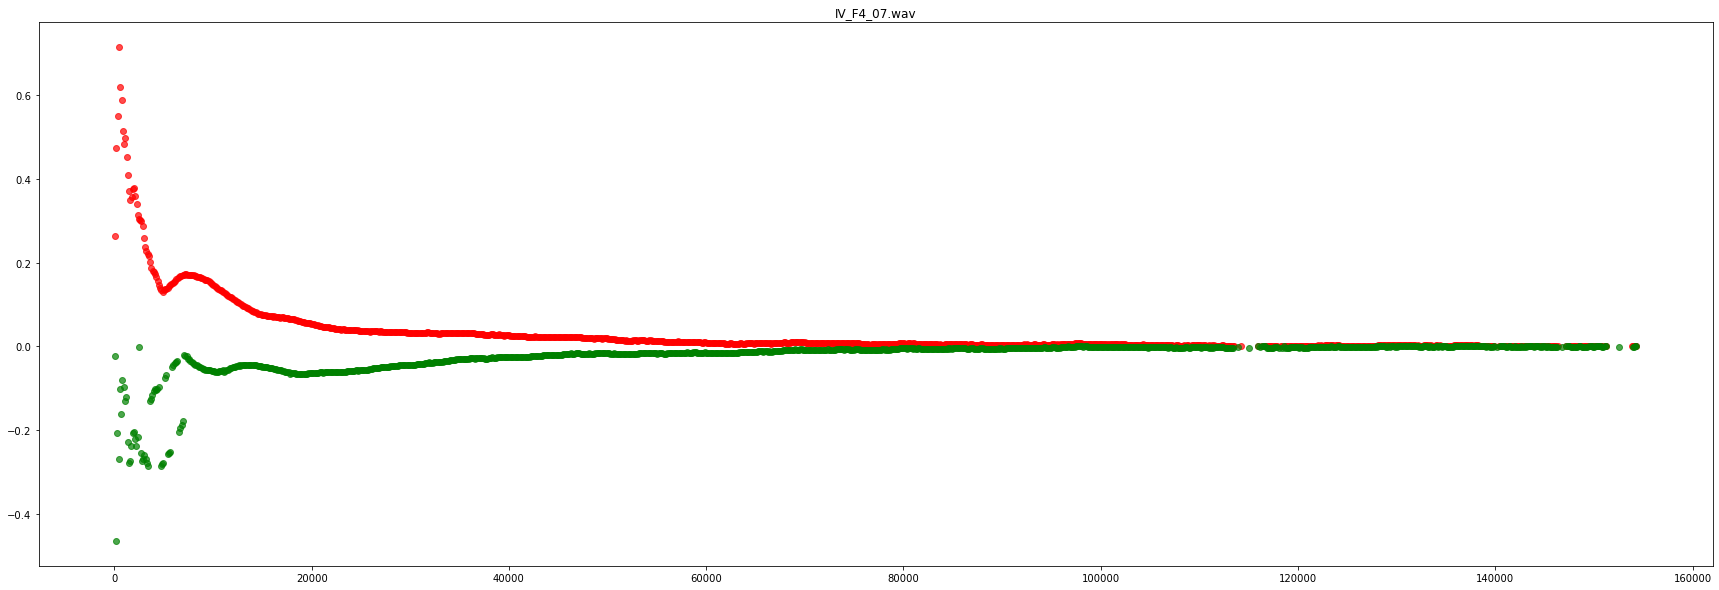

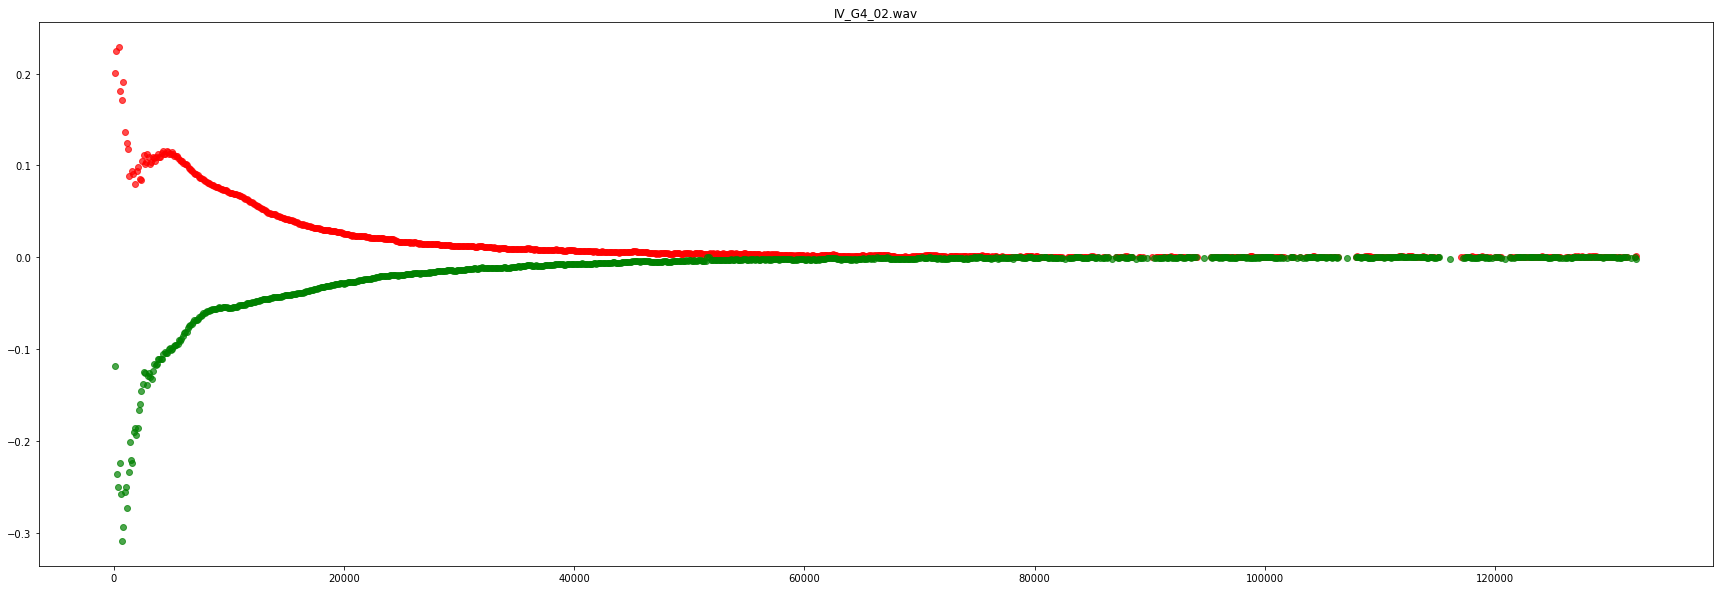

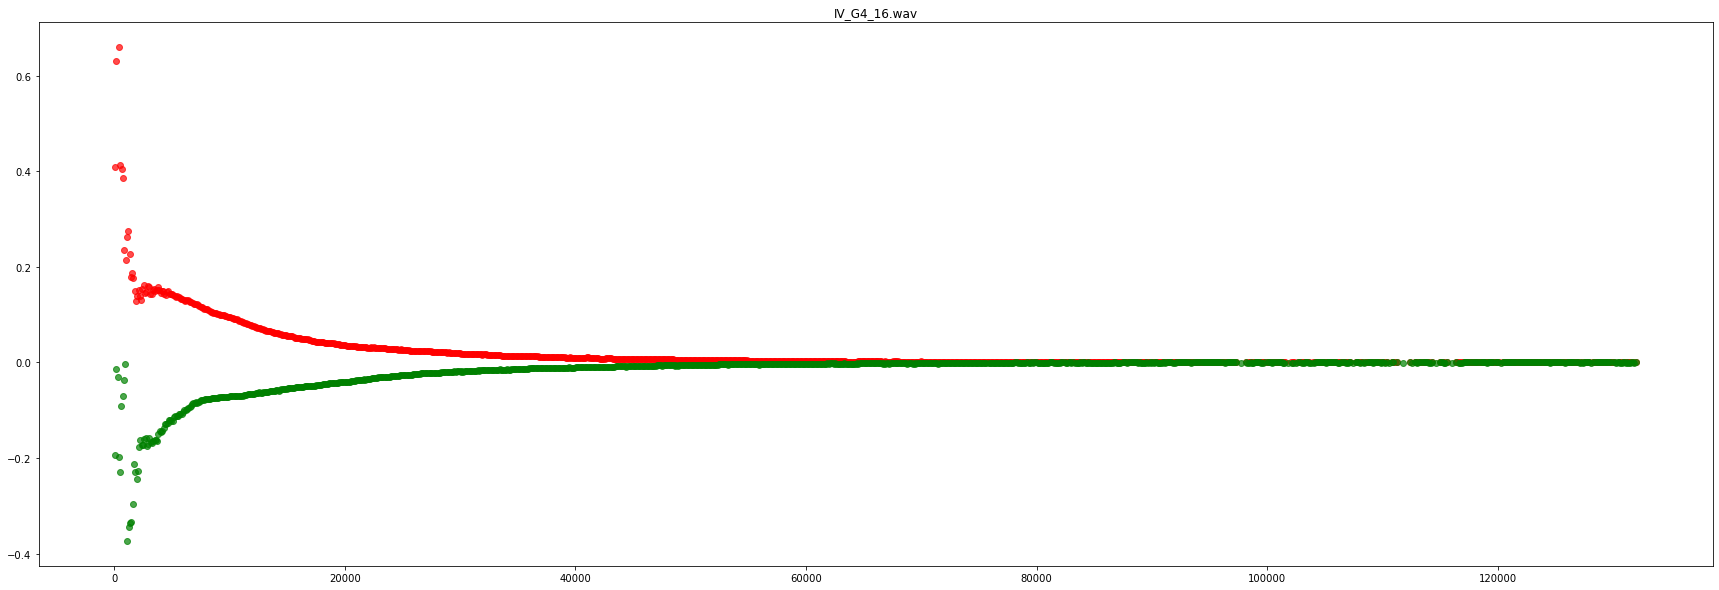

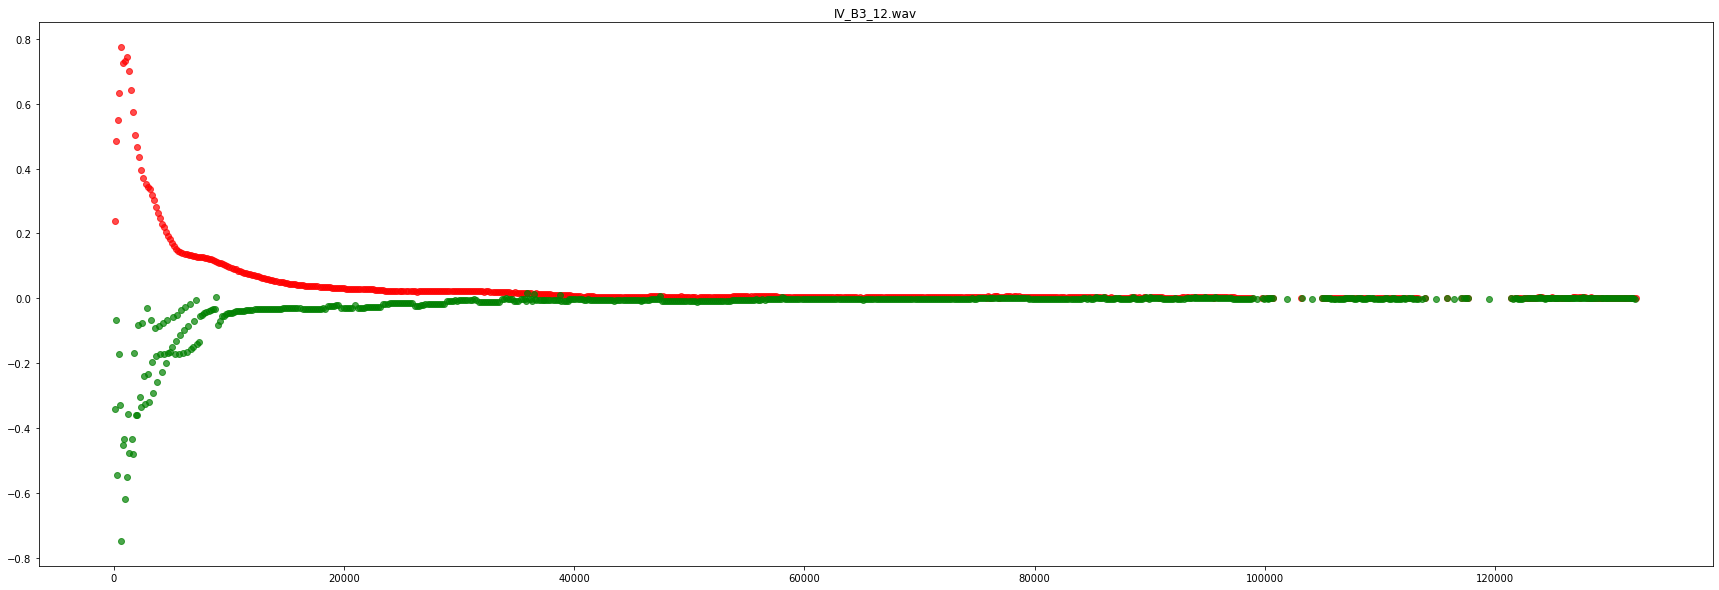

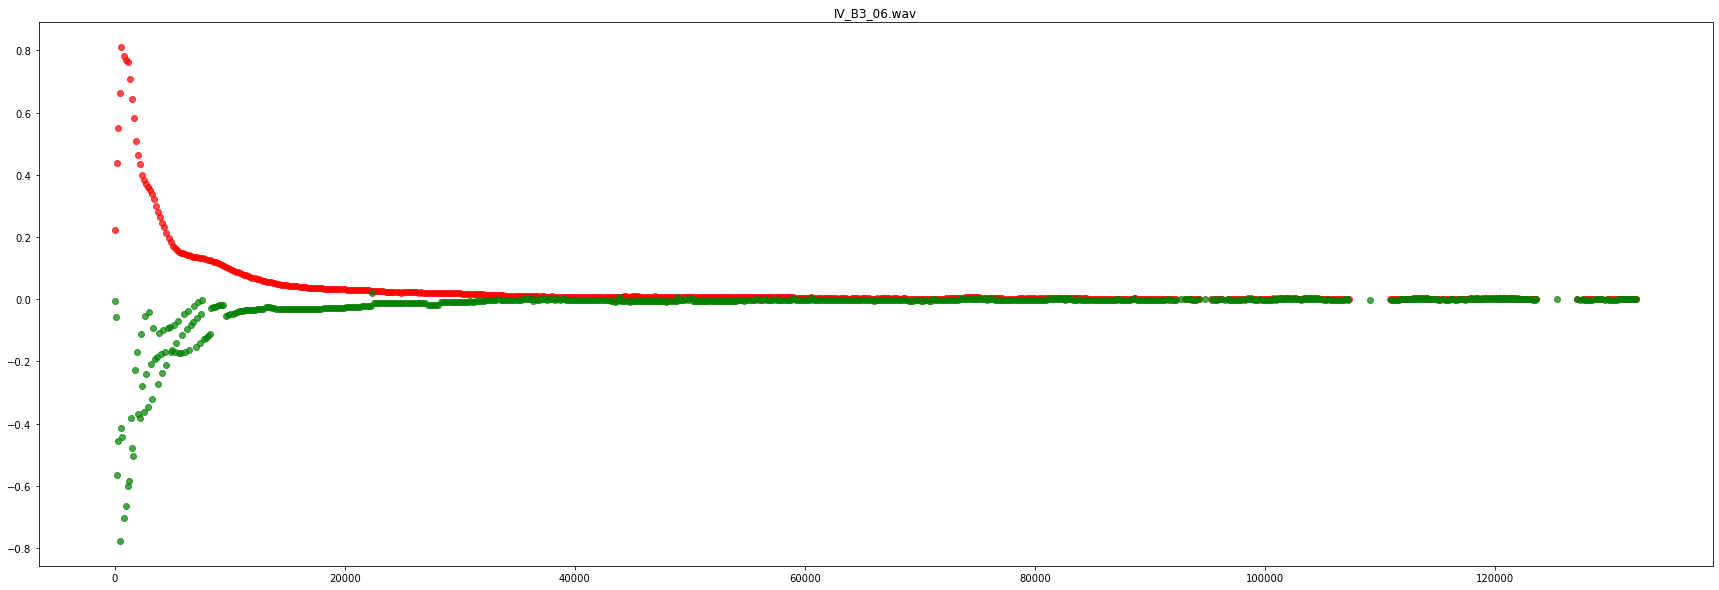

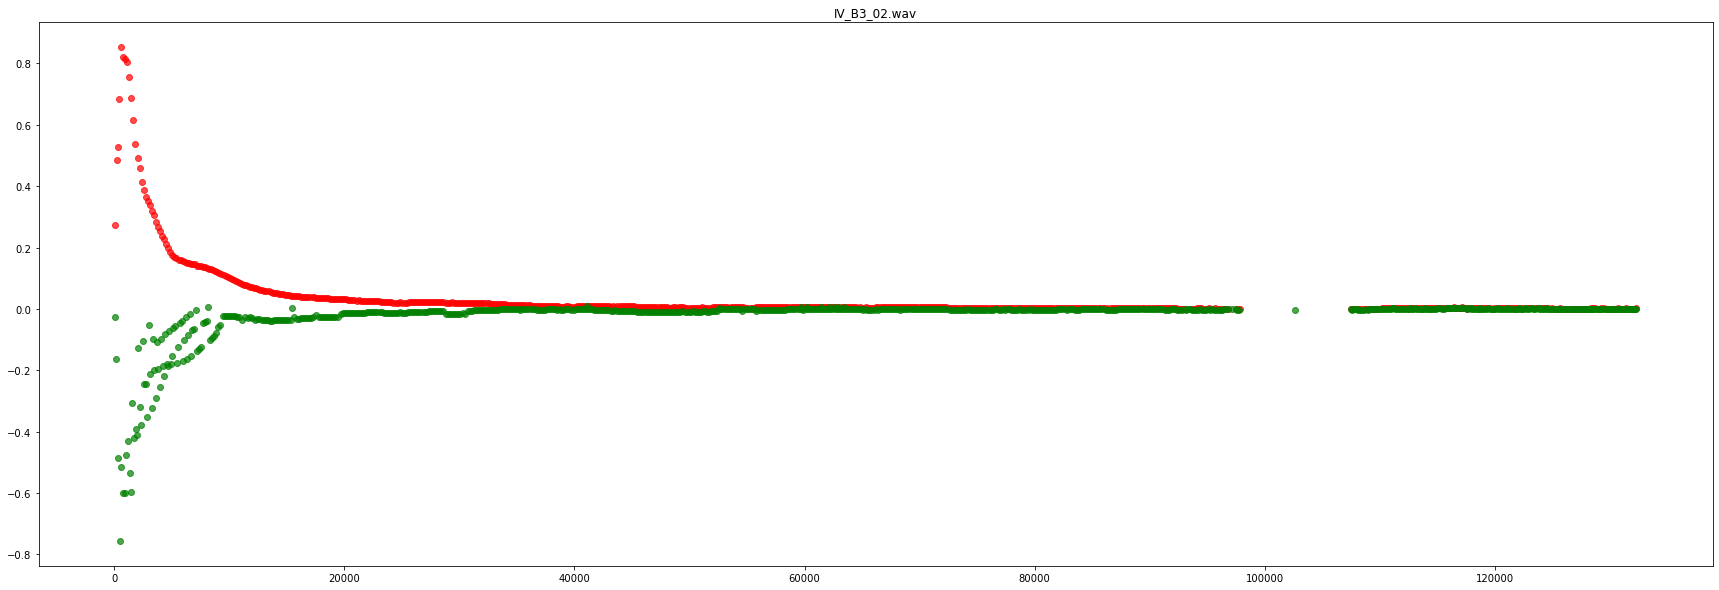

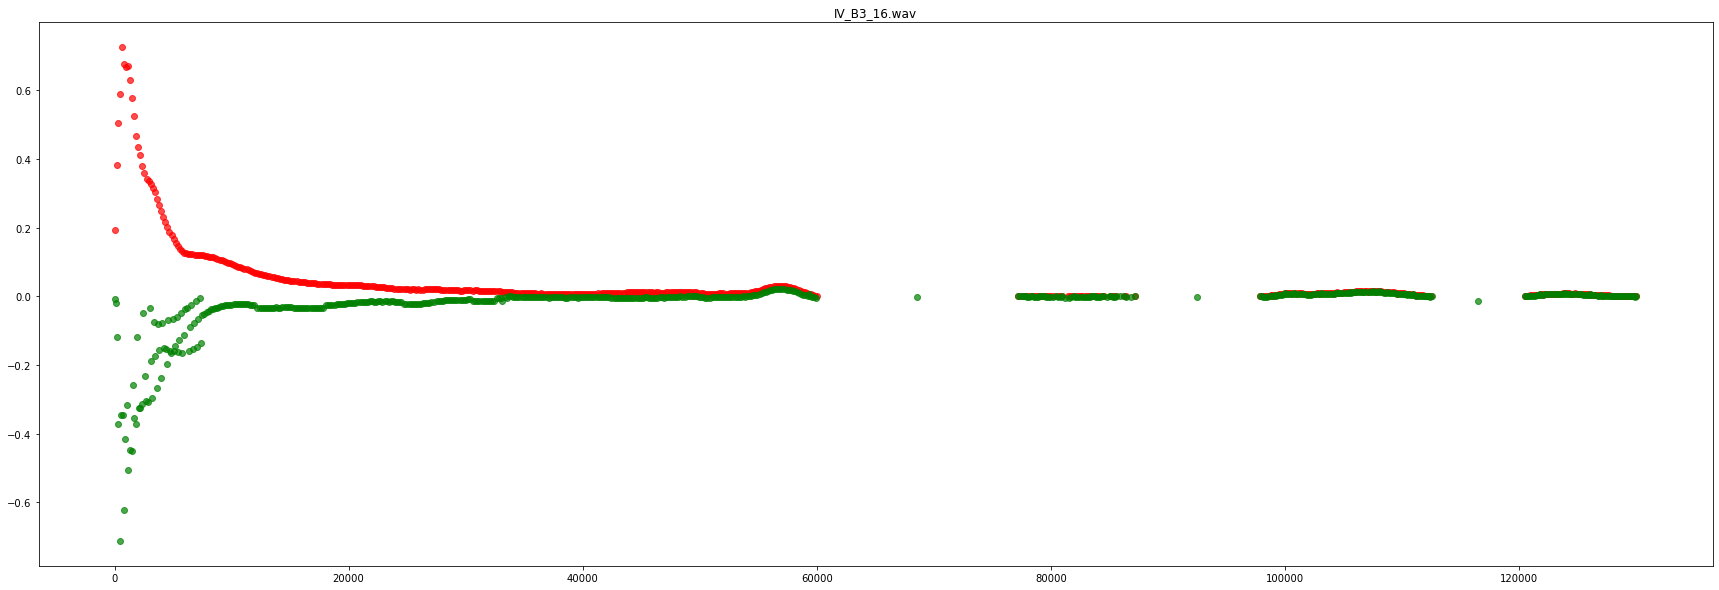

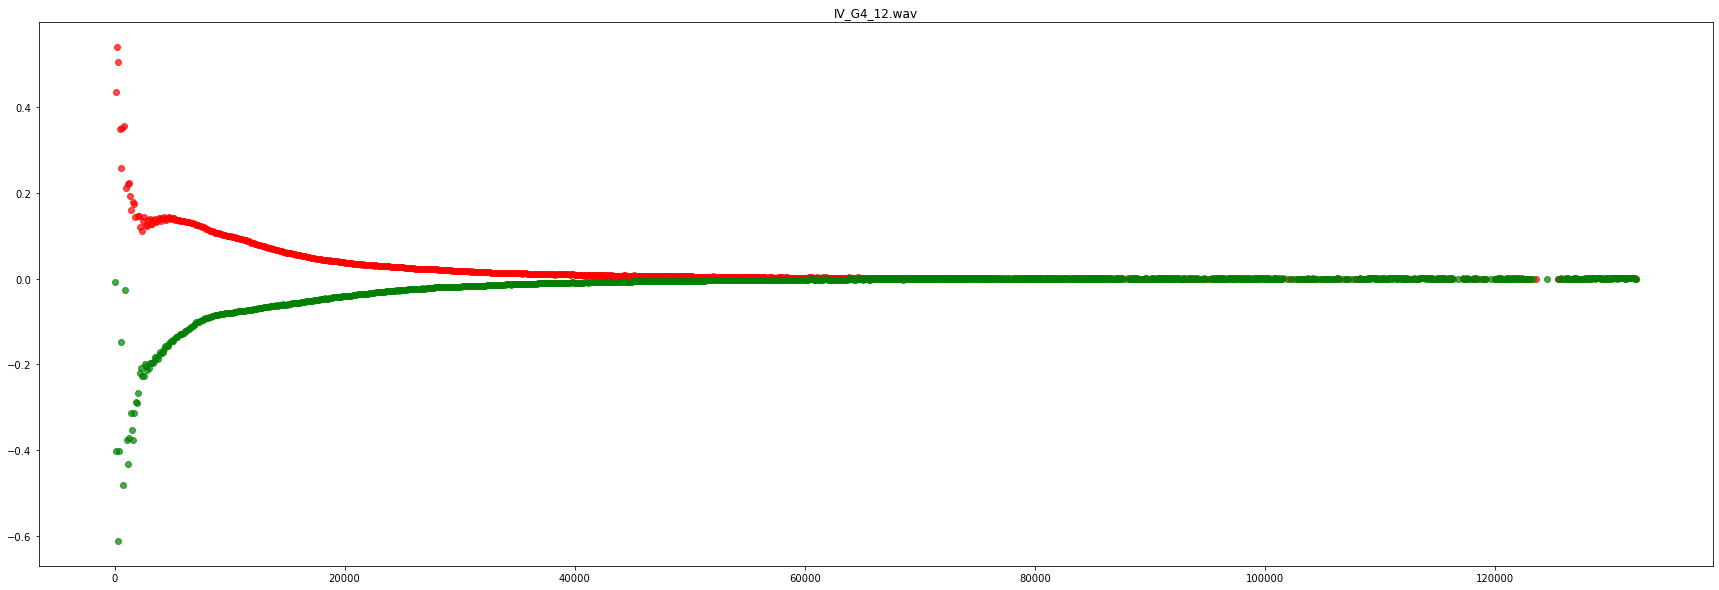

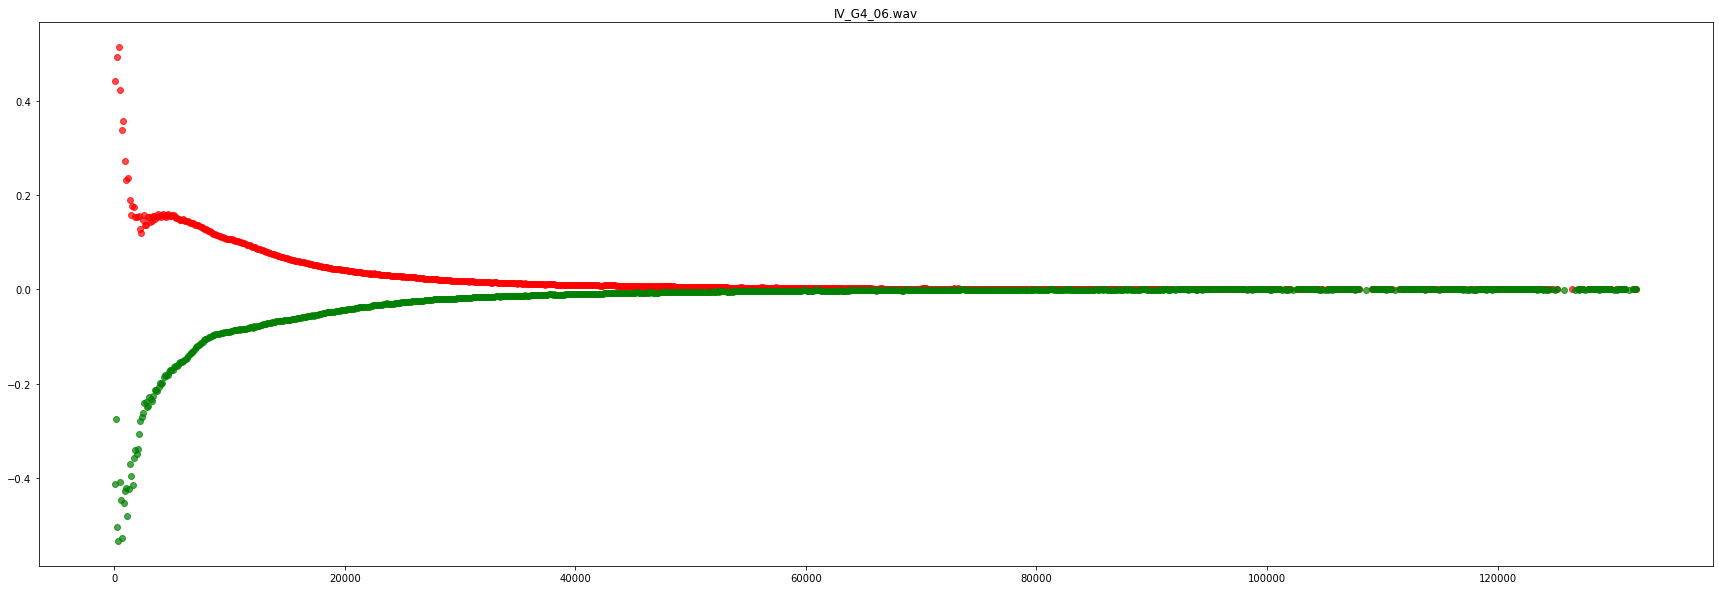

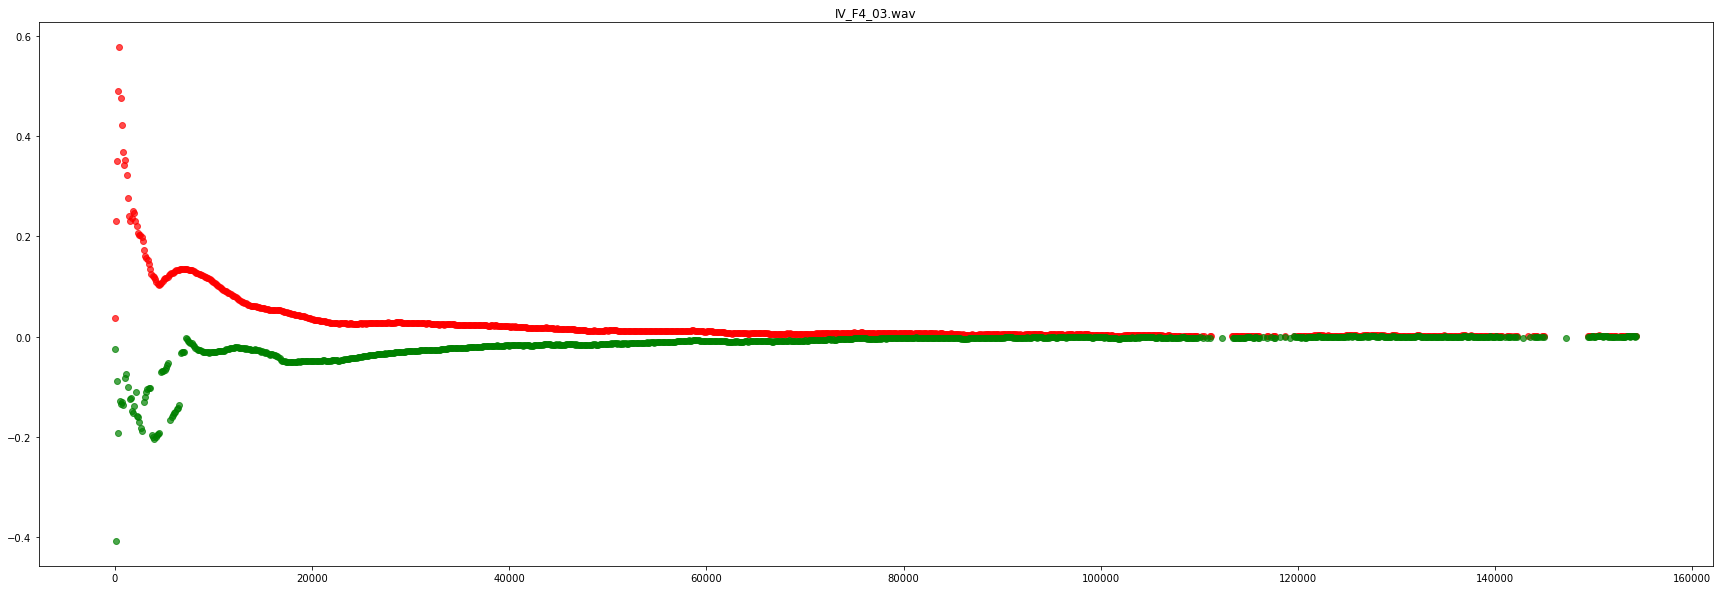

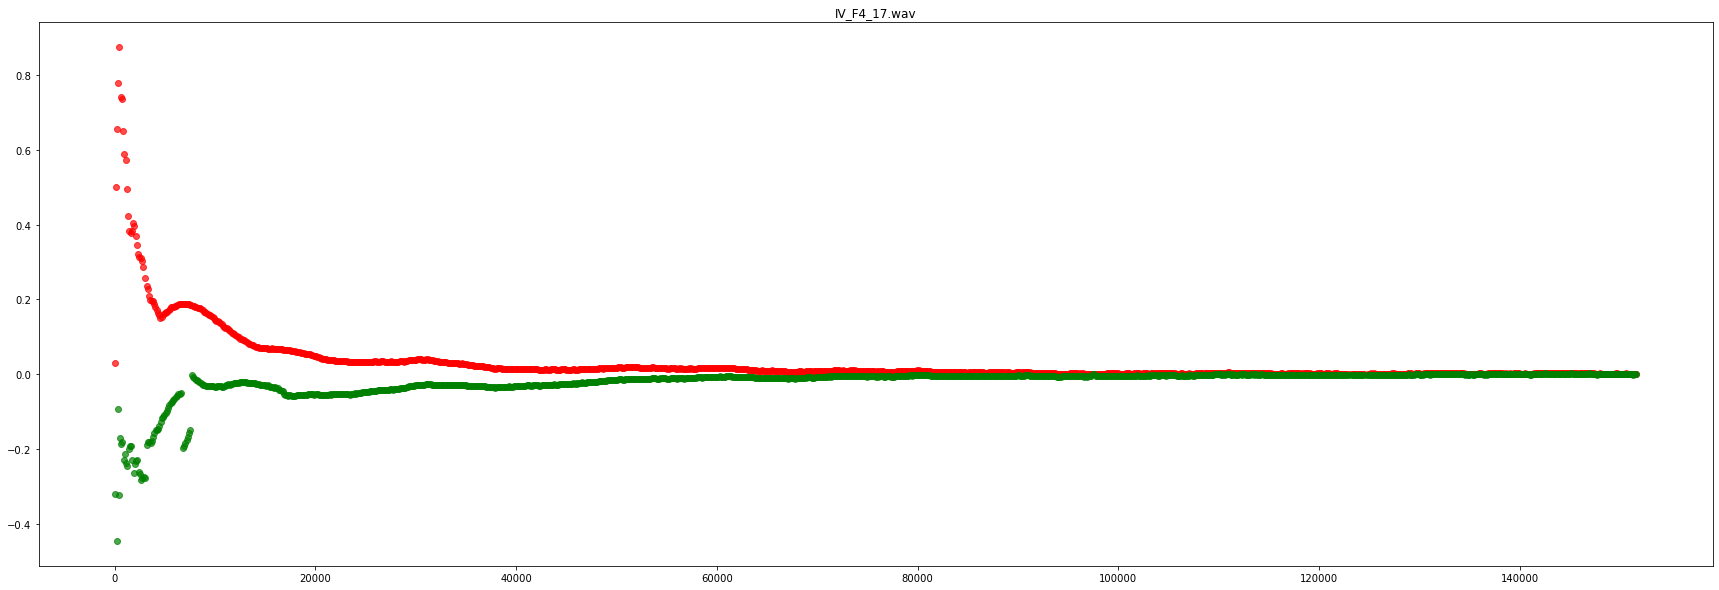

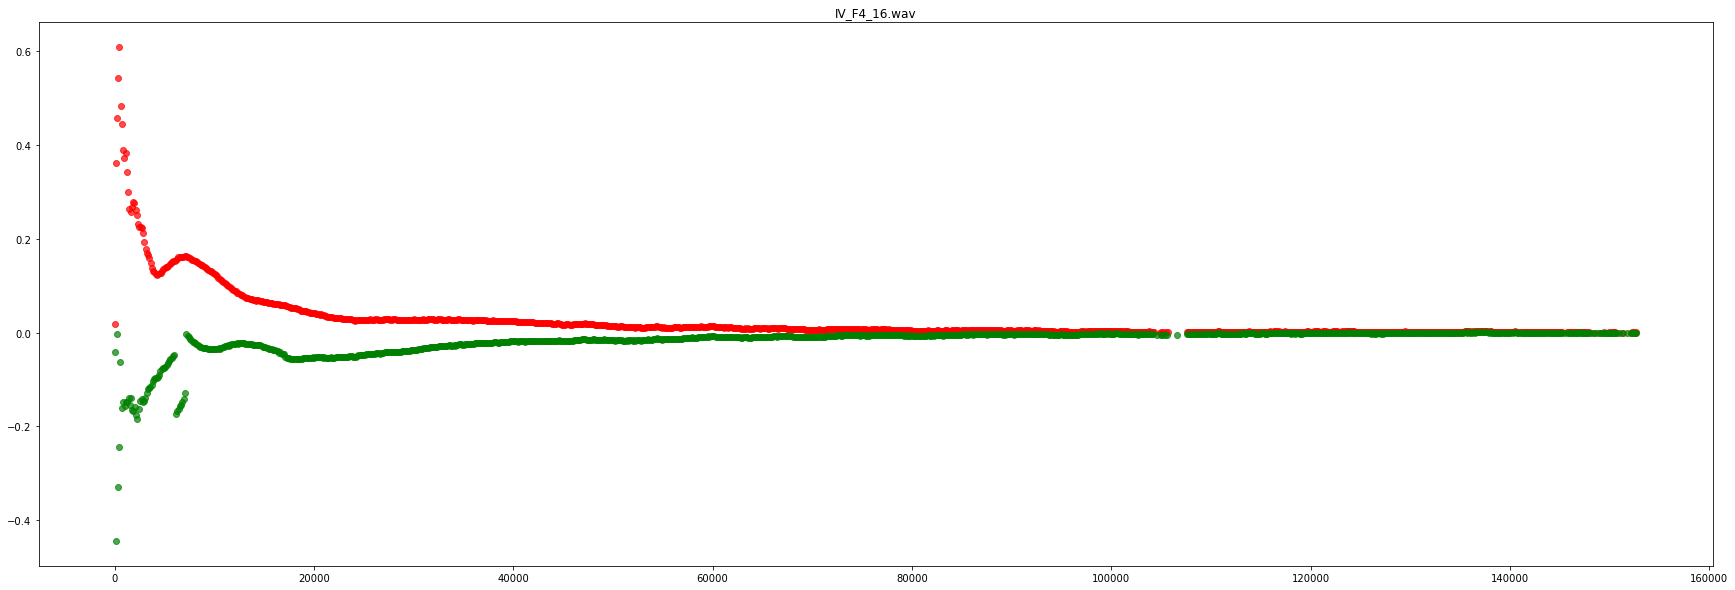

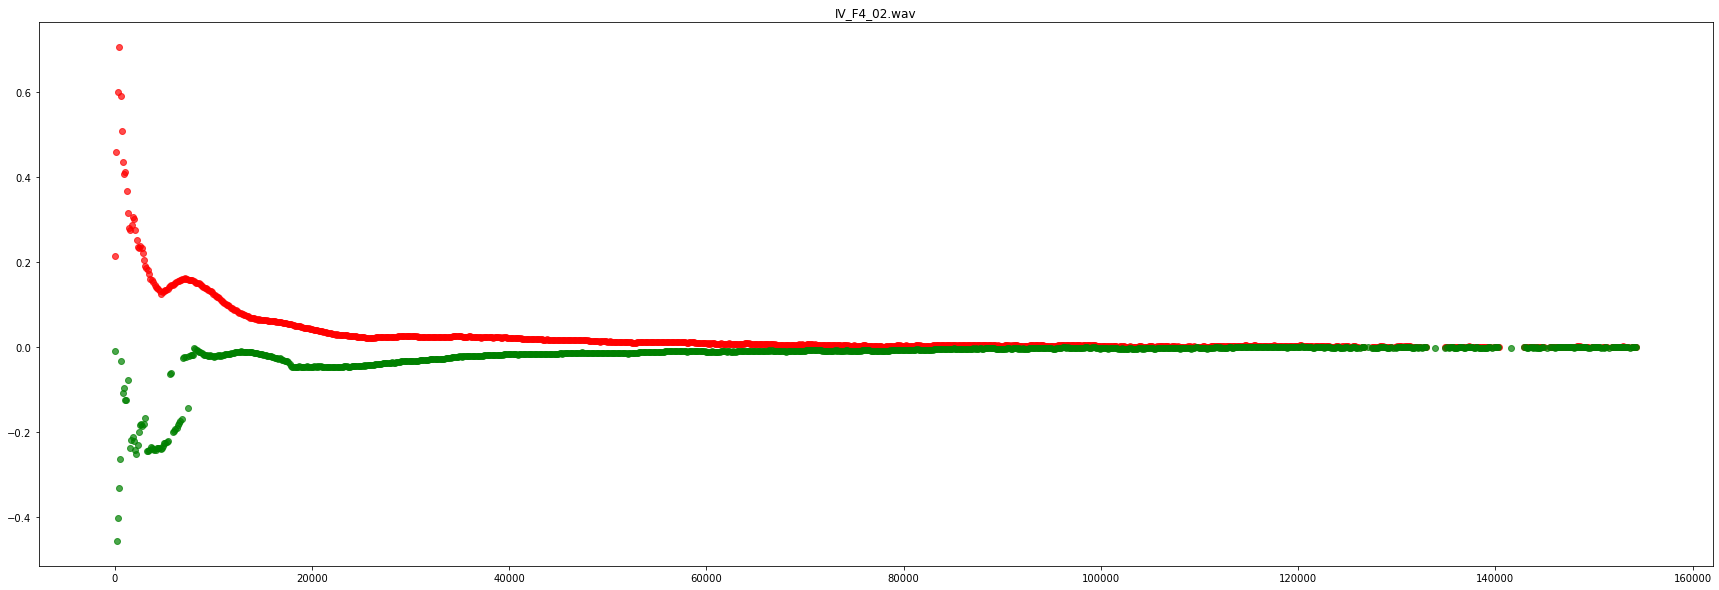

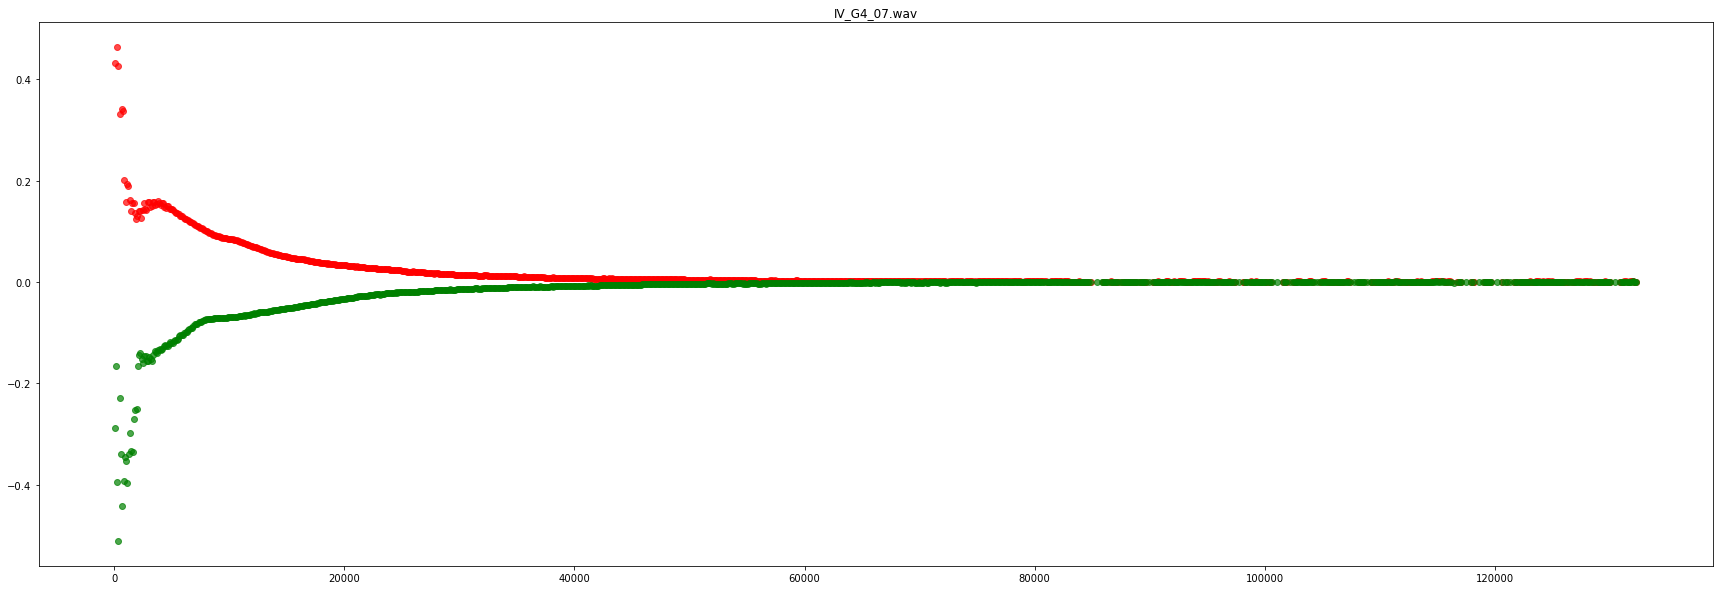

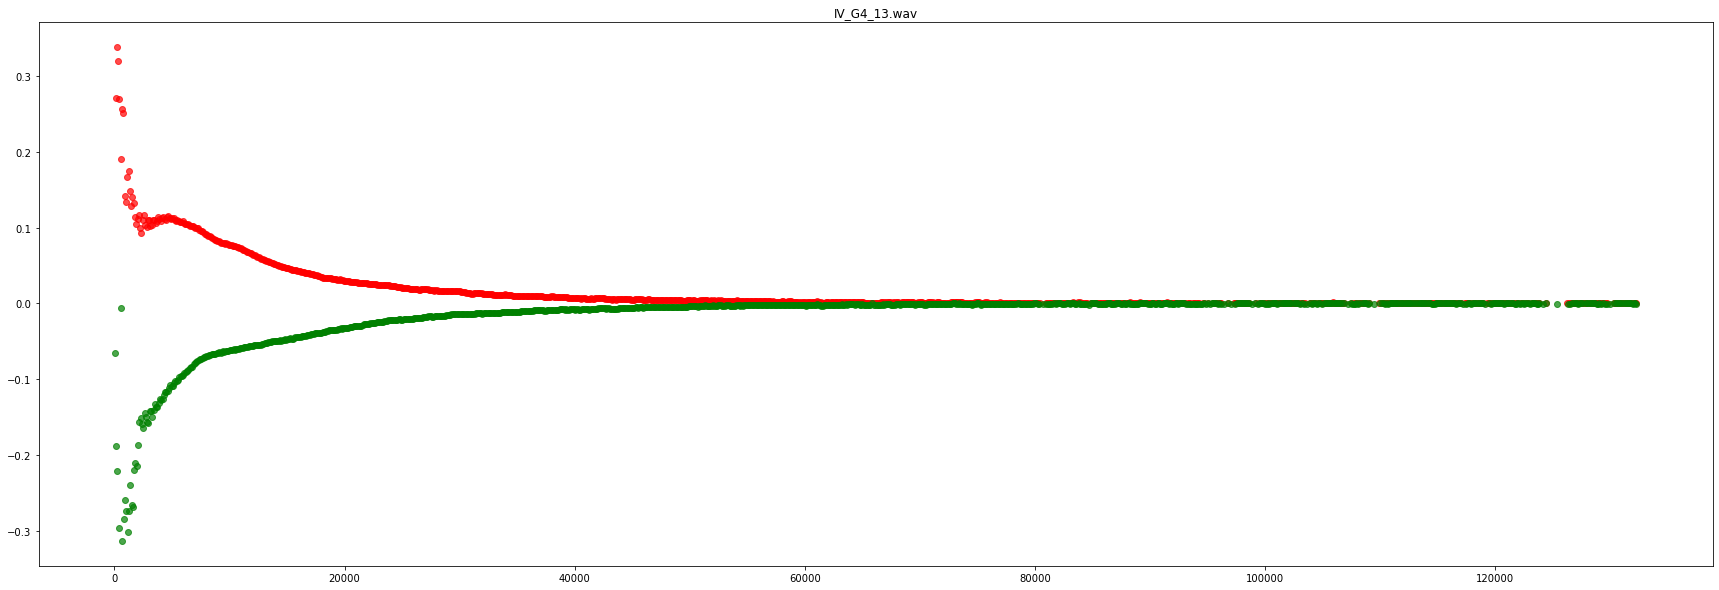

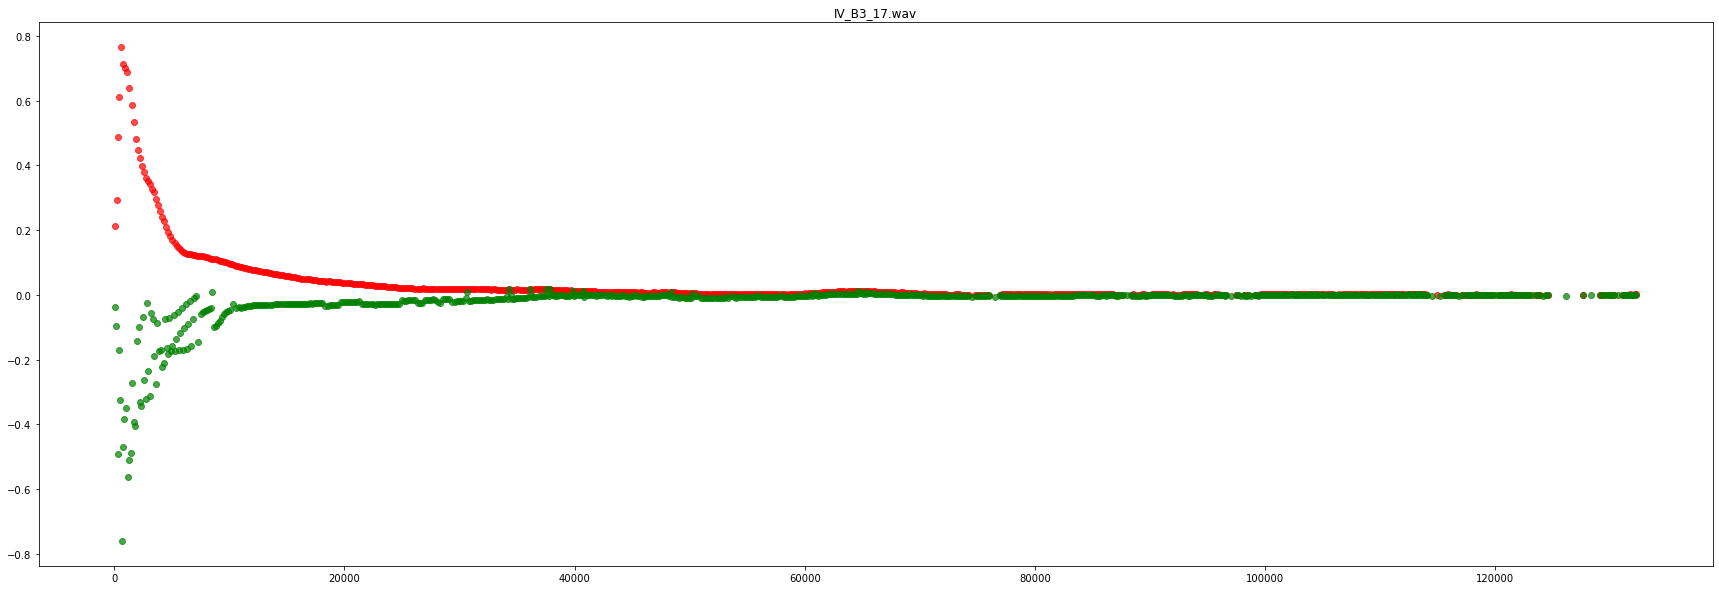

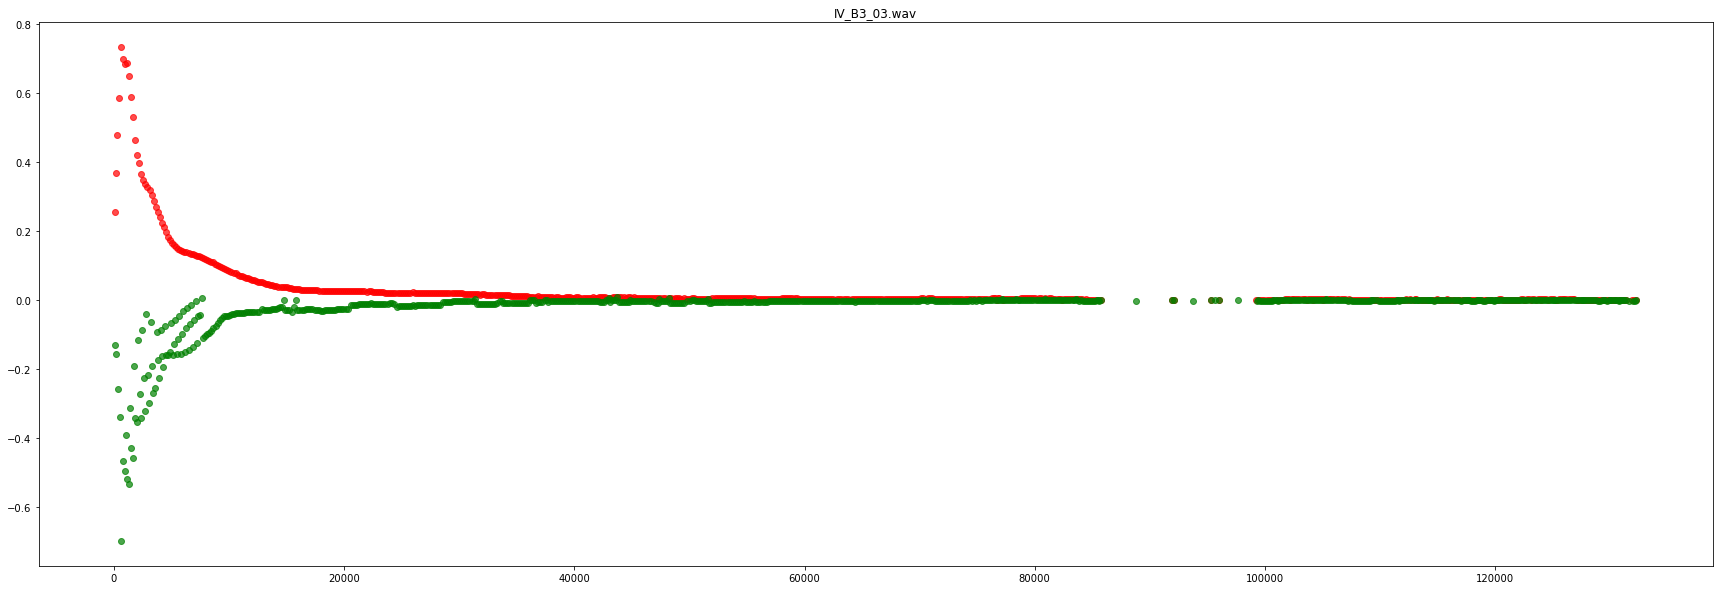

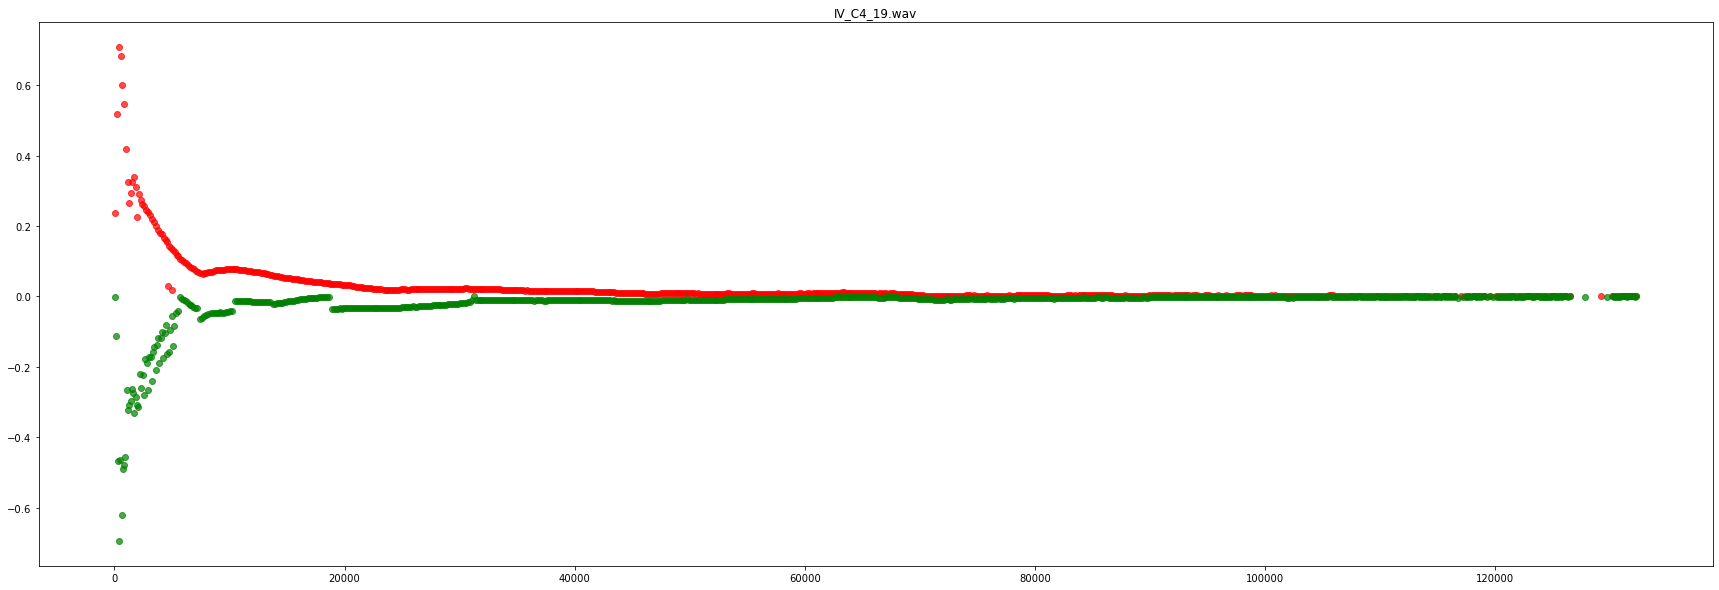

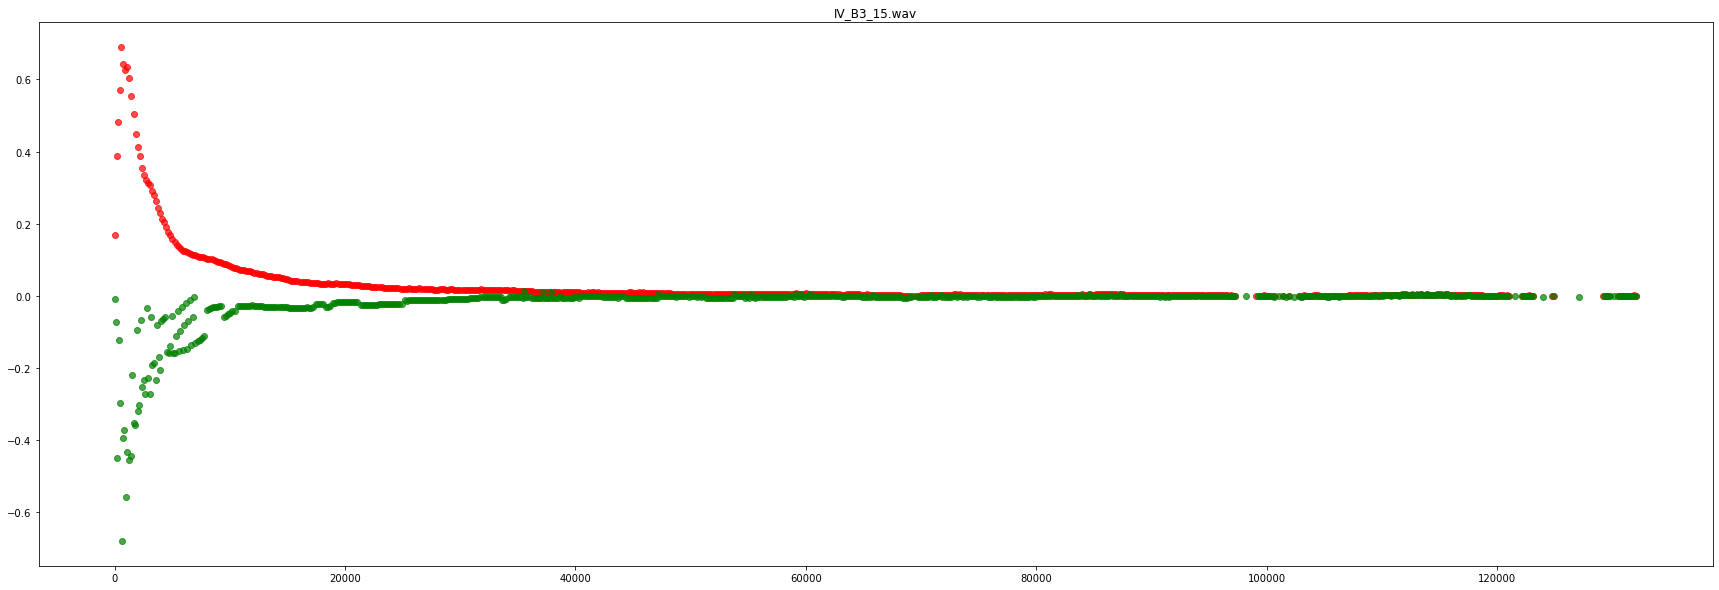

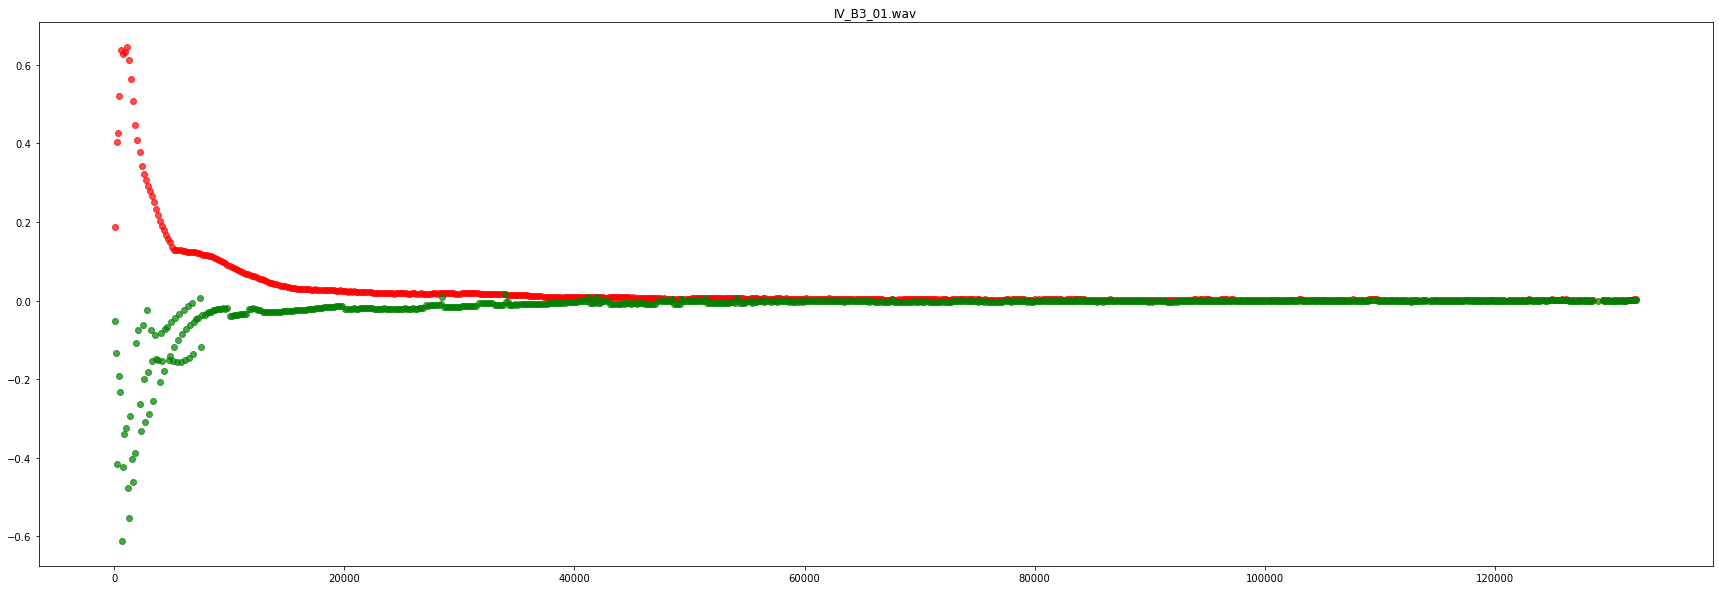

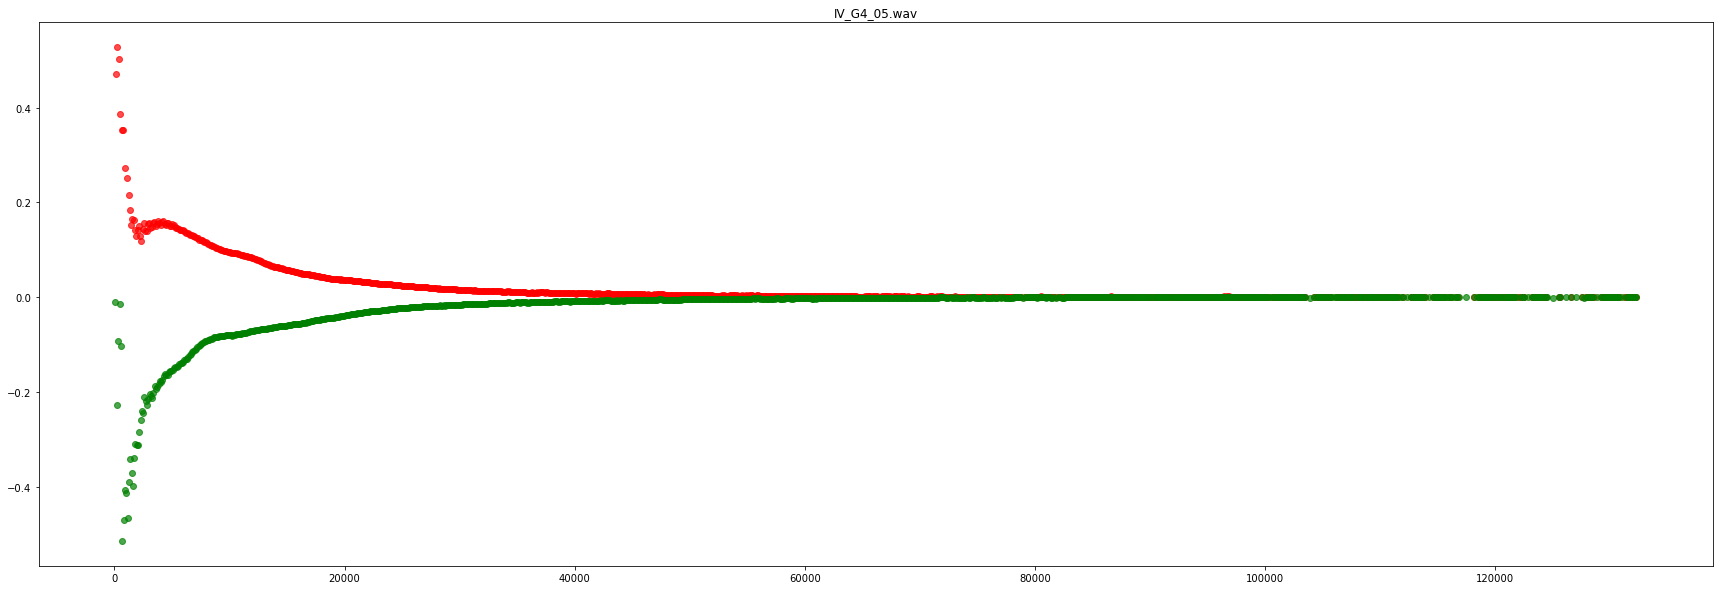

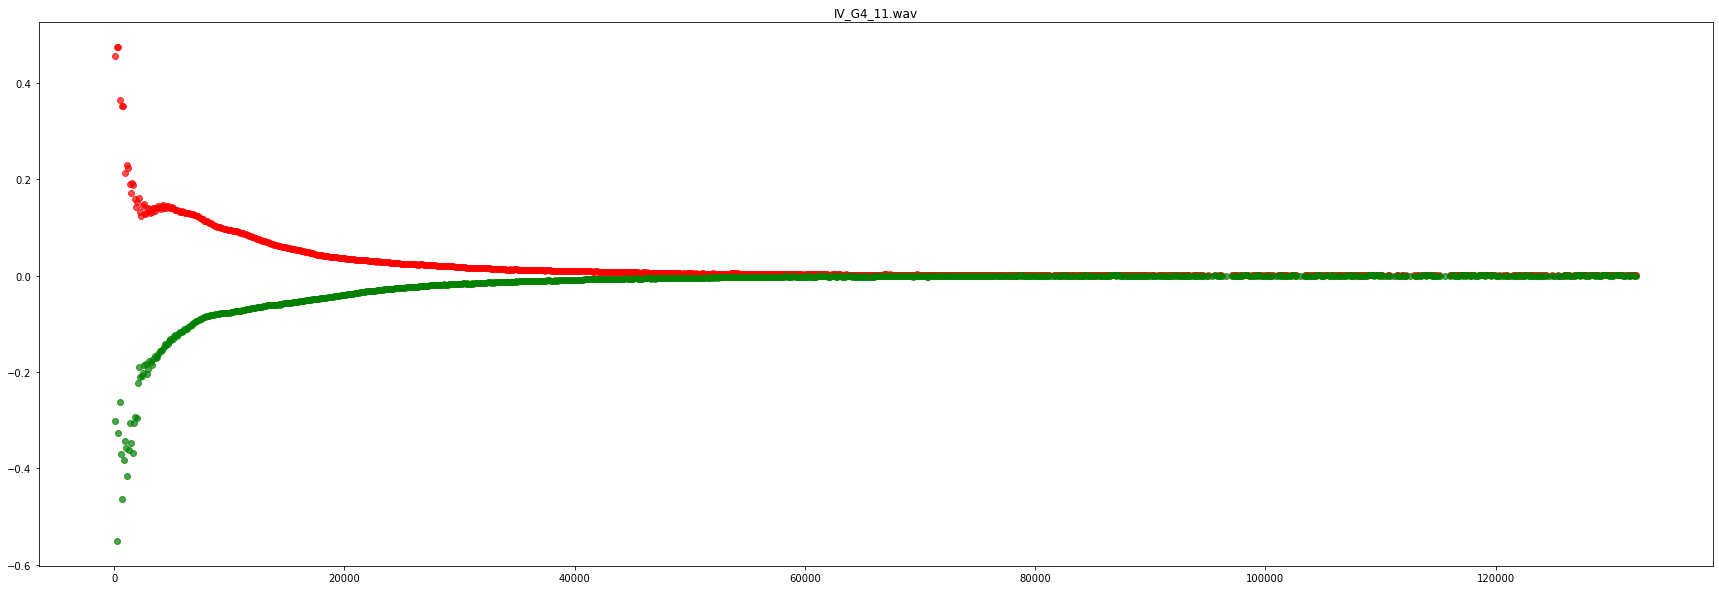

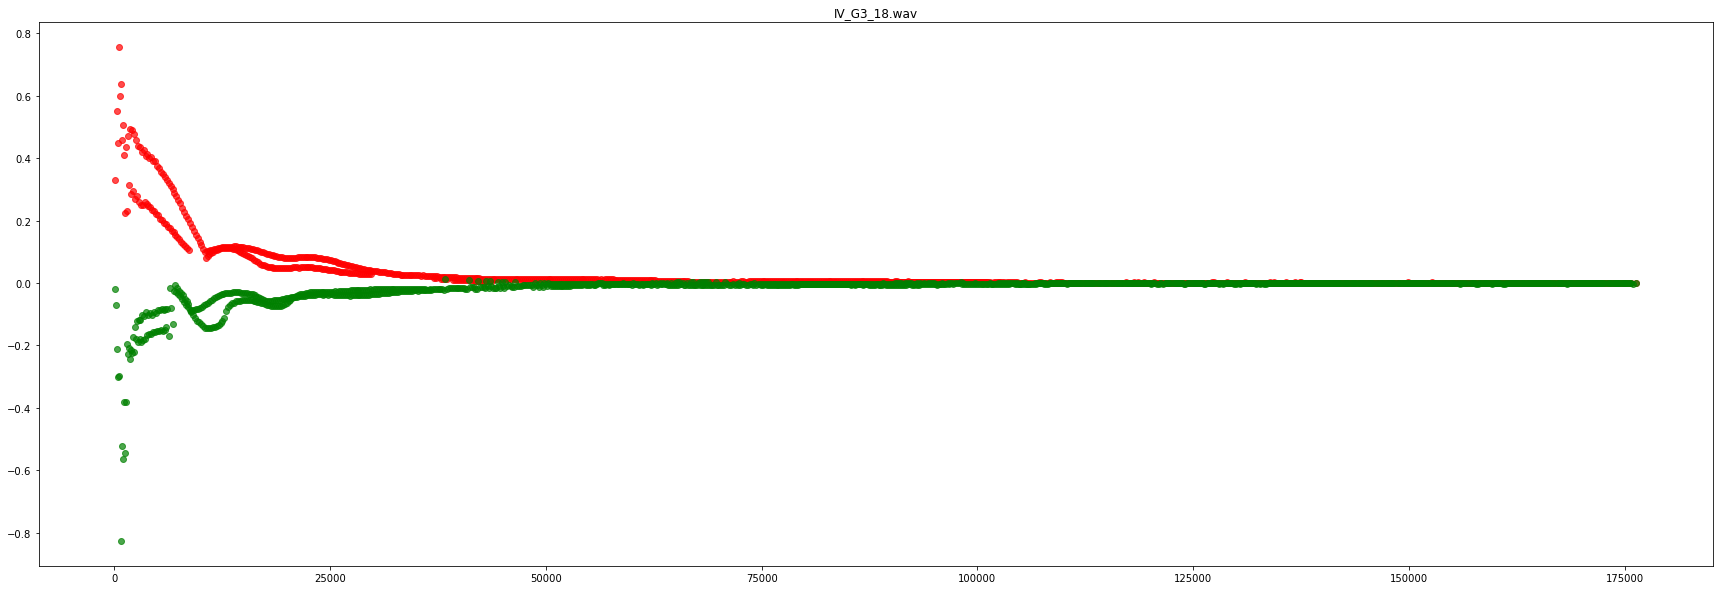

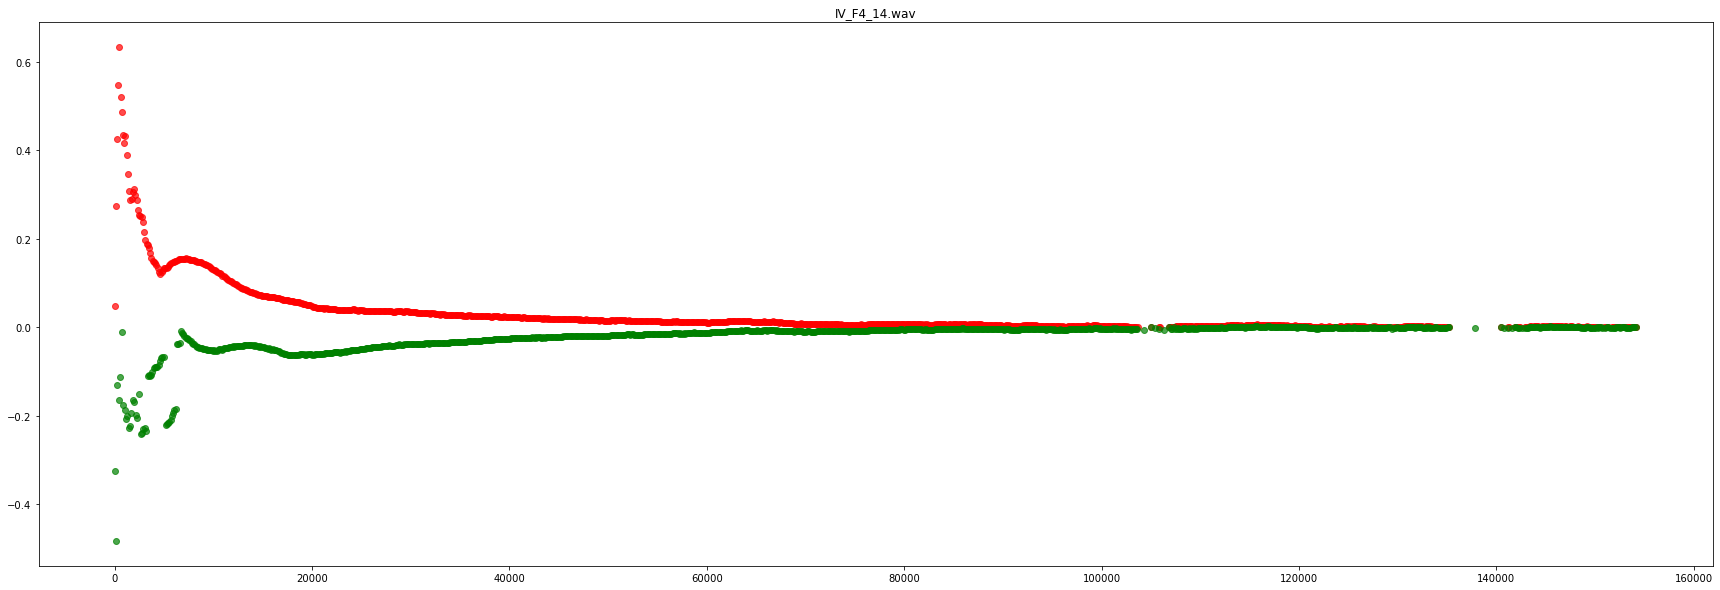

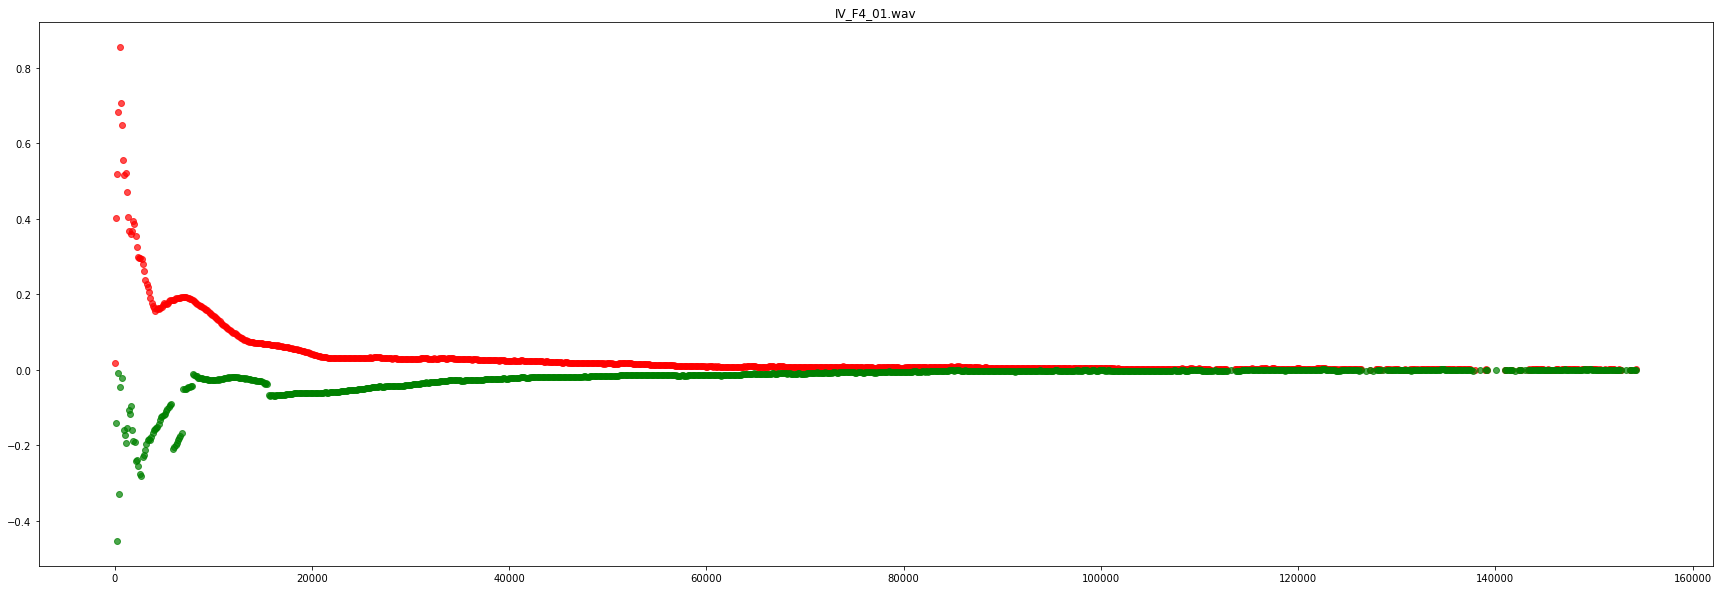

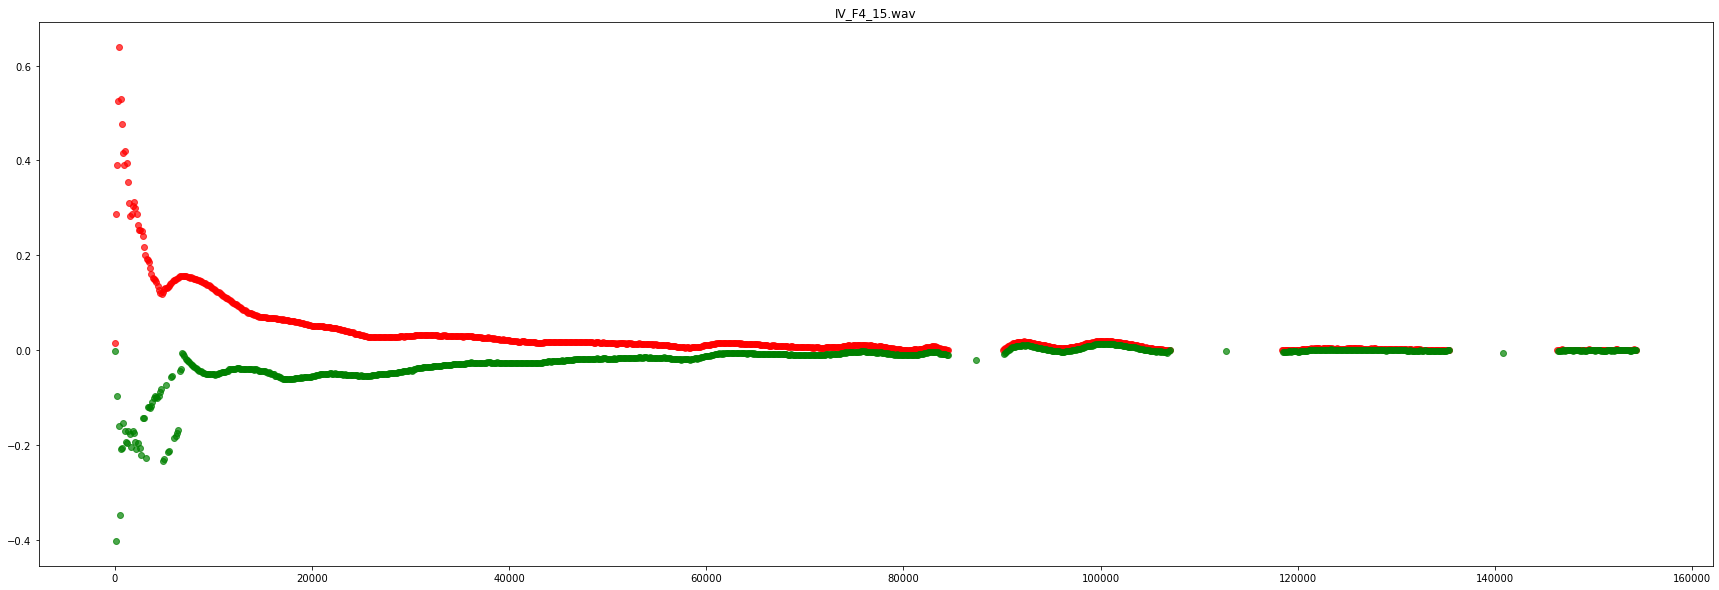

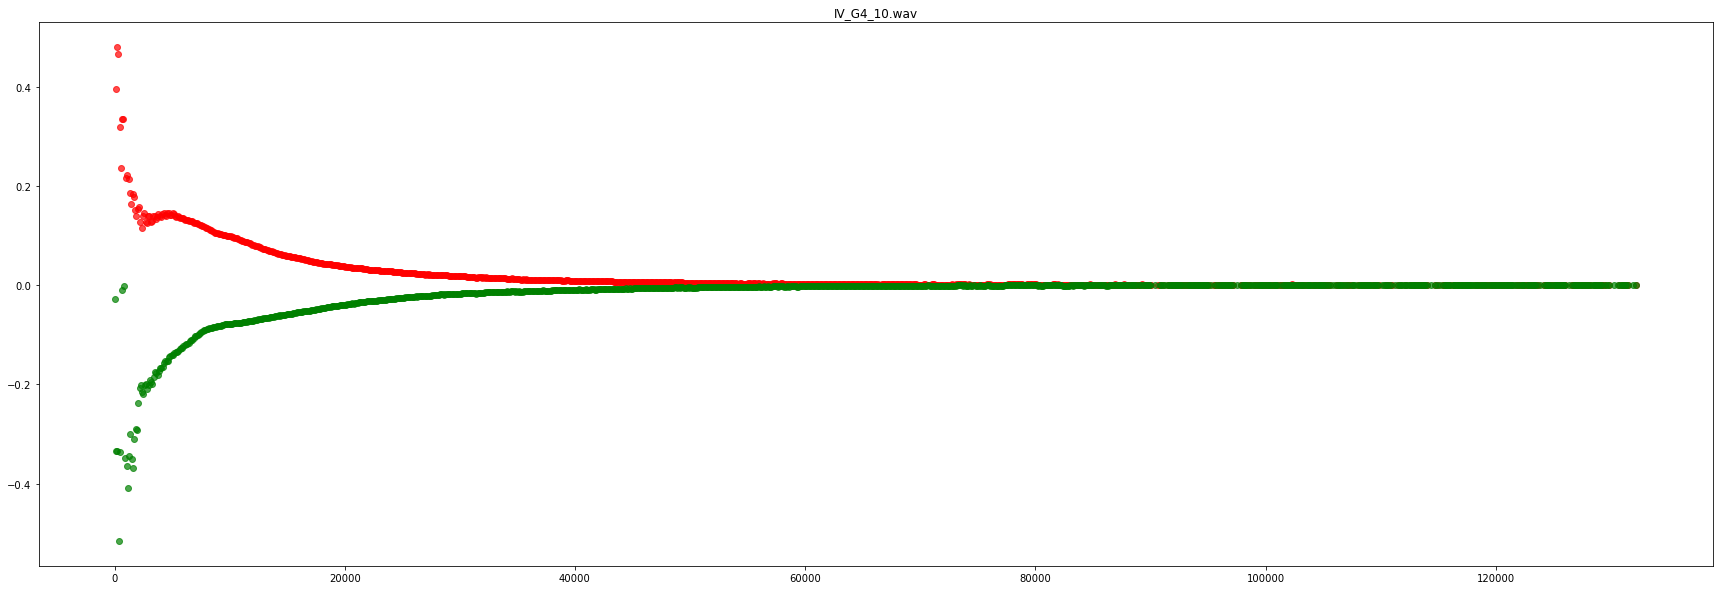

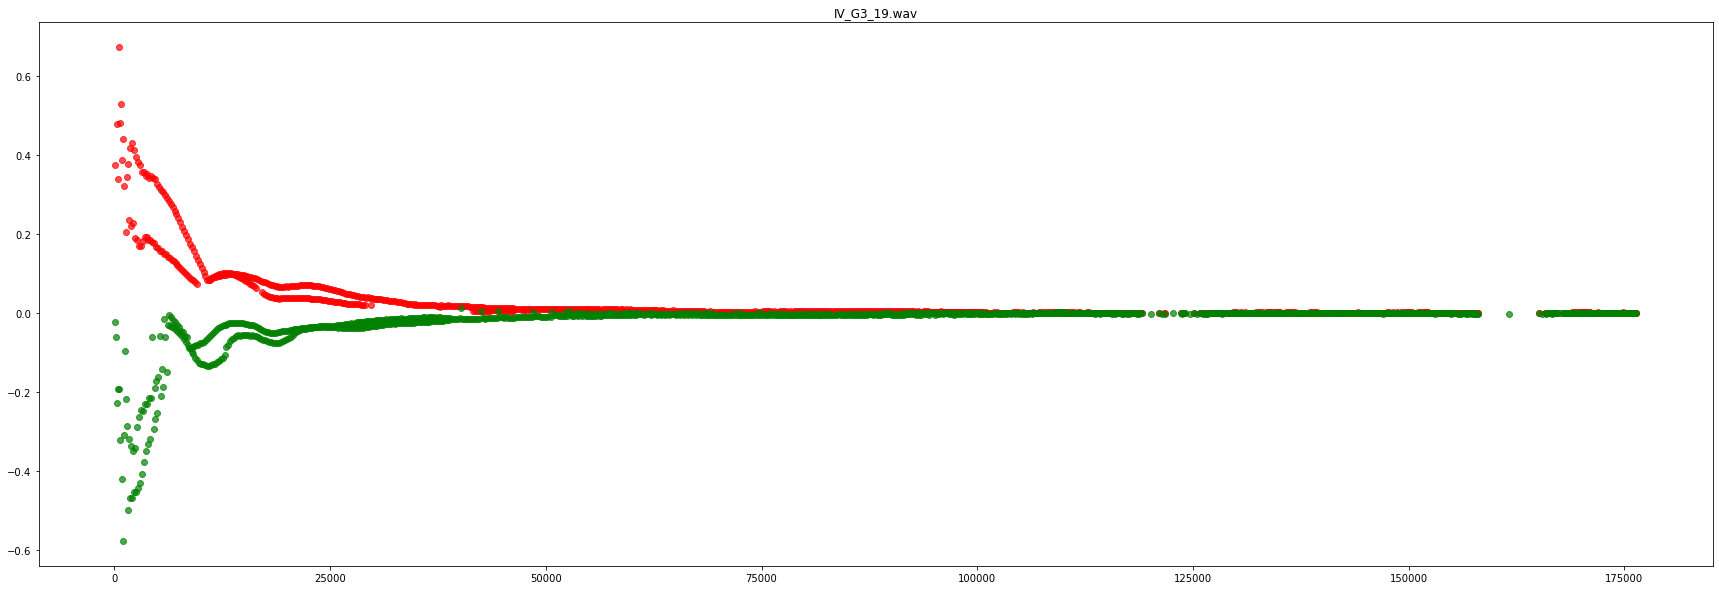

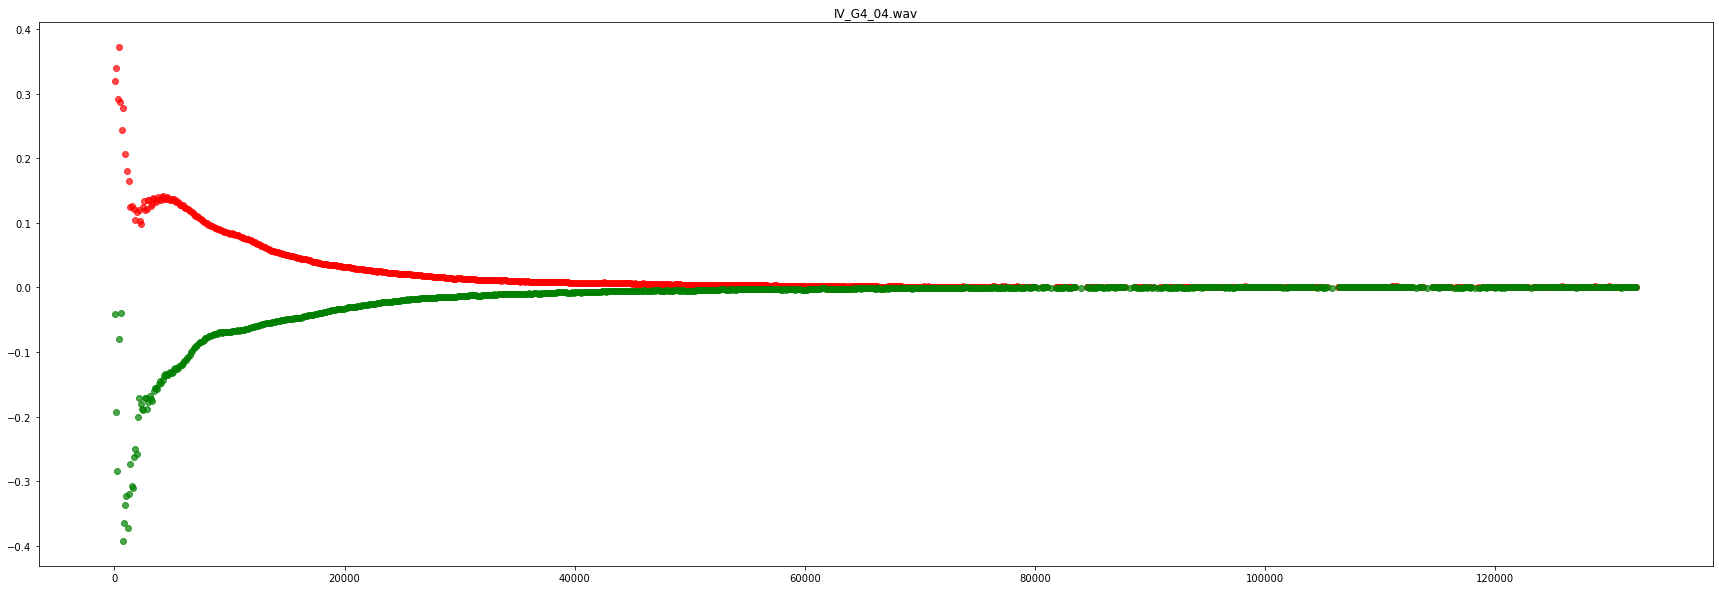

/Users/yutianqin/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

In [21]:

# os.chdir("./IV/")
files = os.listdir()
for i, file in enumerate(files): 
    if i//20 == 0: #A3
        dis = 200
    elif i//20 == 1: #B3
        dis = 100
    elif i//20 == 2: #C4
        dis = 100
    elif i//20 == 3: #D4
        dis = 100
    elif i//20 == 4: #E4
        dis = 100
    elif i//20 == 5: #F4
        dis =  100
    elif i//20 == 6: #G3
        dis = 180
    elif i // 20 == 7: #G4
        dis = 100
    y, sr = librosa.load(file, sr = 44100)
    y1 = copy.deepcopy(y)
    for j in range(len(y1)):
        if y1[j] < 0:
            y1[j] = 0
    neg_y = np.negative(y)
    y2 = copy.deepcopy(neg_y)
    for j in range(len(y2)):
        if y2[j] > 0:
            y2[j] = 0
    peaks1, _ = scipy.signal.find_peaks(y1, distance = dis)
    peaks2, _ = scipy.signal.find_peaks(y2, distance = dis)
#     peak = np.hstack((peaks1, peaks2))
#     peak = np.sort(peak)
    print(dis)
    plt.figure(figsize=(30, 10))
    plt.title(file)
#     plt.plot(y)
    plt.scatter(peaks1, y[peaks1], c = 'r', alpha = 0.7)
    plt.scatter(peaks2, y[peaks2], c = 'g', alpha = 0.7)
    plt.title(file)
    plt.show()